In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [12]:
# Load the dataset
file_path = 'transposed_IMFdataset.csv'  # Update this with your file path
data = pd.read_csv(file_path)

In [13]:
# Preprocessing
data.columns = data.iloc[0]  # Assign the first row as headers
gdp_data = data[1:]          # Skip the header row
gdp_data = gdp_data.rename(columns={0: 'GDP per capita, current prices (U.S. dollars per capita)'})  # Rename the first column to 'GDP per capita, current prices (U.S. dollars per capita)'
gdp_data

0  GDP per capita, current prices\n (U.S. dollars per capita) NaN Afghanistan  \
1                                                1980         NaN     no data   
2                                                1981         NaN     no data   
3                                                1982         NaN     no data   
4                                                1983         NaN     no data   
5                                                1984         NaN     no data   
6                                                1985         NaN     no data   
7                                                1986         NaN     no data   
8                                                1987         NaN     no data   
9                                                1988         NaN     no data   
10                                               1989         NaN     no data   
11                                               1990         NaN     no data   
12                                               1991         NaN     no data   
13                                               1992         NaN     no data   
14                                               1993         NaN     no data   
15                                               1994         NaN     no data   
16                                               1995         NaN     no data   
17                                               1996         NaN     no data   
18                                               1997         NaN     no data   
19                                               1998         NaN     no data   
20                                               1999         NaN     no data   
21                                               2000         NaN     no data   
22                                               2001         NaN     no data   
23                                               2002         NaN     207.946   
24                                               2003         NaN     201.051   
25                                               2004         NaN     218.461   
26                                               2005         NaN     252.618   
27                                               2006         NaN     272.189   
28                                               2007         NaN     330.295   
29                                               2008         NaN      389.63   
30                                               2009         NaN     440.607   
31                                               2010         NaN     543.652   
32                                               2011         NaN     611.642   
33                                               2012         NaN     666.089   
34                                               2013         NaN     639.473   
35                                               2014         NaN     630.136   
36                                               2015         NaN     594.213   
37                                               2016         NaN     520.267   
38                                               2017         NaN     529.773   
39                                               2018         NaN     499.799   
40                                               2019         NaN     499.762   
41                                               2020         NaN     516.664   
42                                               2021         NaN     356.063   
43                                               2022         NaN     352.456   
44                                               2023         NaN     410.933   
45                                               2024         NaN     no data   
46                                               2025         NaN     no data   
47                                               2026         NaN     no data   
48                                               2027         NaN     no data   
49                             

In [14]:
# Extract GDP data for USA and Japan
gdp_data = gdp_data[['GDP per capita, current prices (U.S. dollars per capita)', 'United States', 'Japan']]
gdp_data['GDP per capita, current prices (U.S. dollars per capita)'] = pd.to_numeric(gdp_data['GDP per capita, current prices (U.S. dollars per capita)'], errors='coerce')
gdp_data['United States'] = pd.to_numeric(gdp_data['United States'], errors='coerce')
gdp_data['Japan'] = pd.to_numeric(gdp_data['Japan'], errors='coerce')

KeyError: "['GDP per capita, current prices (U.S. dollars per capita)'] not in index"

In [5]:








# Filter for GDP per capita, current prices (U.S. dollars per capita)s between 1980 and 2029
gdp_data = gdp_data[gdp_data['GDP per capita, current prices (U.S. dollars per capita)'].between(1980, 2029)]

# Split data into training (1980-2024) and validation (2025-2029)
train_data = gdp_data[gdp_data['GDP per capita, current prices (U.S. dollars per capita)'] <= 2024]
validation_data = gdp_data[gdp_data['GDP per capita, current prices (U.S. dollars per capita)'] > 2024]

X_train = train_data['GDP per capita, current prices (U.S. dollars per capita)'].values.reshape(-1, 1)
y_train_usa = train_data['United States'].values
y_train_japan = train_data['Japan'].values

X_val = validation_data['GDP per capita, current prices (U.S. dollars per capita)'].values.reshape(-1, 1)
y_val_usa = validation_data['United States'].values
y_val_japan = validation_data['Japan'].values

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train_usa)
y_pred_lr_usa = lr.predict(X_val)

print("Linear Regression MAE (USA):", mean_absolute_error(y_val_usa, y_pred_lr_usa))
print("Linear Regression MSE (USA):", mean_squared_error(y_val_usa, y_pred_lr_usa))

# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
y_pred_poly_usa = lr_poly.predict(X_val_poly)

print("Polynomial Regression MAE (USA):", mean_absolute_error(y_val_usa, y_pred_poly_usa))
print("Polynomial Regression MSE (USA):", mean_squared_error(y_val_usa, y_pred_poly_usa))

# 3. ARIMA (for USA GDP)
arima_model = ARIMA(train_data['United States'], order=(5, 1, 0))
arima_result = arima_model.fit()
y_pred_arima_usa = arima_result.forecast(steps=len(validation_data))

print("ARIMA MAE (USA):", mean_absolute_error(y_val_usa, y_pred_arima_usa))
print("ARIMA MSE (USA):", mean_squared_error(y_val_usa, y_pred_arima_usa))

# 4. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_usa)
y_pred_rf_usa = rf.predict(X_val)

print("Random Forest MAE (USA):", mean_absolute_error(y_val_usa, y_pred_rf_usa))
print("Random Forest MSE (USA):", mean_squared_error(y_val_usa, y_pred_rf_usa))

# 5. Prophet
prophet_data = train_data[['GDP per capita, current prices (U.S. dollars per capita)', 'United States']].rename(columns={'GDP per capita, current prices (U.S. dollars per capita)': 'ds', 'United States': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)

future = prophet_model.make_future_dataframe(periods=len(validation_data))
forecast = prophet_model.predict(future)

# Extract predictions for validation GDP per capita, current prices (U.S. dollars per capita)s
prophet_preds = forecast[forecast['ds'].isin(validation_data['GDP per capita, current prices (U.S. dollars per capita)'])]['yhat'].values
print("Prophet MAE (USA):", mean_absolute_error(y_val_usa, prophet_preds))
print("Prophet MSE (USA):", mean_squared_error(y_val_usa, prophet_preds))

# 6. LSTM (for USA GDP)
look_back = 5
def create_lstm_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

# Prepare LSTM data
train_usa = train_data['United States'].values
X_train_lstm, y_train_lstm = create_lstm_dataset(train_usa, look_back)

# Reshape for LSTM
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=1, verbose=2)

# Predictions with LSTM
X_val_lstm, _ = create_lstm_dataset(train_usa[-look_back:], look_back)
X_val_lstm = np.reshape(X_val_lstm, (X_val_lstm.shape[0], X_val_lstm.shape[1], 1))
y_pred_lstm_usa = lstm_model.predict(X_val_lstm)

print("LSTM Predictions (USA):", y_pred_lstm_usa)


KeyError: "['Year'] not in index"

In [16]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'transposed_IMFdataset.csv'  # Update this with your file path
data = pd.read_csv(file_path, header=None)

# Set the first row as the header
data.columns = data.iloc[0]
data = data[1:]

# Rename the first unnamed column to 'Year'
data.rename(columns={data.columns[0]: 'Year'}, inplace=True)

# Replace 'no data' with NaN for numerical processing
data.replace('no data', np.nan, inplace=True)

# Convert 'Year' to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Convert GDP columns for 'United States' and 'Japan' to numeric
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')

# Filter the data for years between 1980 and 2029
gdp_data = data[data['Year'].between(1980, 2029)].reset_index(drop=True)

# Split the data into training (1980–2024) and validation (2025–2029)
train_data = gdp_data[gdp_data['Year'] <= 2024]
validation_data = gdp_data[gdp_data['Year'] > 2024]

# Extract features and target for USA and Japan
X_train = train_data['Year'].values.reshape(-1, 1)
y_train_usa = train_data['United States'].values
y_train_japan = train_data['Japan'].values

X_val = validation_data['Year'].values.reshape(-1, 1)
y_val_usa = validation_data['United States'].values
y_val_japan = validation_data['Japan'].values

# Check the cleaned data
print(gdp_data.head())


KeyError: 'United States'

In [17]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'transposed_IMFdataset.csv'  # Update this with your file path
data = pd.read_csv(file_path, header=None)

# Manually set the first column name as 'Year' and use the first row as headers
data.columns = ['Year'] + data.iloc[0, 1:].tolist()
data = data[1:]  # Remove the first row, now used as headers

# Replace 'no data' with NaN for processing
data.replace('no data', np.nan, inplace=True)

# Convert 'Year' to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Convert GDP columns for 'United States' and 'Japan' to numeric
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')

# Filter the data for years between 1980 and 2029
gdp_data = data[data['Year'].between(1980, 2029)].reset_index(drop=True)

# Split the data into training (1980–2024) and validation (2025–2029)
train_data = gdp_data[gdp_data['Year'] <= 2024]
validation_data = gdp_data[gdp_data['Year'] > 2024]

# Extract features and target for USA and Japan
X_train = train_data['Year'].values.reshape(-1, 1)
y_train_usa = train_data['United States'].values
y_train_japan = train_data['Japan'].values

X_val = validation_data['Year'].values.reshape(-1, 1)
y_val_usa = validation_data['United States'].values
y_val_japan = validation_data['Japan'].values

# Check the cleaned data
print(gdp_data.head())


KeyError: 'United States'

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet

# Load the dataset
file_path = 'IMFdataset.csv'  # Update this with your actual file path
data = pd.read_csv(file_path, header=None)

# Manually set the first column name as 'Year' and use the first row as headers
data.columns = ['Year'] + data.iloc[0, 1:].tolist()
data = data[1:]  # Remove the first row, now used as headers

# Replace 'no data' with NaN for processing
data.replace('no data', np.nan, inplace=True)

# Convert 'Year' to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Convert GDP columns for 'United States' and 'Japan' to numeric
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')

# Filter the data for years between 1980 and 2029
gdp_data = data[data['Year'].between(1980, 2029)].reset_index(drop=True)

# Split the data into training (1980–2024) and validation (2025–2029)
train_data = gdp_data[gdp_data['Year'] <= 2024]
validation_data = gdp_data[gdp_data['Year'] > 2024]

# Extract features and target for USA and Japan
X_train = train_data['Year'].values.reshape(-1, 1)
y_train_usa = train_data['United States'].values
y_train_japan = train_data['Japan'].values

X_val = validation_data['Year'].values.reshape(-1, 1)
y_val_usa = validation_data['United States'].values
y_val_japan = validation_data['Japan'].values

# --- Linear Regression ---
lr_model_usa = LinearRegression()
lr_model_usa.fit(X_train, y_train_usa)

lr_model_japan = LinearRegression()
lr_model_japan.fit(X_train, y_train_japan)

# Predict and validate
lr_preds_usa = lr_model_usa.predict(X_val)
lr_preds_japan = lr_model_japan.predict(X_val)

# Linear Regression Evaluation
print("Linear Regression:")
print(f"USA MAE: {mean_absolute_error(y_val_usa, lr_preds_usa)}")
print(f"Japan MAE: {mean_absolute_error(y_val_japan, lr_preds_japan)}\n")

# --- Random Forest Regressor ---
rf_model_usa = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_usa.fit(X_train, y_train_usa)

rf_model_japan = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_japan.fit(X_train, y_train_japan)

# Predict and validate
rf_preds_usa = rf_model_usa.predict(X_val)
rf_preds_japan = rf_model_japan.predict(X_val)

# Random Forest Evaluation
print("Random Forest:")
print(f"USA MAE: {mean_absolute_error(y_val_usa, rf_preds_usa)}")
print(f"Japan MAE: {mean_absolute_error(y_val_japan, rf_preds_japan)}\n")

# --- Prophet Model ---
# Prophet requires specific column names
prophet_train_usa = train_data[['Year', 'United States']].rename(columns={'Year': 'ds', 'United States': 'y'})
prophet_model_usa = Prophet()
prophet_model_usa.fit(prophet_train_usa)

future_years = pd.DataFrame({'ds': validation_data['Year']})
prophet_preds_usa = prophet_model_usa.predict(future_years)

prophet_train_japan = train_data[['Year', 'Japan']].rename(columns={'Year': 'ds', 'Japan': 'y'})
prophet_model_japan = Prophet()
prophet_model_japan.fit(prophet_train_japan)

prophet_preds_japan = prophet_model_japan.predict(future_years)

# Prophet Evaluation
print("Prophet:")
print(f"USA MAE: {mean_absolute_error(y_val_usa, prophet_preds_usa['yhat'])}")
print(f"Japan MAE: {mean_absolute_error(y_val_japan, prophet_preds_japan['yhat'])}")


KeyError: 'United States'

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

# Load the dataset
file_path = 'IMFdataset.csv'  # Update this with your actual file path
data = pd.read_csv(file_path, header=None)

# Manually set the first column name as 'Year' and use the first row as headers
data.columns = ['Year'] + data.iloc[0, 1:].tolist()
data = data[1:]  # Remove the first row, now used as headers

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Replace 'no data' with NaN for processing
data.replace('no data', np.nan, inplace=True)

# Print column names to confirm proper loading
print("Columns in the dataset:", data.columns)
# Print the first row of the dataset
print(data.iloc[0])
print(data)

# Rename the first column to 'Year' explicitly if necessary
data.rename(columns={data.columns[0]: 'Year'}, inplace=True)

# Ensure the required columns exist
if 'United States' not in data.columns or 'Japan' not in data.columns:
    raise ValueError("Required columns 'United States' and/or 'Japan' are not present in the dataset.")

# Convert 'Year' to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Convert GDP columns for 'United States' and 'Japan' to numeric
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')

# Filter the data for years between 1980 and 2029
gdp_data = data[data['Year'].between(1980, 2029)].reset_index(drop=True)

# Split the data into training (1980–2024) and validation (2025–2029)
train_data = gdp_data[gdp_data['Year'] <= 2024]
validation_data = gdp_data[gdp_data['Year'] > 2024]

# Extract features and target for USA and Japan
X_train = train_data['Year'].values.reshape(-1, 1)
y_train_usa = train_data['United States'].values
y_train_japan = train_data['Japan'].values

X_val = validation_data['Year'].values.reshape(-1, 1)
y_val_usa = validation_data['United States'].values
y_val_japan = validation_data['Japan'].values

# --- Linear Regression ---
lr_model_usa = LinearRegression()
lr_model_usa.fit(X_train, y_train_usa)

lr_model_japan = LinearRegression()
lr_model_japan.fit(X_train, y_train_japan)

# Predict and validate
lr_preds_usa = lr_model_usa.predict(X_val)
lr_preds_japan = lr_model_japan.predict(X_val)

# Linear Regression Evaluation
print("Linear Regression:")
print(f"USA MAE: {mean_absolute_error(y_val_usa, lr_preds_usa)}")
print(f"Japan MAE: {mean_absolute_error(y_val_japan, lr_preds_japan)}\n")

# --- Random Forest Regressor ---
rf_model_usa = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_usa.fit(X_train, y_train_usa)

rf_model_japan = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_japan.fit(X_train, y_train_japan)

# Predict and validate
rf_preds_usa = rf_model_usa.predict(X_val)
rf_preds_japan = rf_model_japan.predict(X_val)

# Random Forest Evaluation
print("Random Forest:")
print(f"USA MAE: {mean_absolute_error(y_val_usa, rf_preds_usa)}")
print(f"Japan MAE: {mean_absolute_error(y_val_japan, rf_preds_japan)}\n")

# --- Prophet Model ---
# Prophet requires specific column names
prophet_train_usa = train_data[['Year', 'United States']].rename(columns={'Year': 'ds', 'United States': 'y'})
prophet_model_usa = Prophet()
prophet_model_usa.fit(prophet_train_usa)

future_years = pd.DataFrame({'ds': validation_data['Year']})
prophet_preds_usa = prophet_model_usa.predict(future_years)

prophet_train_japan = train_data[['Year', 'Japan']].rename(columns={'Year': 'ds', 'Japan': 'y'})
prophet_model_japan = Prophet()
prophet_model_japan.fit(prophet_train_japan)

prophet_preds_japan = prophet_model_japan.predict(future_years)

# Prophet Evaluation
print("Prophet:")
print(f"USA MAE: {mean_absolute_error(y_val_usa, prophet_preds_usa['yhat'])}")
print(f"Japan MAE: {mean_absolute_error(y_val_japan, prophet_preds_japan['yhat'])}")


Columns in the dataset: Index(['Year', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2025', '2026', '2027', '2028', '2029'],
      dtype='object')
Year    NaN
1980    NaN
1981    NaN
1982    NaN
1983    NaN
1984    NaN
1985    NaN
1986    NaN
1987    NaN
1988    NaN
1989    NaN
1990    NaN
1991    NaN
1992    NaN
1993    NaN
1994    NaN
1995    NaN
1996    NaN
1997    NaN
1998    NaN
1999    NaN
2000    NaN
2001    NaN
2002    NaN
2003    NaN
2004    NaN
2005    NaN
2006    NaN
2007    NaN
2008    NaN
2009    NaN
2010    NaN
2011    NaN
2012    NaN
2013    NaN
2014    NaN
2015    NaN
2016    NaN
2017    NaN
2018    NaN
2019    NaN
2020    NaN

ValueError: Required columns 'United States' and/or 'Japan' are not present in the dataset.

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

# Load the dataset
file_path = 'transposed_IMFdataset.csv'  # Update this with your actual file path
data = pd.read_csv(file_path, header=None)

# Manually set the first column name as 'Year' and use the first row as headers
data.columns = ['Year'] + data.iloc[0, 1:].tolist()
data = data[1:]  # Remove the first row, now used as headers

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Replace 'no data' with NaN for processing
data.replace('no data', np.nan, inplace=True)

# Print column names to confirm proper loading
print("Columns in the dataset:", data.columns)
# Print the first row of the dataset
print(data.iloc[0])
print(data.head)

# Rename the first column to 'Year' explicitly if necessary
data.rename(columns={data.columns[0]: 'Year'}, inplace=True)

# Ensure the required columns exist
if 'United States' not in data.columns or 'Japan' not in data.columns:
    raise ValueError("Required columns 'United States' and/or 'Japan' are not present in the dataset.")

# Convert 'Year' to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Convert GDP columns for 'United States' and 'Japan' to numeric
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')

# Filter the data for years between 1980 and 2029
gdp_data = data[data['Year'].between(1980, 2029)].reset_index(drop=True)

# Split the data into training (1980–2024) and validation (2025–2029)
train_data = gdp_data[gdp_data['Year'] <= 2024]
validation_data = gdp_data[gdp_data['Year'] > 2024]

# Extract features and target for USA and Japan
X_train = train_data['Year'].values.reshape(-1, 1)
y_train_usa = train_data['United States'].values
y_train_japan = train_data['Japan'].values

X_val = validation_data['Year'].values.reshape(-1, 1)
y_val_usa = validation_data['United States'].values
y_val_japan = validation_data['Japan'].values

# --- Linear Regression ---
lr_model_usa = LinearRegression()
lr_model_usa.fit(X_train, y_train_usa)

lr_model_japan = LinearRegression()
lr_model_japan.fit(X_train, y_train_japan)

# Predict and validate
lr_preds_usa = lr_model_usa.predict(X_val)
lr_preds_japan = lr_model_japan.predict(X_val)

# Linear Regression Evaluation
print("Linear Regression:")
print(f"USA MAE: {mean_absolute_error(y_val_usa, lr_preds_usa)}")
print(f"Japan MAE: {mean_absolute_error(y_val_japan, lr_preds_japan)}\n")

# --- Random Forest Regressor ---
rf_model_usa = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_usa.fit(X_train, y_train_usa)

rf_model_japan = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_japan.fit(X_train, y_train_japan)

# Predict and validate
rf_preds_usa = rf_model_usa.predict(X_val)
rf_preds_japan = rf_model_japan.predict(X_val)

# Random Forest Evaluation
print("Random Forest:")
print(f"USA MAE: {mean_absolute_error(y_val_usa, rf_preds_usa)}")
print(f"Japan MAE: {mean_absolute_error(y_val_japan, rf_preds_japan)}\n")

# --- Prophet Model ---
# Prophet requires specific column names
prophet_train_usa = train_data[['Year', 'United States']].rename(columns={'Year': 'ds', 'United States': 'y'})
prophet_model_usa = Prophet()
prophet_model_usa.fit(prophet_train_usa)

future_years = pd.DataFrame({'ds': validation_data['Year']})
prophet_preds_usa = prophet_model_usa.predict(future_years)

prophet_train_japan = train_data[['Year', 'Japan']].rename(columns={'Year': 'ds', 'Japan': 'y'})
prophet_model_japan = Prophet()
prophet_model_japan.fit(prophet_train_japan)

prophet_preds_japan = prophet_model_japan.predict(future_years)

# Prophet Evaluation
print("Prophet:")
print(f"USA MAE: {mean_absolute_error(y_val_usa, prophet_preds_usa['yhat'])}")
print(f"Japan MAE: {mean_absolute_error(y_val_japan, prophet_preds_japan['yhat'])}")


Columns in the dataset: Index(['Year',    nan,    '1',    '2',    '3',    '4',    '5',    '6',    '7',
          '8',
       ...
        '221',  '222',  '223',  '224',  '225',  '226',  '227',  '228',    nan,
        '230'],
      dtype='object', length=232)
Year    GDP per capita, current prices\n (U.S. dollars...
NaN                                                   NaN
1                                             Afghanistan
2                                                 Albania
3                                                 Algeria
                              ...                        
226                              Other advanced economies
227                                    Sub-Saharan Africa
228                                                 World
NaN                                                   NaN
230                                            ©IMF, 2024
Name: 1, Length: 232, dtype: object
<bound method NDFrame.head of                                       

ValueError: Required columns 'United States' and/or 'Japan' are not present in the dataset.

In [25]:
import pandas as pd

# Load the transposed dataset
file_path = 'transposed_IMFdataset.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Inspect the first few rows to understand the structure
print(data.head())

# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Extract only the columns for 'United States' and 'Japan'
gdp_usa_japan = data[['United States', 'Japan']]

# Display the first few rows of the extracted data
print("GDP Data for United States and Japan:")
print(gdp_usa_japan.head())


                                          Unnamed: 0   0            1  \
0  GDP per capita, current prices\n (U.S. dollars... NaN  Afghanistan   
1                                               1980 NaN      no data   
2                                               1981 NaN      no data   
3                                               1982 NaN      no data   
4                                               1983 NaN      no data   

         2         3        4         5                    6          7  \
0  Albania   Algeria  Andorra    Angola  Antigua and Barbuda  Argentina   
1  728.359  2462.085  no data  1055.339             1935.022   8361.209   
2  817.734   2502.13  no data   961.721             2199.721   6671.428   
3  824.542  2446.588  no data   936.935             2479.206   3257.853   
4  815.529  2514.256  no data     951.5             2793.833   3962.735   

         8  ...        221             222                              223  \
0  Armenia  ...  Euro area  Eur

KeyError: "None of [Index(['United States', 'Japan'], dtype='object')] are in the [columns]"

In [26]:
import pandas as pd

# Load the dataset
file_path = 'transposed_IMFdataset.csv'  # Ensure to adjust the path
data = pd.read_csv(file_path, header=None)

# Check the first few rows to understand the structure
print("First few rows of the dataset:")
print(data.head())

# Set the second row (index 1) as the header
data.columns = data.iloc[0]  # Set column names to the values in the second row
data = data[1:]  # Remove the first row (which is now used as the header)

# Strip any extra spaces from column names
data.columns = data.columns.str.strip()

# Check the columns to verify if 'United States' and 'Japan' are present
print("Columns in the dataset:")
print(data.columns)

# Now extract only the columns for 'United States' and 'Japan'
# Make sure the column names match exactly (case-sensitive)
gdp_usa_japan = data[['United States', 'Japan']]

# Display the first few rows of the extracted data
print("GDP Data for United States and Japan:")
print(gdp_usa_japan.head())


First few rows of the dataset:
                                                 0    1            2    \
0                                                NaN  0.0            1   
1  GDP per capita, current prices\n (U.S. dollars...  NaN  Afghanistan   
2                                               1980  NaN      no data   
3                                               1981  NaN      no data   
4                                               1982  NaN      no data   

       3         4        5         6                    7          8    \
0        2         3        4         5                    6          7   
1  Albania   Algeria  Andorra    Angola  Antigua and Barbuda  Argentina   
2  728.359  2462.085  no data  1055.339             1935.022   8361.209   
3  817.734   2502.13  no data   961.721             2199.721   6671.428   
4  824.542  2446.588  no data   936.935             2479.206   3257.853   

       9    ...        222             223                              2

KeyError: "None of [Index(['United States', 'Japan'], dtype='object', name=0)] are in the [columns]"

In [28]:
import pandas as pd

# Load the dataset
file_path = 'transposed_IMFdataset.csv'  # Ensure to adjust the path
data = pd.read_csv(file_path, header=None)

# Check the first few rows to understand the structure
print("First few rows of the dataset:")
print(data.head())

# Set the second row (index 1) as the header
data.columns = data.iloc[1]  # Set column names to the values in the second row
data = data[2:]  # Remove the first two rows (which are now used as the header)

# Strip any extra spaces from column names and handle any 'nan' or malformed column names
data.columns = data.columns.str.strip()

# Check if 'United States' and 'Japan' are in the column names
print("Columns in the dataset:")
print(data.columns)

# Now extract only the columns for 'United States' and 'Japan'
# Ensure to check the exact name of the columns containing these countries
gdp_usa_japan = data[['United States', 'Japan']]

# Display the first few rows of the extracted data
print("GDP Data for United States and Japan:")
print(gdp_usa_japan.head())

# Specify the file path where you want to save the CSV file
output_file_path = 'gdp_usa_japan.csv'

# Save the dataframe to a CSV file
gdp_usa_japan.to_csv(output_file_path, index=False)

# Confirm that the file has been saved
print(f"Data saved to: {output_file_path}")

First few rows of the dataset:
                                                 0    1            2    \
0                                                NaN  0.0            1   
1  GDP per capita, current prices\n (U.S. dollars...  NaN  Afghanistan   
2                                               1980  NaN      no data   
3                                               1981  NaN      no data   
4                                               1982  NaN      no data   

       3         4        5         6                    7          8    \
0        2         3        4         5                    6          7   
1  Albania   Algeria  Andorra    Angola  Antigua and Barbuda  Argentina   
2  728.359  2462.085  no data  1055.339             1935.022   8361.209   
3  817.734   2502.13  no data   961.721             2199.721   6671.428   
4  824.542  2446.588  no data   936.935             2479.206   3257.853   

       9    ...        222             223                              2

Model: Linear Regression
USA - MAE: 18952.8889109793, MSE: 366210129.9710596, RMSE: 19136.617516454146
Japan - MAE: 8976.662575362303, MSE: 82717499.39309558, RMSE: 9094.916128975328


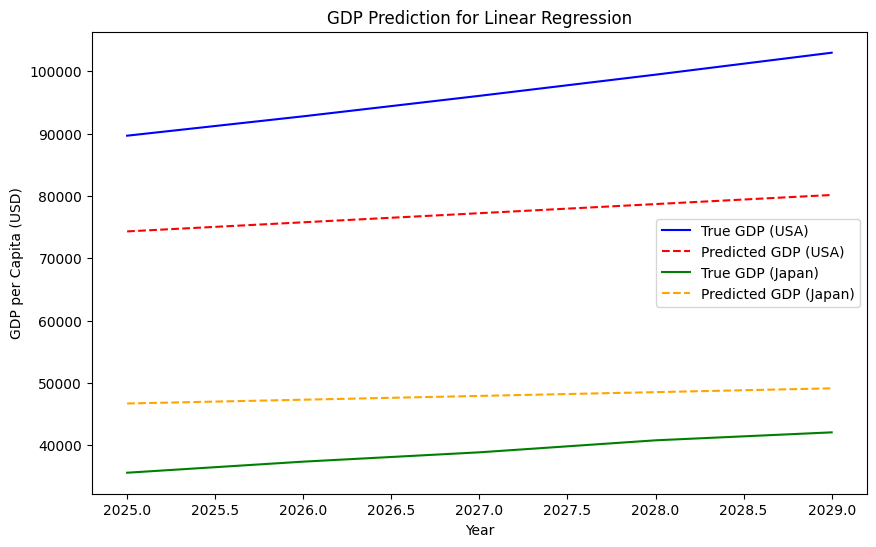

Model: Decision Tree
USA - MAE: 9596.464400000003, MSE: 114282744.22337846, RMSE: 10690.310763648476
Japan - MAE: 6096.788599999998, MSE: 42548119.15121338, RMSE: 6522.891931590878


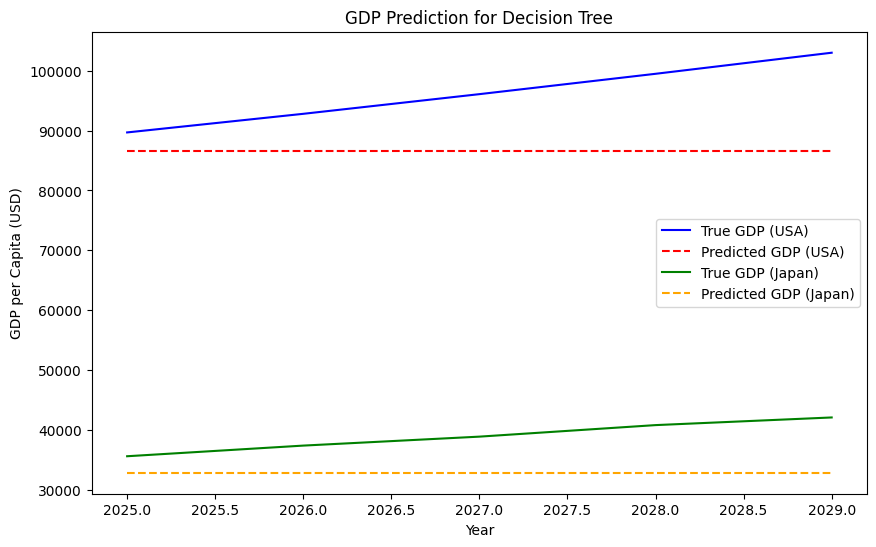

Model: Random Forest
USA - MAE: 12385.037279999937, MSE: 175579763.66989928, RMSE: 13250.651443227207
Japan - MAE: 5433.0507199999465, MSE: 34895328.04421538, RMSE: 5907.226764245248


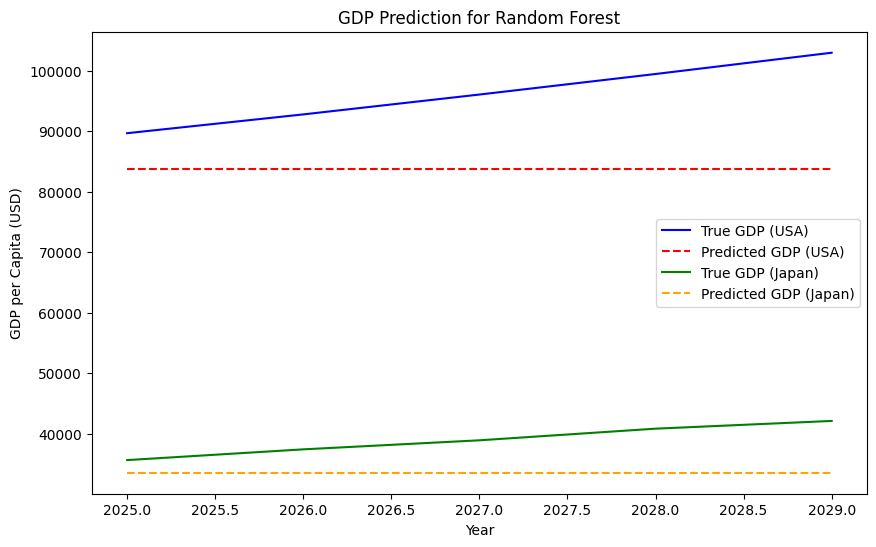

Model: Gradient Boosting
USA - MAE: 9610.236607699413, MSE: 114547262.89887695, RMSE: 10702.675501895634
Japan - MAE: 5926.3143660053665, MSE: 40498489.88284503, RMSE: 6363.8423835639605


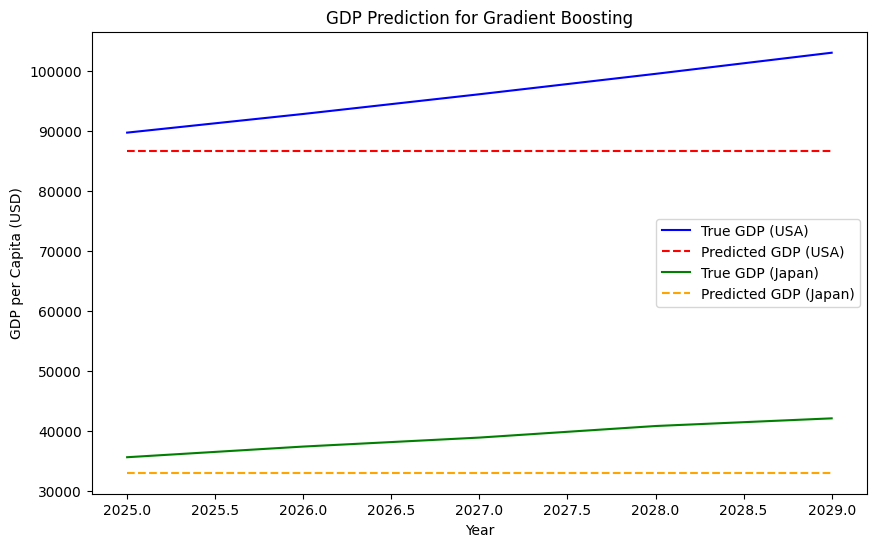

Model: XGBoost
USA - MAE: 9610.236607699413, MSE: 114547262.89887695, RMSE: 10702.675501895634
Japan - MAE: 5926.3143660053665, MSE: 40498489.88284503, RMSE: 6363.8423835639605


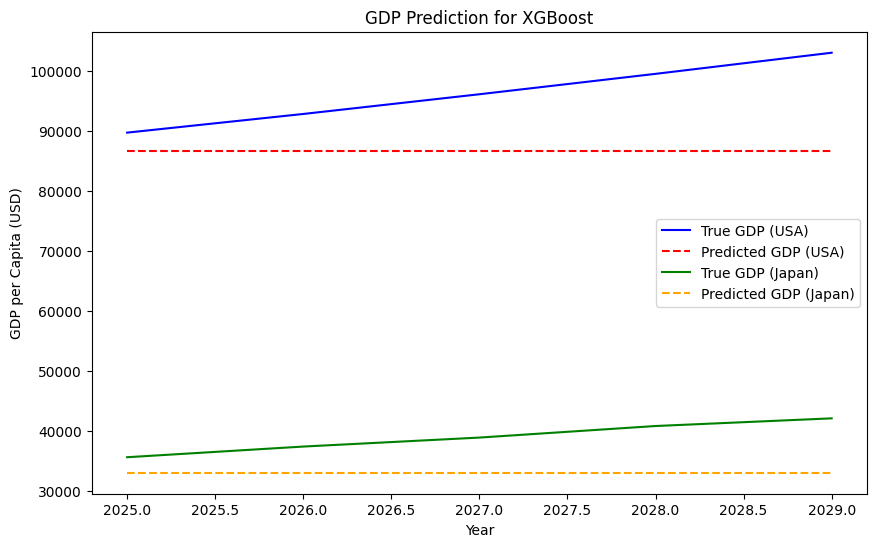

Model: SVR
USA - MAE: 58243.0814275577, MSE: 3414459223.03454, RMSE: 58433.374222566854
Japan - MAE: 3207.1612108993313, MSE: 15082066.234438252, RMSE: 3883.563599896138


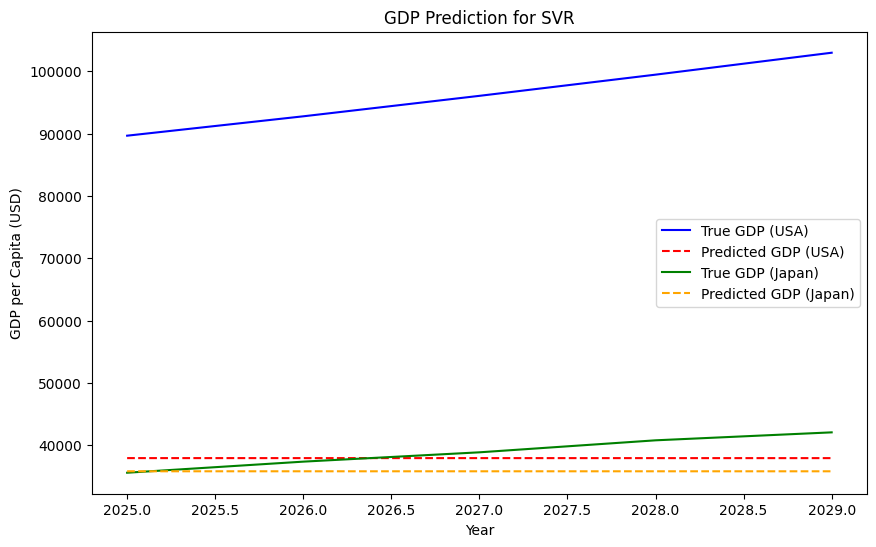

Model: ARIMA
USA - MAE: 629.1587496464751, MSE: 666800.7712433826, RMSE: 816.5786987445745
Japan - MAE: 5803.343136399433, MSE: 41303249.30855955, RMSE: 6426.760405411077


/Users/ayusharyakashyap/Library/Python/3.11/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


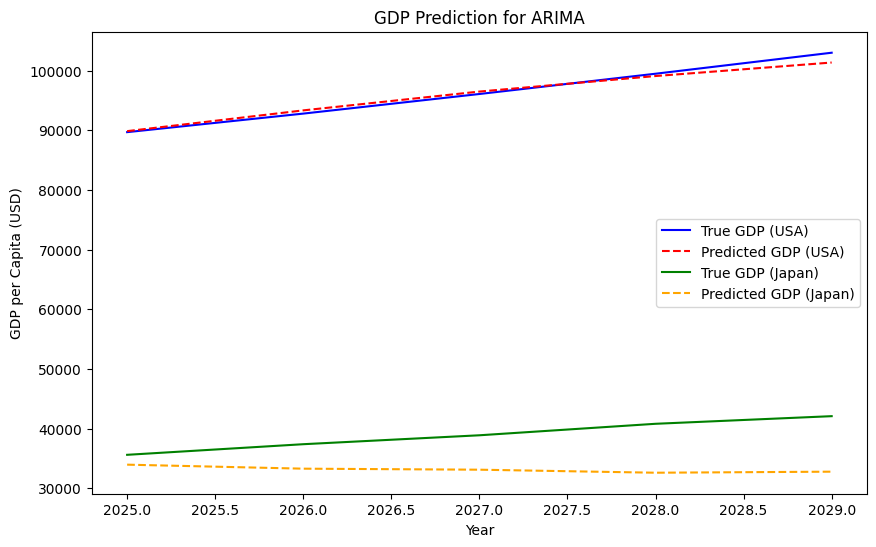

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset (this assumes you've already saved the data in a CSV file)
file_path = 'gdp_usa_japan.csv'  # Adjust this as needed
data = pd.read_csv(file_path)

# Assign years to the dataset manually (1980 to 2029)
years = list(range(1980, 2030))
data['Year'] = years

# Extract GDP data for USA and Japan
gdp_usa_japan = data[['Year', 'United States', 'Japan']]

# Split the data: Training data from 1980 to 2024, validation data from 2025 to 2029
train_data = gdp_usa_japan[gdp_usa_japan['Year'] <= 2024]
validation_data = gdp_usa_japan[gdp_usa_japan['Year'] >= 2025]

# Features and target for training the models
X_train = train_data[['Year']]  # Feature: Year
y_train_usa = train_data['United States']  # Target: GDP for United States
y_train_japan = train_data['Japan']  # Target: GDP for Japan

# Test data (Validation data)
X_test = validation_data[['Year']]  # Feature: Year for validation
y_test_usa = validation_data['United States']  # True GDP for United States
y_test_japan = validation_data['Japan']  # True GDP for Japan

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': GradientBoostingRegressor(),  # Placeholder for XGBoost (install XGBoost to use it)
    'SVR': SVR(),
    'ARIMA': ARIMA
}

# Train and predict with each model
for model_name, model in models.items():
    if model_name == 'ARIMA':
        # ARIMA requires time series data
        model_usa = ARIMA(train_data['United States'], order=(5, 1, 0))  # Adjust parameters as needed
        model_japan = ARIMA(train_data['Japan'], order=(5, 1, 0))  # Adjust parameters as needed
        model_usa_fit = model_usa.fit()
        model_japan_fit = model_japan.fit()
        
        # Predict for 2025-2029
        predictions_usa = model_usa_fit.forecast(steps=5)
        predictions_japan = model_japan_fit.forecast(steps=5)
    else:
        # Fit the model for USA
        model.fit(X_train, y_train_usa)
        predictions_usa = model.predict(X_test)
        
        # Fit the model for Japan
        model.fit(X_train, y_train_japan)
        predictions_japan = model.predict(X_test)
    
    # Evaluate the model
    mae_usa = mean_absolute_error(y_test_usa, predictions_usa)
    mse_usa = mean_squared_error(y_test_usa, predictions_usa)
    rmse_usa = np.sqrt(mse_usa)
    
    mae_japan = mean_absolute_error(y_test_japan, predictions_japan)
    mse_japan = mean_squared_error(y_test_japan, predictions_japan)
    rmse_japan = np.sqrt(mse_japan)
    
    # Print performance metrics for USA and Japan
    print(f"Model: {model_name}")
    print(f"USA - MAE: {mae_usa}, MSE: {mse_usa}, RMSE: {rmse_usa}")
    print(f"Japan - MAE: {mae_japan}, MSE: {mse_japan}, RMSE: {rmse_japan}")
    
    # Plot the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(validation_data['Year'], y_test_usa, label='True GDP (USA)', color='blue')
    plt.plot(validation_data['Year'], predictions_usa, label='Predicted GDP (USA)', color='red', linestyle='dashed')
    plt.plot(validation_data['Year'], y_test_japan, label='True GDP (Japan)', color='green')
    plt.plot(validation_data['Year'], predictions_japan, label='Predicted GDP (Japan)', color='orange', linestyle='dashed')
    plt.xlabel('Year')
    plt.ylabel('GDP per Capita (USD)')
    plt.title(f"GDP Prediction for {model_name}")
    plt.legend()
    plt.show()


Model: Linear Regression
USA - MAE: 18952.8889109793, MSE: 366210129.9710596, RMSE: 19136.617516454146
Japan - MAE: 8976.662575362303, MSE: 82717499.39309558, RMSE: 9094.916128975328


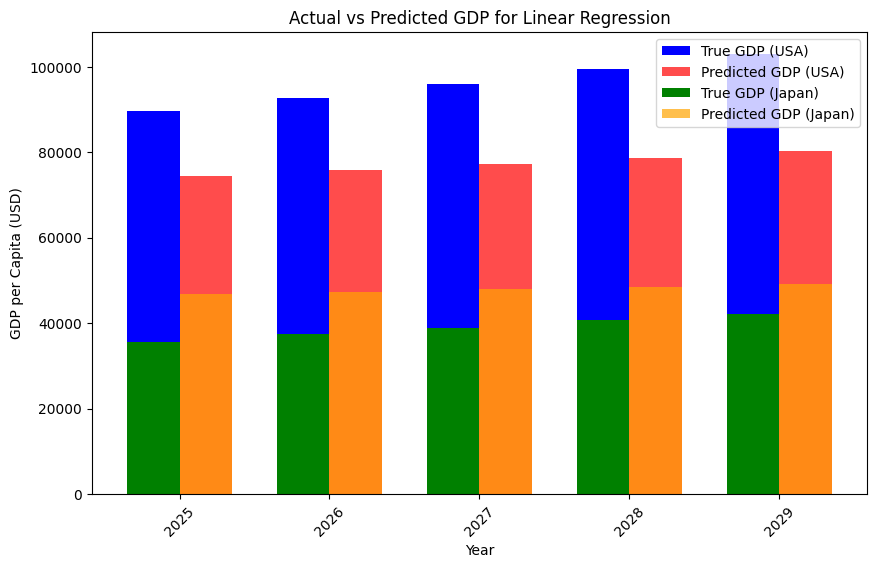

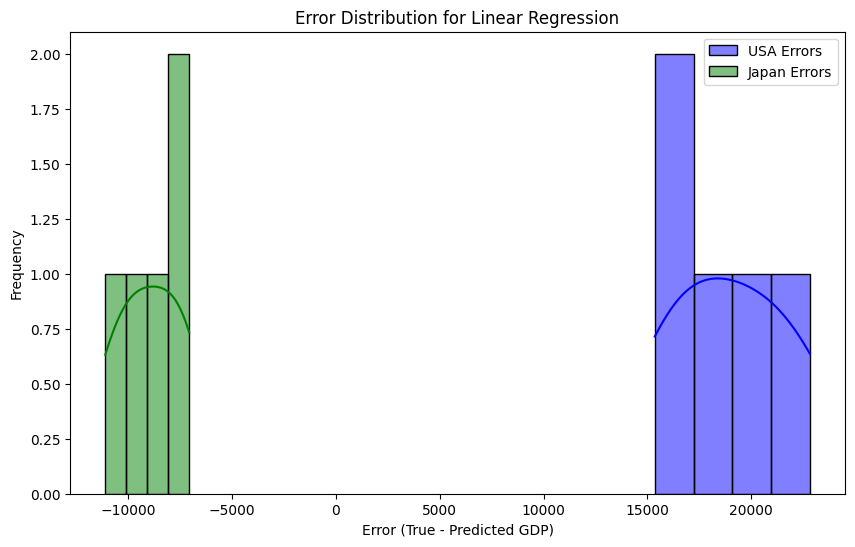

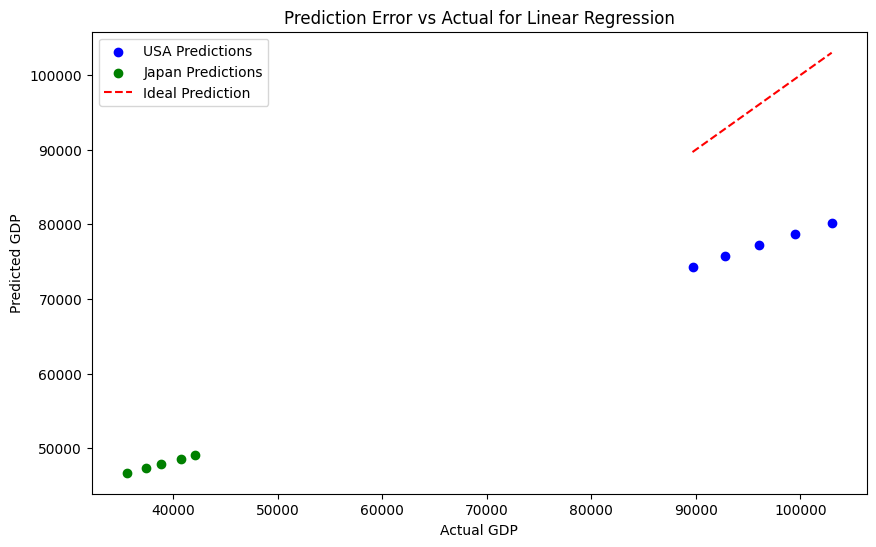

Model: Decision Tree
USA - MAE: 9596.464400000003, MSE: 114282744.22337846, RMSE: 10690.310763648476
Japan - MAE: 6096.788599999998, MSE: 42548119.15121338, RMSE: 6522.891931590878


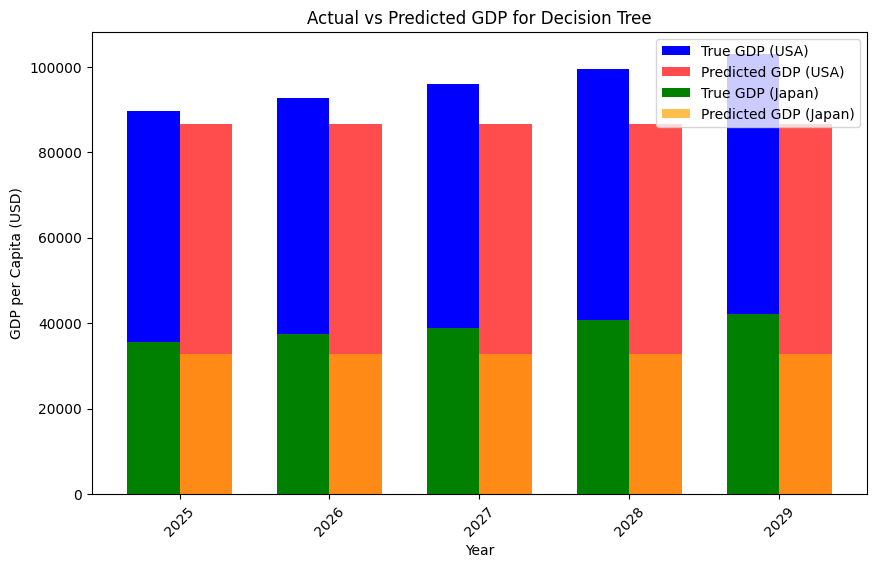

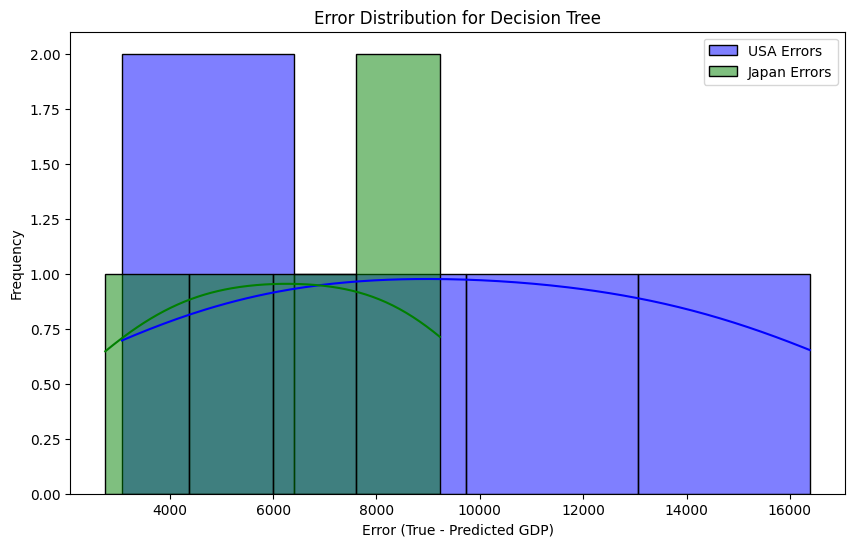

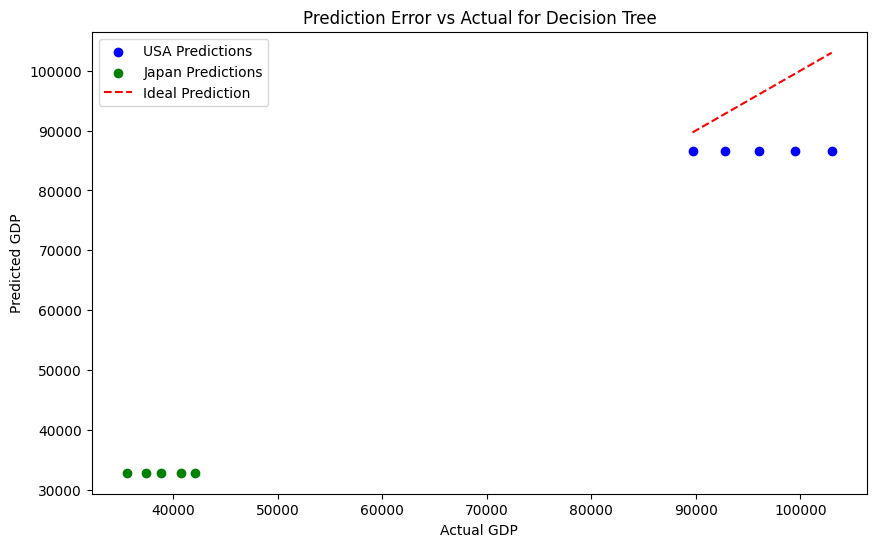

Model: Random Forest
USA - MAE: 12427.456920000002, MSE: 176632300.741367, RMSE: 13290.308526944249
Japan - MAE: 5249.59438999996, MSE: 32935529.177642494, RMSE: 5738.948438315376


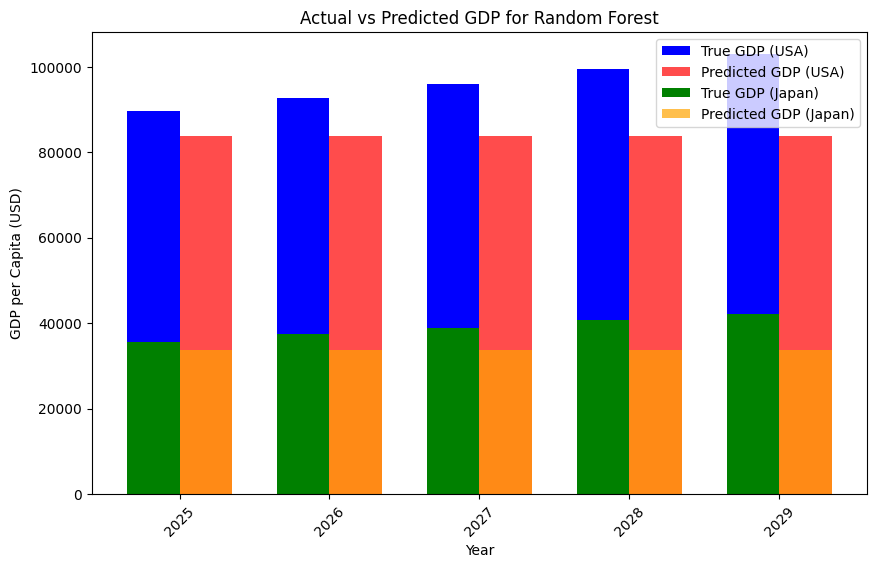

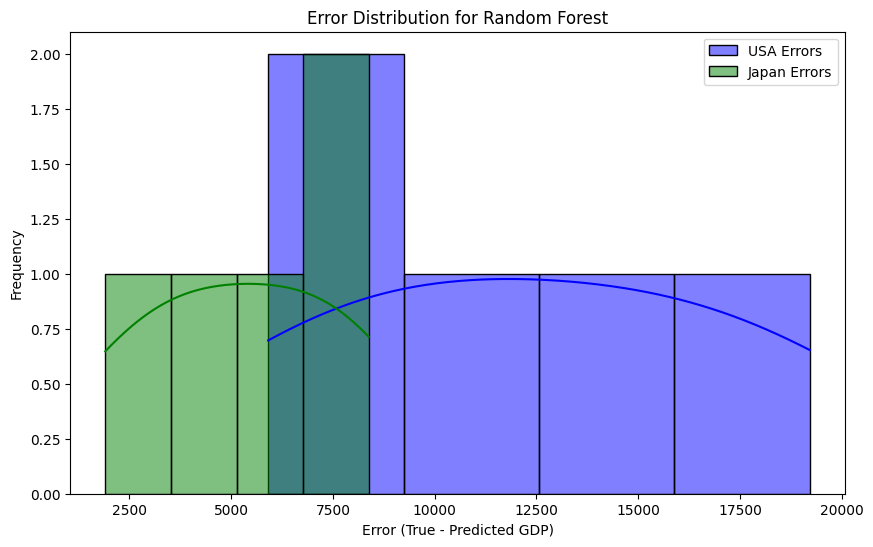

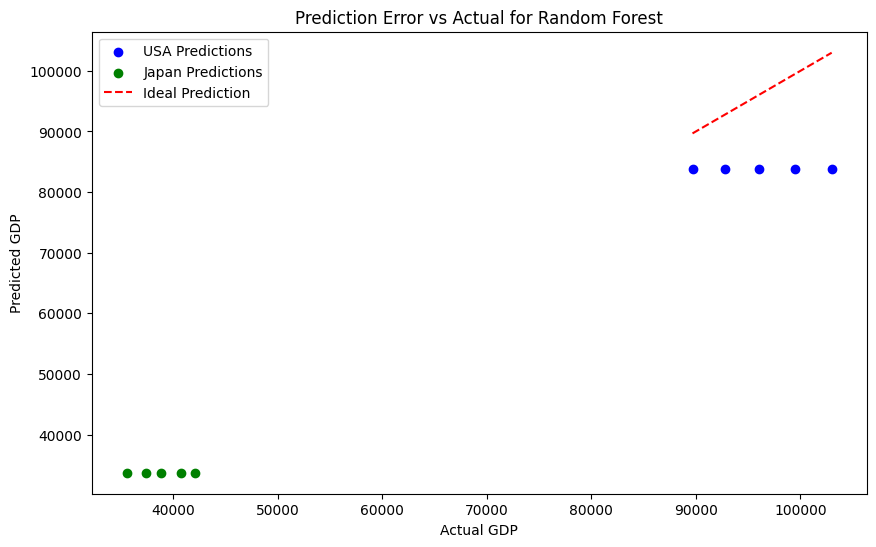

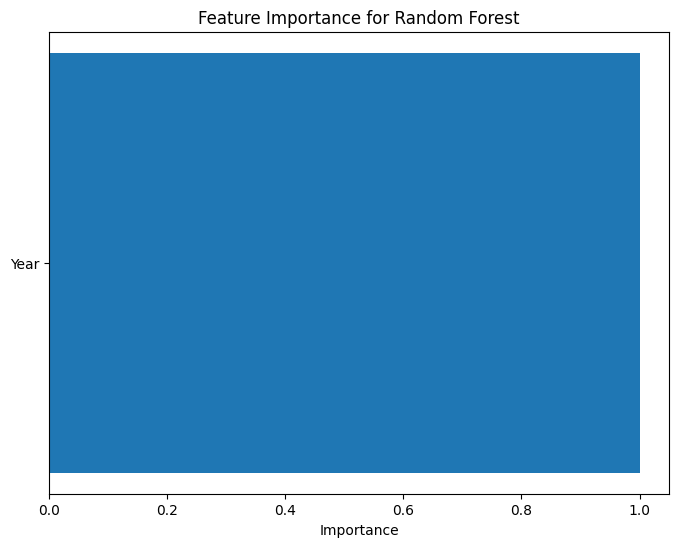

Model: Gradient Boosting
USA - MAE: 9610.236607699413, MSE: 114547262.89887695, RMSE: 10702.675501895634
Japan - MAE: 5926.3143660053665, MSE: 40498489.88284503, RMSE: 6363.8423835639605


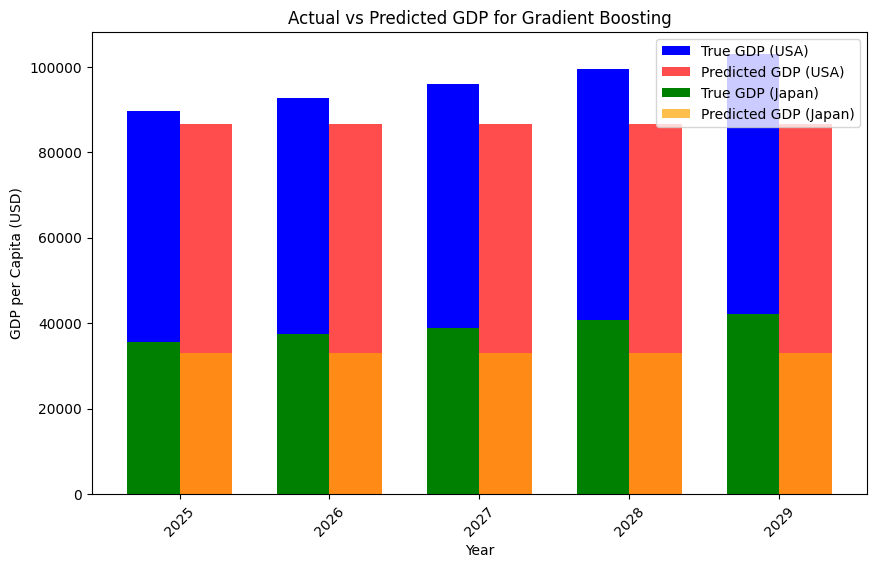

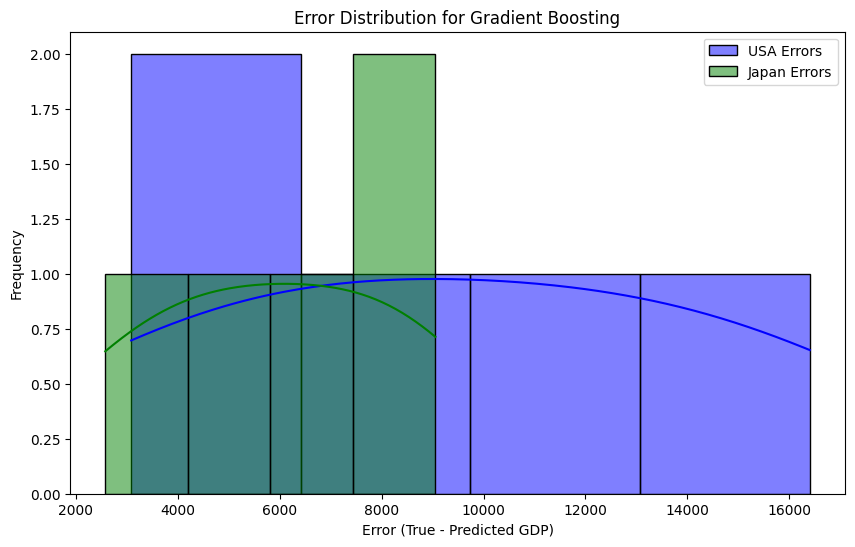

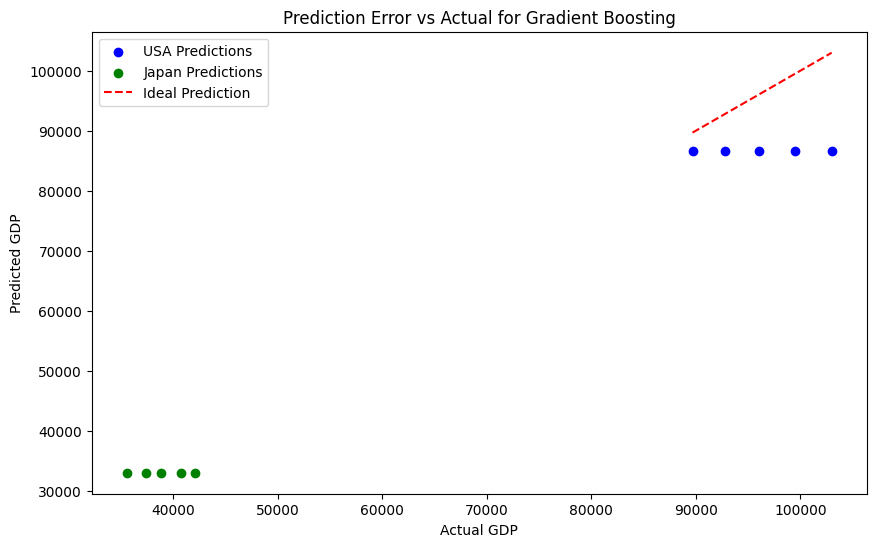

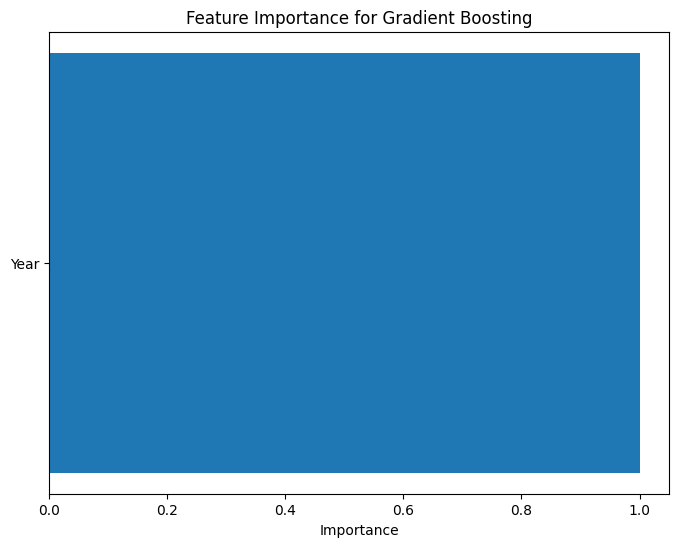

Model: SVR
USA - MAE: 58243.0814275577, MSE: 3414459223.03454, RMSE: 58433.374222566854
Japan - MAE: 3207.1612108993313, MSE: 15082066.234438252, RMSE: 3883.563599896138


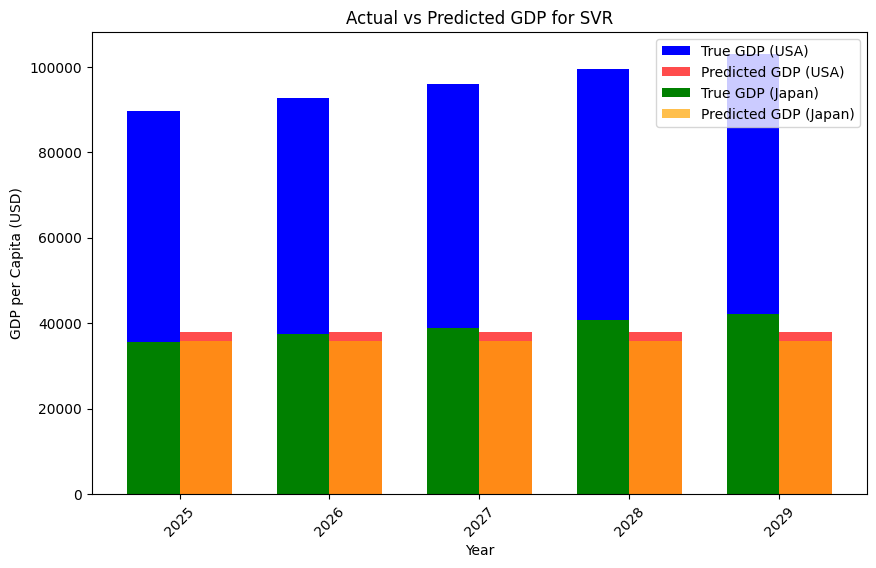

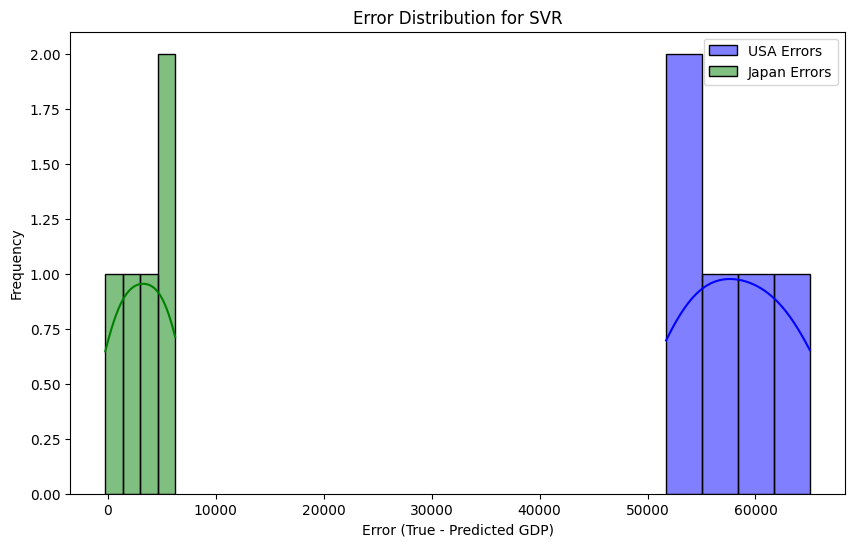

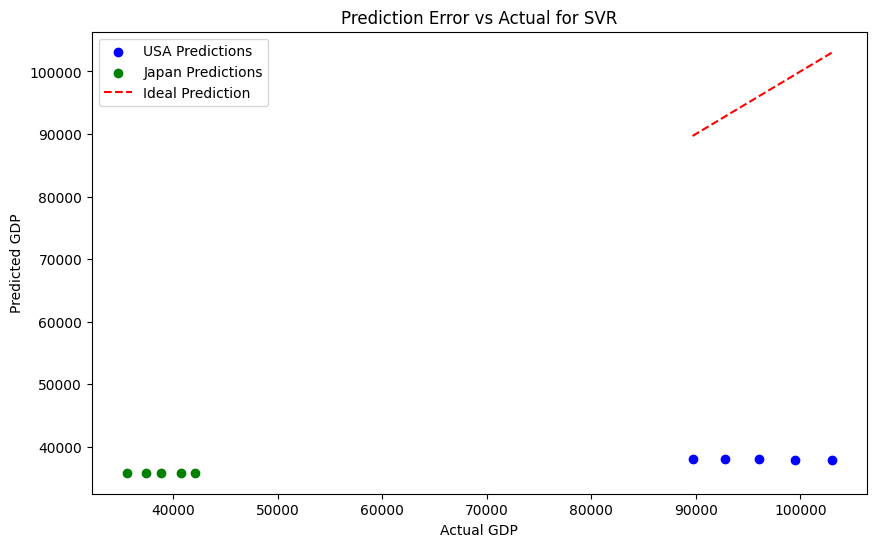

Model: ARIMA
USA - MAE: 629.1587496464751, MSE: 666800.7712433826, RMSE: 816.5786987445745
Japan - MAE: 5803.343136399433, MSE: 41303249.30855955, RMSE: 6426.760405411077


/Users/ayusharyakashyap/Library/Python/3.11/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


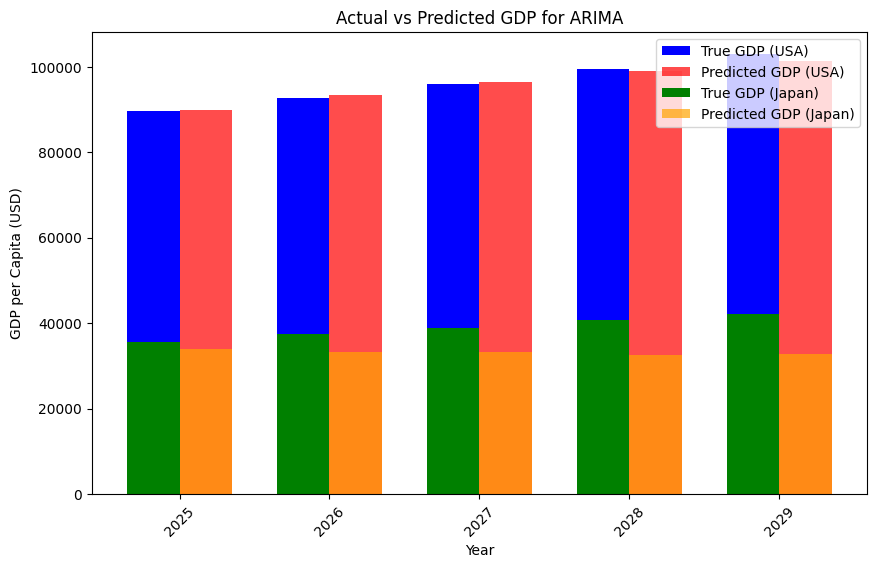

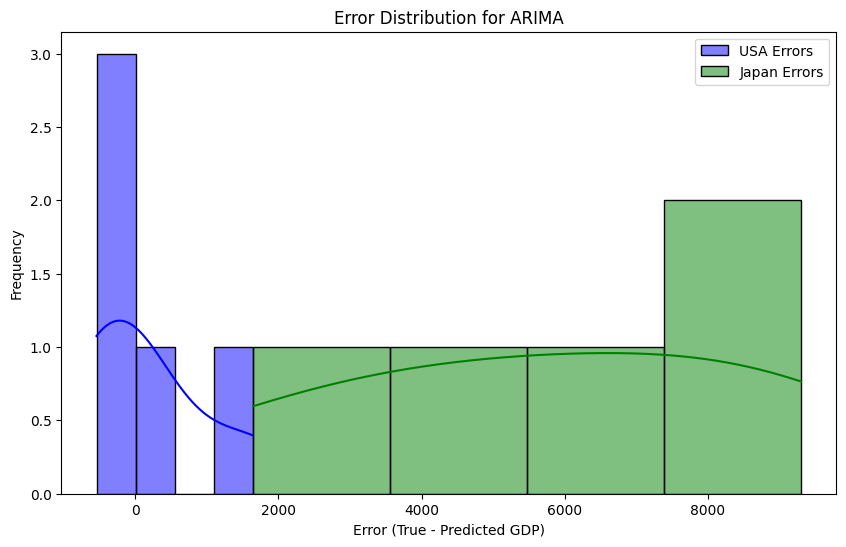

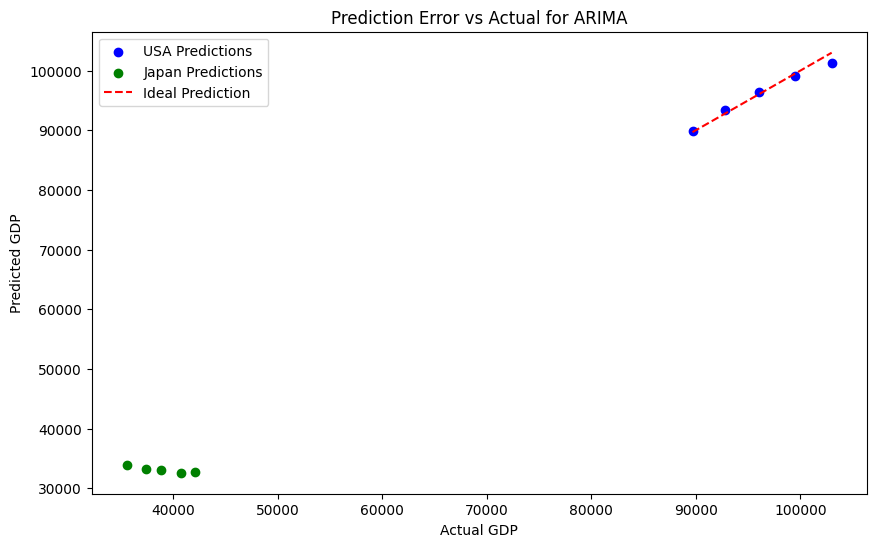

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset (this assumes you've already saved the data in a CSV file)
file_path = 'gdp_usa_japan.csv'  # Adjust this as needed
data = pd.read_csv(file_path)

# Assign years to the dataset manually (1980 to 2029)
years = list(range(1980, 2030))
data['Year'] = years

# Extract GDP data for USA and Japan
gdp_usa_japan = data[['Year', 'United States', 'Japan']]

# Split the data: Training data from 1980 to 2024, validation data from 2025 to 2029
train_data = gdp_usa_japan[gdp_usa_japan['Year'] <= 2024]
validation_data = gdp_usa_japan[gdp_usa_japan['Year'] >= 2025]

# Features and target for training the models
X_train = train_data[['Year']]  # Feature: Year
y_train_usa = train_data['United States']  # Target: GDP for United States
y_train_japan = train_data['Japan']  # Target: GDP for Japan

# Test data (Validation data)
X_test = validation_data[['Year']]  # Feature: Year for validation
y_test_usa = validation_data['United States']  # True GDP for United States
y_test_japan = validation_data['Japan']  # True GDP for Japan

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'ARIMA': ARIMA
}

# Define a dictionary to store model predictions
predictions_dict = {}

# Train and predict with each model
for model_name, model in models.items():
    if model_name == 'ARIMA':
        # ARIMA requires time series data
        model_usa = ARIMA(train_data['United States'], order=(5, 1, 0))  # Adjust parameters as needed
        model_japan = ARIMA(train_data['Japan'], order=(5, 1, 0))  # Adjust parameters as needed
        model_usa_fit = model_usa.fit()
        model_japan_fit = model_japan.fit()
        
        # Predict for 2025-2029
        predictions_usa = model_usa_fit.forecast(steps=5)
        predictions_japan = model_japan_fit.forecast(steps=5)
    else:
        # Fit the model for USA
        model.fit(X_train, y_train_usa)
        predictions_usa = model.predict(X_test)
        
        # Fit the model for Japan
        model.fit(X_train, y_train_japan)
        predictions_japan = model.predict(X_test)
    
    # Store predictions for comparison
    predictions_dict[model_name] = {
        'USA': predictions_usa,
        'Japan': predictions_japan
    }
    
    # Evaluate the model
    mae_usa = mean_absolute_error(y_test_usa, predictions_usa)
    mse_usa = mean_squared_error(y_test_usa, predictions_usa)
    rmse_usa = np.sqrt(mse_usa)
    
    mae_japan = mean_absolute_error(y_test_japan, predictions_japan)
    mse_japan = mean_squared_error(y_test_japan, predictions_japan)
    rmse_japan = np.sqrt(mse_japan)
    
    # Print performance metrics for USA and Japan
    print(f"Model: {model_name}")
    print(f"USA - MAE: {mae_usa}, MSE: {mse_usa}, RMSE: {rmse_usa}")
    print(f"Japan - MAE: {mae_japan}, MSE: {mse_japan}, RMSE: {rmse_japan}")
    
    # Visualizations
    # 1. Bar chart: Actual vs Predicted for 2025-2029
    plt.figure(figsize=(10, 6))
    years_validation = validation_data['Year'].values
    bar_width = 0.35
    index = np.arange(len(years_validation))
    
    plt.bar(index - bar_width/2, y_test_usa, bar_width, label='True GDP (USA)', color='blue')
    plt.bar(index + bar_width/2, predictions_usa, bar_width, label='Predicted GDP (USA)', color='red', alpha=0.7)
    
    plt.bar(index - bar_width/2, y_test_japan, bar_width, label='True GDP (Japan)', color='green')
    plt.bar(index + bar_width/2, predictions_japan, bar_width, label='Predicted GDP (Japan)', color='orange', alpha=0.7)

    plt.xlabel('Year')
    plt.ylabel('GDP per Capita (USD)')
    plt.title(f'Actual vs Predicted GDP for {model_name}')
    plt.xticks(index, years_validation, rotation=45)
    plt.legend()
    plt.show()
    
    # 2. Error distribution: Histogram of residuals (errors)
    errors_usa = y_test_usa - predictions_usa
    errors_japan = y_test_japan - predictions_japan
    
    plt.figure(figsize=(10, 6))
    sns.histplot(errors_usa, kde=True, color='blue', label='USA Errors')
    sns.histplot(errors_japan, kde=True, color='green', label='Japan Errors')
    plt.title(f'Error Distribution for {model_name}')
    plt.xlabel('Error (True - Predicted GDP)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # 3. Prediction Error vs Actual: Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_usa, predictions_usa, color='blue', label='USA Predictions')
    plt.scatter(y_test_japan, predictions_japan, color='green', label='Japan Predictions')
    plt.plot([min(y_test_usa), max(y_test_usa)], [min(y_test_usa), max(y_test_usa)], color='red', linestyle='--', label='Ideal Prediction')
    plt.xlabel('Actual GDP')
    plt.ylabel('Predicted GDP')
    plt.title(f'Prediction Error vs Actual for {model_name}')
    plt.legend()
    plt.show()

    # 4. Feature Importance for tree-based models (Random Forest, Gradient Boosting)
    if model_name in ['Random Forest', 'Gradient Boosting']:
        feature_importances = model.feature_importances_
        plt.figure(figsize=(8, 6))
        plt.barh(['Year'], feature_importances)
        plt.title(f'Feature Importance for {model_name}')
        plt.xlabel('Importance')
        plt.show()


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the transposed IMF dataset
file_path = 'transposed_IMFdataset.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Set 'Year' as the index, and convert the data to numeric values
data.set_index('Year', inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

# 1. GDP Growth Over Time for the Top 10 Countries
# Get the latest year (2029) and sort countries by GDP
latest_year = 2029
top_countries = data.loc[latest_year].sort_values(ascending=False).head(10)  # Top 10 countries by GDP

plt.figure(figsize=(12, 8))
for country in top_countries.index:
    plt.plot(data.index, data[country], label=country)
plt.title('GDP Growth Over Time for the Top 10 Countries (2029)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Heatmap of GDP Values Over Time for All Countries
plt.figure(figsize=(14, 10))
sns.heatmap(data.T, cmap='YlGnBu', annot=False, cbar_kws={'label': 'GDP per Capita (USD)'})
plt.title('GDP Heatmap: Countries x Years')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

# 3. Bar Plot for GDP Comparison in a Specific Year (e.g., 2029)
plt.figure(figsize=(14, 8))
gdp_2029 = data.loc[2029].sort_values(ascending=False)  # GDP values in 2029
gdp_2029.head(20).plot(kind='bar', color='lightblue')  # Show top 20 countries
plt.title(f'GDP of Top 20 Countries in {latest_year}')
plt.xlabel('Country')
plt.ylabel('GDP per Capita (USD)')
plt.xticks(rotation=45)
plt.show()

# 4. GDP Growth Rate Comparison Over Time
# Calculate annual growth rates for each country
gdp_growth = data.pct_change().dropna() * 100  # Percentage change per year

# Select top 5 countries for comparison
top_growth_countries = gdp_growth.mean().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 8))
for country in top_growth_countries:
    plt.plot(gdp_growth.index, gdp_growth[country], label=country)
plt.title('GDP Growth Rate Comparison Over Time (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# 5. Yearly GDP Distribution Across Countries (Boxplot)
plt.figure(figsize=(14, 8))
sns.boxplot(data=data.T, width=0.5, color='lightgreen')
plt.title('Yearly GDP Distribution Across Countries')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.xticks(rotation=45)
plt.show()


KeyError: "None of ['Year'] are in the columns"

In [41]:
import pandas as pd

# Load the transposed IMF dataset
file_path = 'transposed_IMFdataset.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Drop the first row (which seems to be metadata or a useless row)
data = data.drop(index=0)

# # Reset the index after dropping the row (optional, to avoid having gaps in index)
# data.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new CSV file
new_file_path = 'cleaned_IMFdataset.csv'  # Update with desired save path
data.to_csv(new_file_path, index=False)

# Optionally, print the path where the cleaned data has been saved
print(f"Cleaned dataset saved to: {new_file_path}")


Cleaned dataset saved to: cleaned_IMFdataset.csv


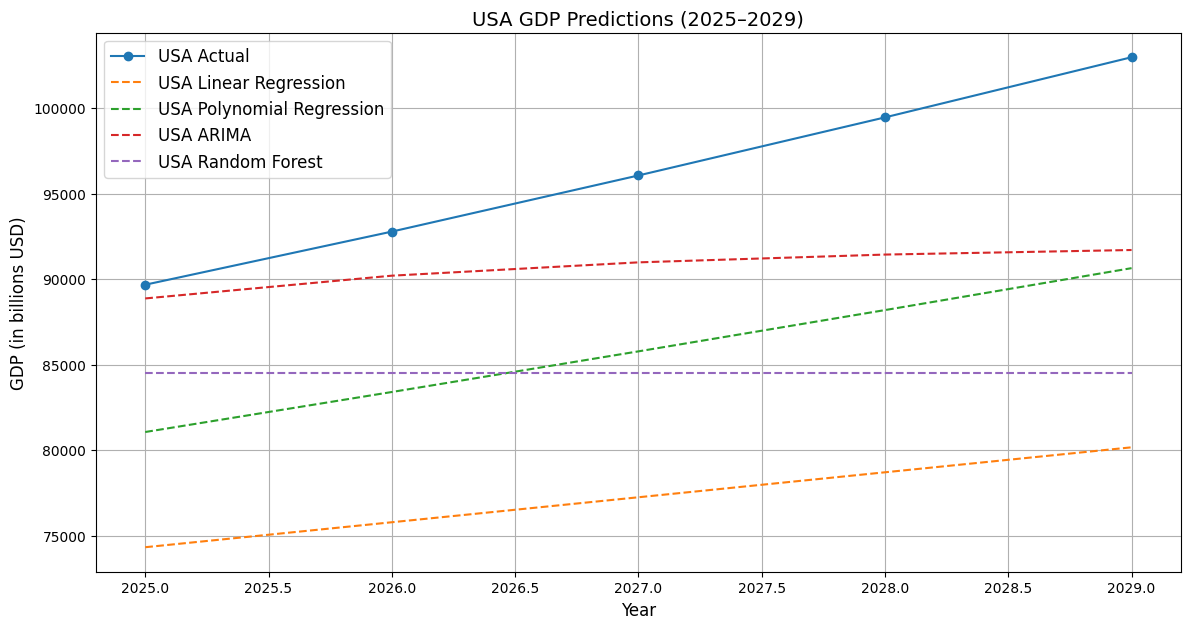

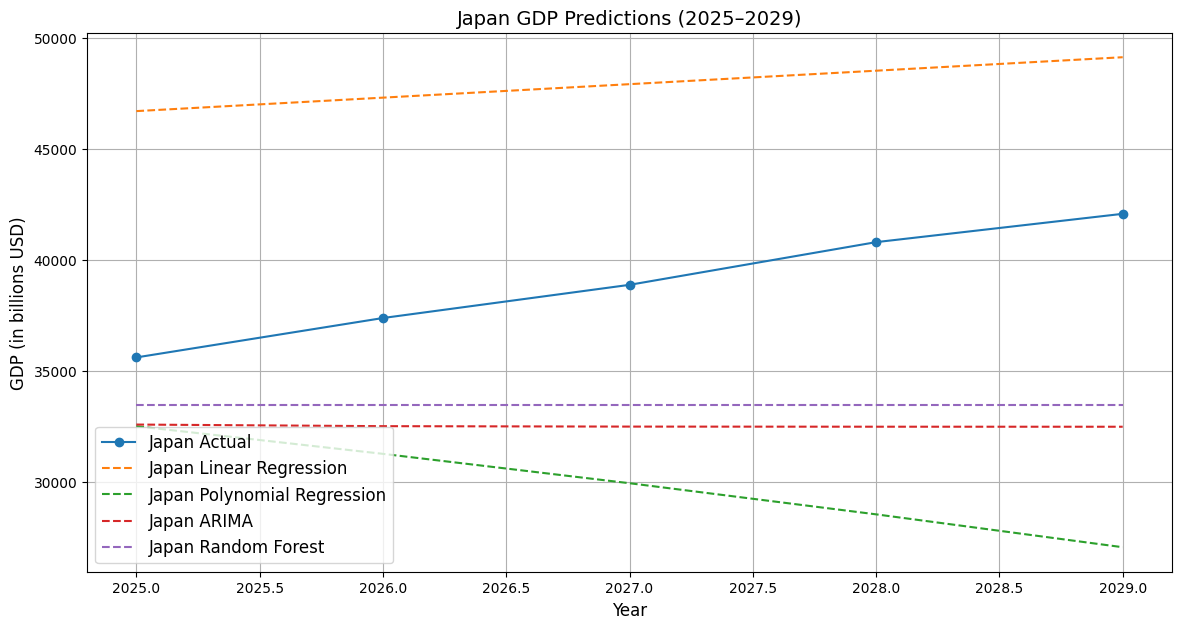

USA Mean Squared Error:
Linear Regression: 366210129.9710596
Polynomial Regression: 109496072.39176175
ARIMA: 44944593.27468676
Random Forest: 158150081.7263995

Japan Mean Squared Error:
Linear Regression: 82717499.39309558
Polynomial Regression: 100761490.84722413
ARIMA: 47047694.35183465
Random Forest: 35376803.78754151


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load and clean data
file_path = 'Final.csv'
data = pd.read_csv(file_path)
data.replace('no data', None, inplace=True)
data = data[['Year', 'United States', 'Japan']].dropna()
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Year'] = data['Year'].astype(int)
data = data.dropna()

# Split into training (1980-2024) and validation (2025-2029)
train_data = data[data['Year'] <= 2024]
valid_data = data[data['Year'] > 2024]

# Features and target
X_train = train_data[['Year']]
y_train_usa = train_data['United States']
y_train_japan = train_data['Japan']
X_valid = valid_data[['Year']]
y_valid_usa = valid_data['United States']
y_valid_japan = valid_data['Japan']

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train_usa)
pred_lr_usa = lr.predict(X_valid)
lr.fit(X_train, y_train_japan)
pred_lr_japan = lr.predict(X_valid)

# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
pred_poly_usa = lr_poly.predict(X_valid_poly)
lr_poly.fit(X_train_poly, y_train_japan)
pred_poly_japan = lr_poly.predict(X_valid_poly)

# 3. ARIMA (USA)
arima_usa = ARIMA(train_data['United States'], order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=len(valid_data))

# ARIMA (Japan)
arima_japan = ARIMA(train_data['Japan'], order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(valid_data))

# 4. Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_usa)
pred_rf_usa = rf.predict(X_valid)
rf.fit(X_train, y_train_japan)
pred_rf_japan = rf.predict(X_valid)

# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Year': valid_data['Year'],
    'USA_LR': pred_lr_usa,
    'Japan_LR': pred_lr_japan,
    'USA_Poly': pred_poly_usa,
    'Japan_Poly': pred_poly_japan,
    'USA_ARIMA': pred_arima_usa,
    'Japan_ARIMA': pred_arima_japan,
    'USA_RF': pred_rf_usa,
    'Japan_RF': pred_rf_japan,
    'USA_Actual': y_valid_usa.values,
    'Japan_Actual': y_valid_japan.values
})

# Evaluate and Plot Results
plt.figure(figsize=(14, 7))
plt.plot(valid_data['Year'], y_valid_usa, label='USA Actual', marker='o')
plt.plot(valid_data['Year'], pred_lr_usa, label='USA Linear Regression', linestyle='--')
plt.plot(valid_data['Year'], pred_poly_usa, label='USA Polynomial Regression', linestyle='--')
plt.plot(valid_data['Year'], pred_arima_usa, label='USA ARIMA', linestyle='--')
plt.plot(valid_data['Year'], pred_rf_usa, label='USA Random Forest', linestyle='--')
plt.title('USA GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(valid_data['Year'], y_valid_japan, label='Japan Actual', marker='o')
plt.plot(valid_data['Year'], pred_lr_japan, label='Japan Linear Regression', linestyle='--')
plt.plot(valid_data['Year'], pred_poly_japan, label='Japan Polynomial Regression', linestyle='--')
plt.plot(valid_data['Year'], pred_arima_japan, label='Japan ARIMA', linestyle='--')
plt.plot(valid_data['Year'], pred_rf_japan, label='Japan Random Forest', linestyle='--')
plt.title('Japan GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print Evaluation Metrics
print("USA Mean Squared Error:")
print("Linear Regression:", mean_squared_error(y_valid_usa, pred_lr_usa))
print("Polynomial Regression:", mean_squared_error(y_valid_usa, pred_poly_usa))
print("ARIMA:", mean_squared_error(y_valid_usa, pred_arima_usa))
print("Random Forest:", mean_squared_error(y_valid_usa, pred_rf_usa))

print("\nJapan Mean Squared Error:")
print("Linear Regression:", mean_squared_error(y_valid_japan, pred_lr_japan))
print("Polynomial Regression:", mean_squared_error(y_valid_japan, pred_poly_japan))
print("ARIMA:", mean_squared_error(y_valid_japan, pred_arima_japan))
print("Random Forest:", mean_squared_error(y_valid_japan, pred_rf_japan))


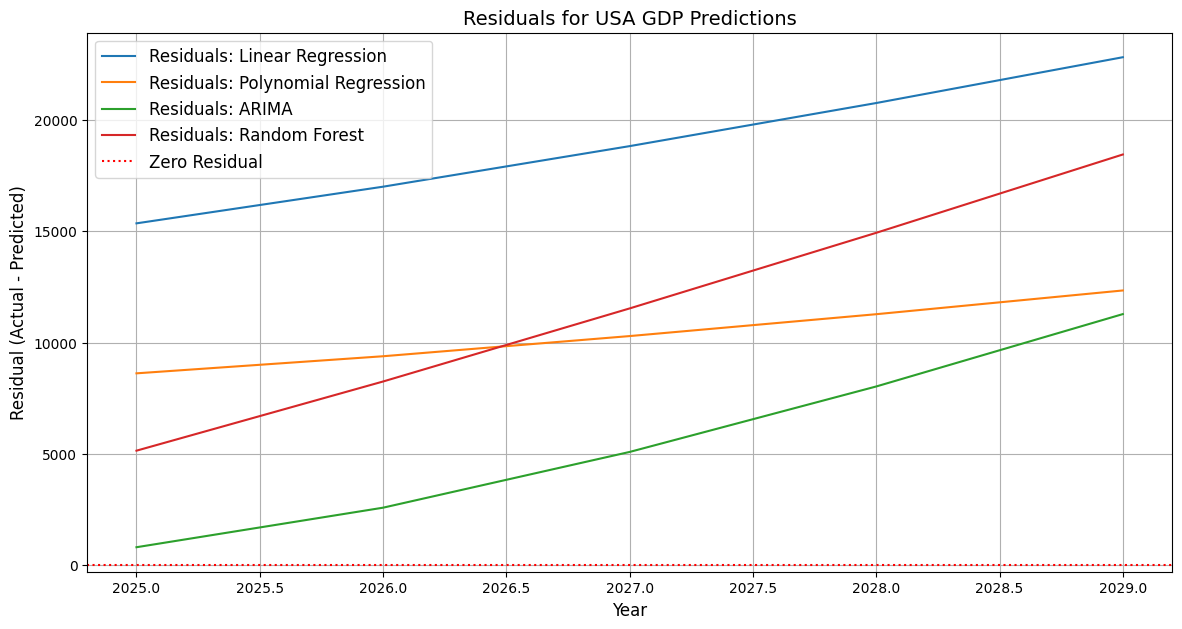

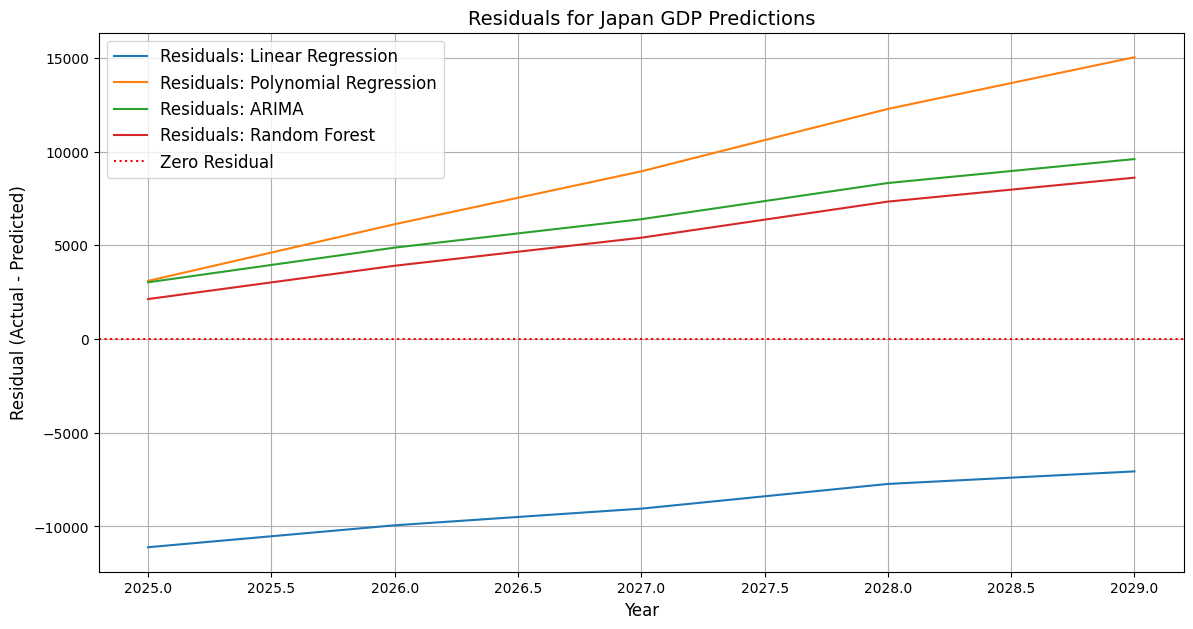

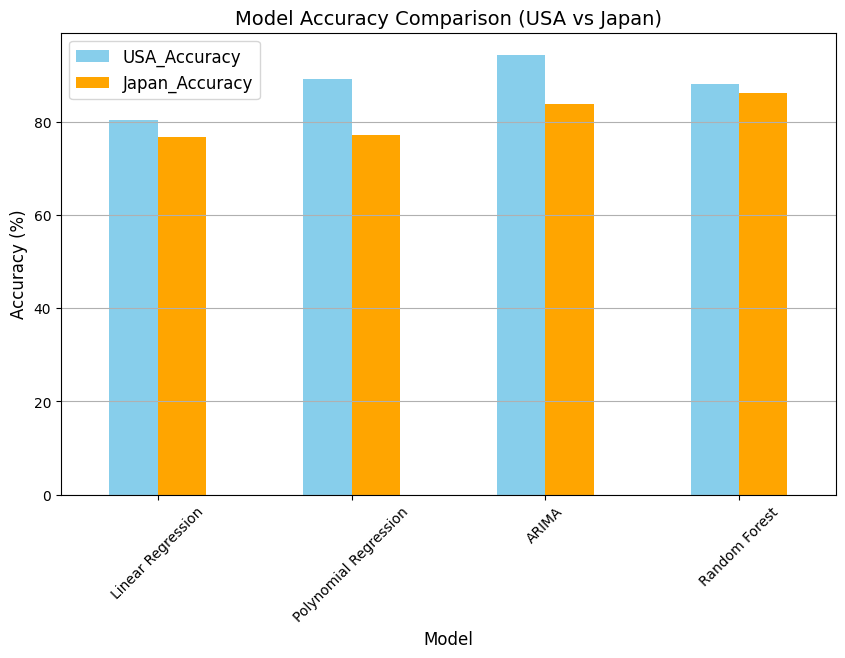

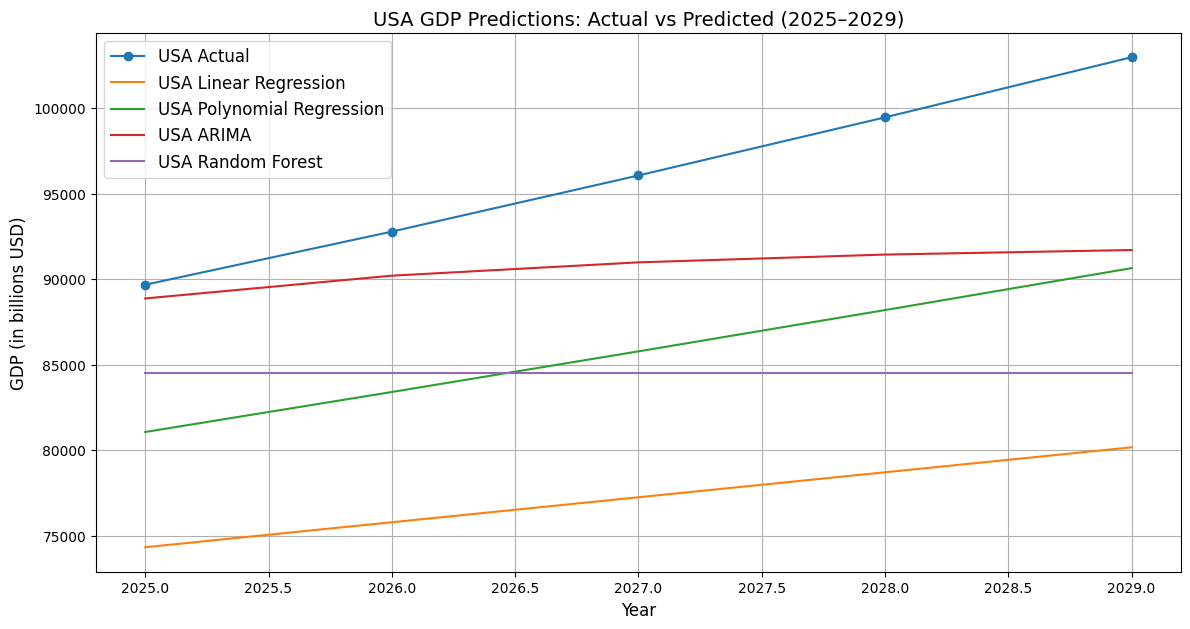

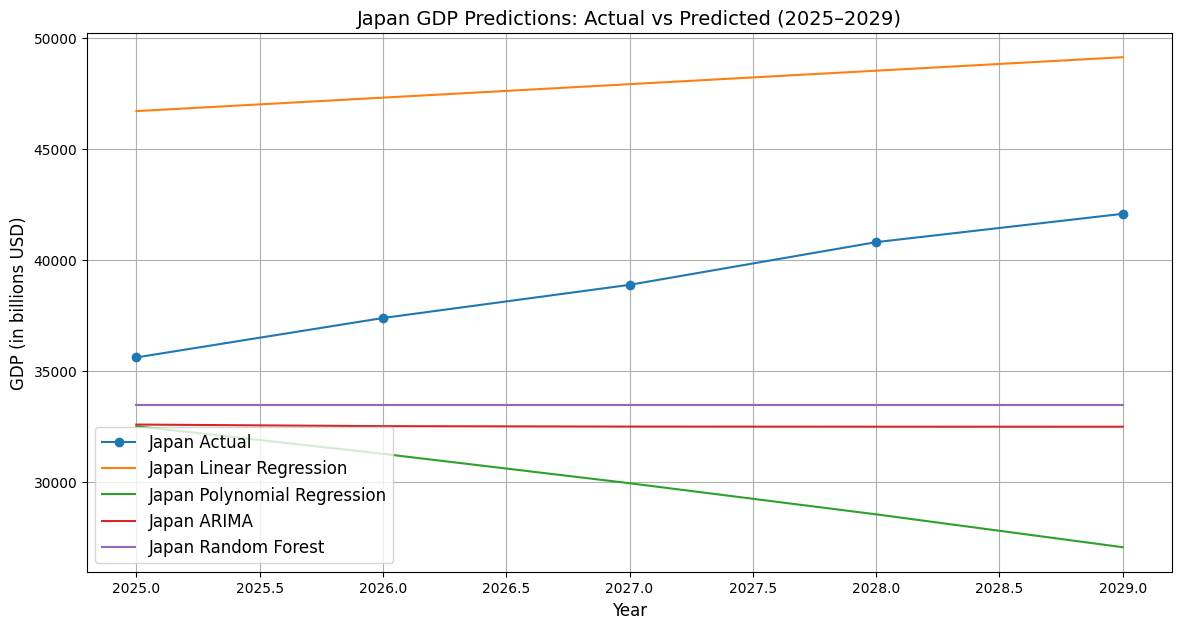

Accuracy Metrics (MAPE and Percentage Accuracy):
                   Model   USA_MAPE  USA_Accuracy  Japan_MAPE  Japan_Accuracy
0      Linear Regression  19.614616     80.385384   23.351255       76.648745
1  Polynomial Regression  10.748988     89.251012   22.778691       77.221309
2                  ARIMA   5.596737     94.403263   16.237476       83.762524
3          Random Forest  11.910066     88.089934   13.752391       86.247609


In [44]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error (MAPE) and Accuracy
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 100 - (mape * 100)
    return mape * 100, accuracy

# Evaluate Models
accuracy_metrics = []
models = ['Linear Regression', 'Polynomial Regression', 'ARIMA', 'Random Forest']

for model, usa_pred, japan_pred in zip(models, 
                                       [pred_lr_usa, pred_poly_usa, pred_arima_usa, pred_rf_usa], 
                                       [pred_lr_japan, pred_poly_japan, pred_arima_japan, pred_rf_japan]):
    usa_mape, usa_acc = calculate_accuracy(y_valid_usa, usa_pred)
    japan_mape, japan_acc = calculate_accuracy(y_valid_japan, japan_pred)
    accuracy_metrics.append({'Model': model, 'USA_MAPE': usa_mape, 'USA_Accuracy': usa_acc, 
                             'Japan_MAPE': japan_mape, 'Japan_Accuracy': japan_acc})

# Create a DataFrame for metrics
accuracy_df = pd.DataFrame(accuracy_metrics)

# Plot Residuals
plt.figure(figsize=(14, 7))
for model, usa_pred in zip(models, [pred_lr_usa, pred_poly_usa, pred_arima_usa, pred_rf_usa]):
    residuals = y_valid_usa - usa_pred
    plt.plot(valid_data['Year'], residuals, label=f'Residuals: {model}')
plt.axhline(0, color='red', linestyle=':', label='Zero Residual')
plt.title('Residuals for USA GDP Predictions', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Residual (Actual - Predicted)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for model, japan_pred in zip(models, [pred_lr_japan, pred_poly_japan, pred_arima_japan, pred_rf_japan]):
    residuals = y_valid_japan - japan_pred
    plt.plot(valid_data['Year'], residuals, label=f'Residuals: {model}')
plt.axhline(0, color='red', linestyle=':', label='Zero Residual')
plt.title('Residuals for Japan GDP Predictions', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Residual (Actual - Predicted)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot Model Comparison
accuracy_df.set_index('Model')[['USA_Accuracy', 'Japan_Accuracy']].plot(
    kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Model Accuracy Comparison (USA vs Japan)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.show()

# Combined Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(valid_data['Year'], y_valid_usa, label='USA Actual', marker='o')
for model, usa_pred in zip(models, [pred_lr_usa, pred_poly_usa, pred_arima_usa, pred_rf_usa]):
    plt.plot(valid_data['Year'], usa_pred, label=f'USA {model}')
plt.title('USA GDP Predictions: Actual vs Predicted (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(valid_data['Year'], y_valid_japan, label='Japan Actual', marker='o')
for model, japan_pred in zip(models, [pred_lr_japan, pred_poly_japan, pred_arima_japan, pred_rf_japan]):
    plt.plot(valid_data['Year'], japan_pred, label=f'Japan {model}')
plt.title('Japan GDP Predictions: Actual vs Predicted (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print accuracy metrics
print("Accuracy Metrics (MAPE and Percentage Accuracy):")
print(accuracy_df)


In [117]:
from tabulate import tabulate

# Print the accuracy metrics table
print("Accuracy Metrics (MAPE and Percentage Accuracy):")
print(tabulate(accuracy_df, headers='keys', tablefmt='grid', showindex=False))


Accuracy Metrics (MAPE and Percentage Accuracy):
+-----------------------+------------+----------------+--------------+------------------+
| Model                 |   USA_MAPE |   USA_Accuracy |   Japan_MAPE |   Japan_Accuracy |
+=======================+============+================+==============+==================+
| Linear Regression     |   19.6146  |        80.3854 |      23.3513 |          76.6487 |
+-----------------------+------------+----------------+--------------+------------------+
| Polynomial Regression |   10.749   |        89.251  |      22.7787 |          77.2213 |
+-----------------------+------------+----------------+--------------+------------------+
| ARIMA                 |    5.59674 |        94.4033 |      16.2375 |          83.7625 |
+-----------------------+------------+----------------+--------------+------------------+
| Random Forest         |   11.9101  |        88.0899 |      13.7524 |          86.2476 |
+-----------------------+------------+-------------

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Ensure 'Year' column exists and is clean
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

# Remove columns with completely missing data
data = data.dropna(axis=1, how='all')

# Convert all values to numeric, handling missing data
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows or columns with significant missing data
data = data.dropna(axis=0, how='any')  # Drop rows with NaN values

# Confirm the data cleaning process
print("Data cleaned successfully. Sample data:")
print(data.head())

# Visualization 1: Aggregate GDP of all countries over time
world_gdp = data.sum(axis=1)
plt.figure(figsize=(14, 7))
plt.plot(world_gdp.index, world_gdp, label='World GDP', marker='o')
plt.title('World GDP Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Visualization 2: Top 10 countries contributing to global GDP in the most recent year
latest_year = data.index.max()
top_countries = data.loc[latest_year].sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title(f'Top 10 Countries by GDP in {latest_year}', fontsize=14)
plt.xlabel('GDP (in billions USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Visualization 3: Annual percentage growth of world GDP
world_gdp_growth = world_gdp.pct_change() * 100
plt.figure(figsize=(14, 7))
plt.plot(world_gdp_growth.index, world_gdp_growth, label='World GDP Growth Rate', marker='o')
plt.axhline(0, color='red', linestyle='--', label='No Growth')
plt.title('World GDP Growth Rate Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Visualization 4: Distribution of GDP across countries (Bar Chart and Pie Chart)
plt.figure(figsize=(14, 7))
data.loc[latest_year].sort_values(ascending=False).plot(kind='bar', color='teal', alpha=0.7)
plt.title(f'GDP Distribution Across Countries in {latest_year}', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
data.loc[latest_year].sort_values(ascending=False).head(10).plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title(f'GDP Share of Top 10 Countries in {latest_year}', fontsize=14)
plt.ylabel('')
plt.show()

# Visualization 5: Heatmap of GDP over time
plt.figure(figsize=(14, 7))
sns.heatmap(data.transpose(), cmap='coolwarm', cbar_kws={'label': 'GDP (in billions USD)'})
plt.title('Heatmap of GDP Across Countries Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Visualization 6: Correlation matrix of GDPs
correlation_matrix = data.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Correlation Between Countries\' GDPs', fontsize=14)
plt.show()


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 231 entries, Year to ©IMF, 2024
dtypes: float64(160), int64(1), object(70)
memory usage: 90.4+ KB
None
Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1980 to 2029
Columns: 228 entries, Afghanistan to World
dtypes: float64(158), object(70)
memory usage: 89.5+ KB
None


TypeError: can only concatenate str (not "float") to str

Data cleaned successfully. Sample data:
Empty DataFrame
Columns: [Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, The, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo, Dem. Rep. of the, Congo, Republic of , Costa Rica, Croatia, Cyprus, Czech Republic, Côte d'Ivoire, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Fiji, Finland, France, Gabon, Gambia, The, Georgia, Germany, Ghana, Greece, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hong Kong SAR, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Keny

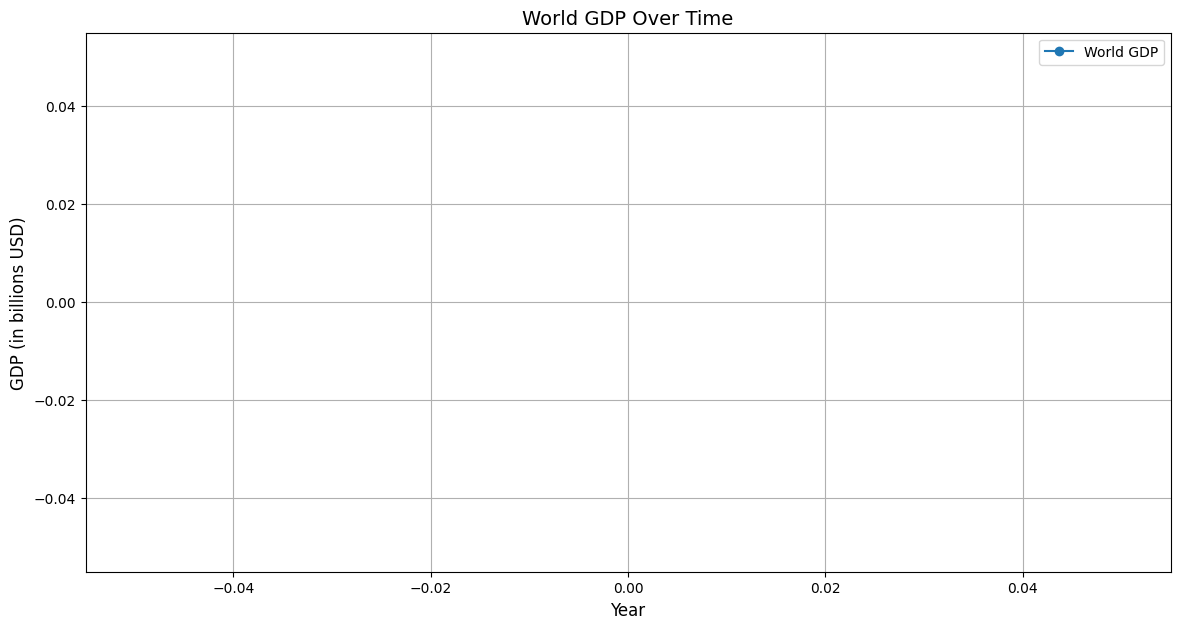

KeyError: nan

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Ensure 'Year' column exists and is clean
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

# Remove columns with completely missing data
data = data.dropna(axis=1, how='all')  # Drop columns with all NaN values

# Convert all values to numeric, handling missing data
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows or columns with significant missing data (if any)
data = data.dropna(axis=0, how='any')  # Drop rows with NaN values

# Confirm the data cleaning process
print("Data cleaned successfully. Sample data:")
print(data.head())

# Visualization 1: Aggregate GDP of all countries over time
world_gdp = data.sum(axis=1)
plt.figure(figsize=(14, 7))
plt.plot(world_gdp.index, world_gdp, label='World GDP', marker='o')
plt.title('World GDP Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Visualization 2: Top 10 countries contributing to global GDP in the most recent year
latest_year = data.index.max()
top_countries = data.loc[latest_year].sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title(f'Top 10 Countries by GDP in {latest_year}', fontsize=14)
plt.xlabel('GDP (in billions USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Visualization 3: Annual percentage growth of world GDP
world_gdp_growth = world_gdp.pct_change() * 100
plt.figure(figsize=(14, 7))
plt.plot(world_gdp_growth.index, world_gdp_growth, label='World GDP Growth Rate', marker='o')
plt.axhline(0, color='red', linestyle='--', label='No Growth')
plt.title('World GDP Growth Rate Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Visualization 4: Distribution of GDP across countries (Bar Chart and Pie Chart)
plt.figure(figsize=(14, 7))
data.loc[latest_year].sort_values(ascending=False).plot(kind='bar', color='teal', alpha=0.7)
plt.title(f'GDP Distribution Across Countries in {latest_year}', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
data.loc[latest_year].sort_values(ascending=False).head(10).plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title(f'GDP Share of Top 10 Countries in {latest_year}', fontsize=14)
plt.ylabel('')
plt.show()

# Visualization 5: Heatmap of GDP over time
plt.figure(figsize=(14, 7))
sns.heatmap(data.transpose(), cmap='coolwarm', cbar_kws={'label': 'GDP (in billions USD)'})
plt.title('Heatmap of GDP Across Countries Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Visualization 6: Correlation matrix of GDPs
correlation_matrix = data.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Correlation Between Countries\' GDPs', fontsize=14)
plt.show()


Data cleaned successfully. Sample data:
      Afghanistan  Albania   Algeria     Andorra    Angola  \
Year                                                         
1980   440.169045  728.359  2462.085  44288.2057  1055.339   
1981   440.169045  817.734  2502.130  44288.2057   961.721   
1982   440.169045  824.542  2446.588  44288.2057   936.935   
1983   440.169045  815.529  2514.256  44288.2057   951.500   
1984   440.169045  788.332  2640.191  44288.2057   982.624   

      Antigua and Barbuda  Argentina      Armenia         Aruba  Australia  \
Year                                                                         
1980             1935.022   8361.209  3691.341289  28082.536286  11007.874   
1981             2199.721   6671.428  3691.341289  28082.536286  12528.838   
1982             2479.206   3257.853  3691.341289  28082.536286  12235.188   
1983             2793.833   3962.735  3691.341289  28082.536286  11592.380   
1984             3259.644   4374.783  3691.341289  28082.

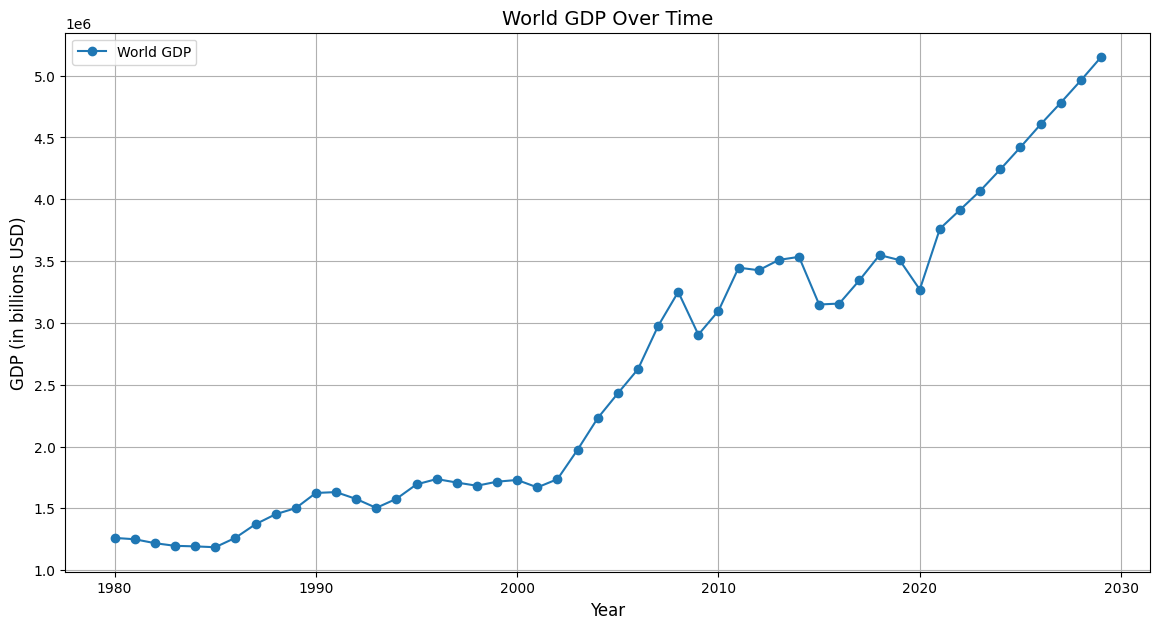

/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/3102134072.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


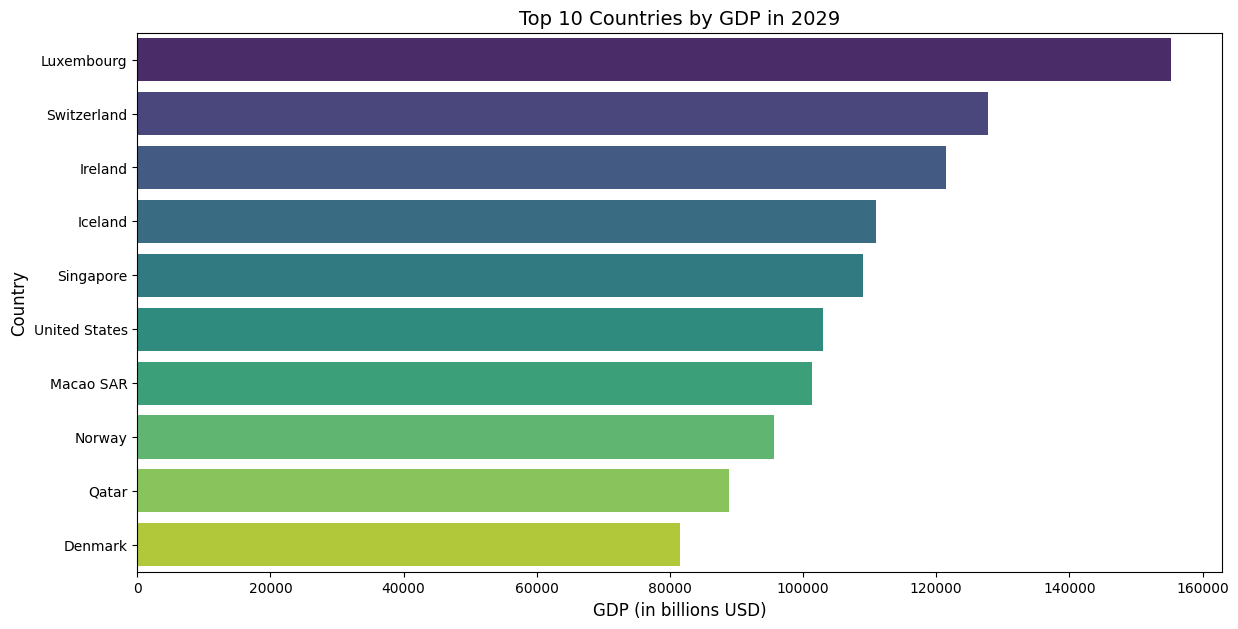

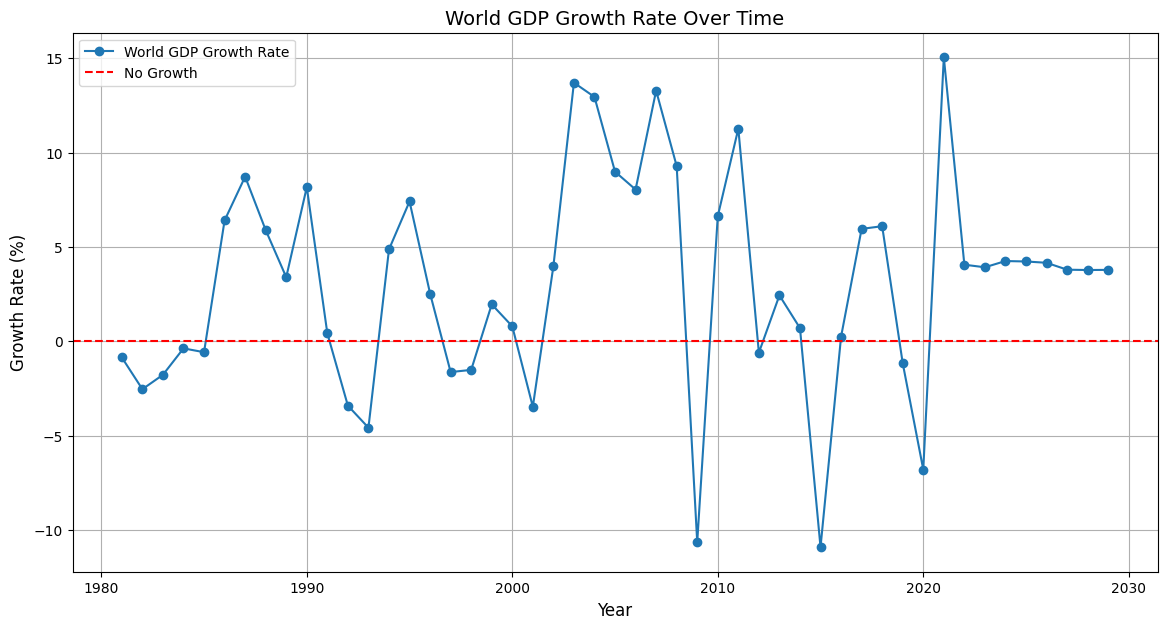

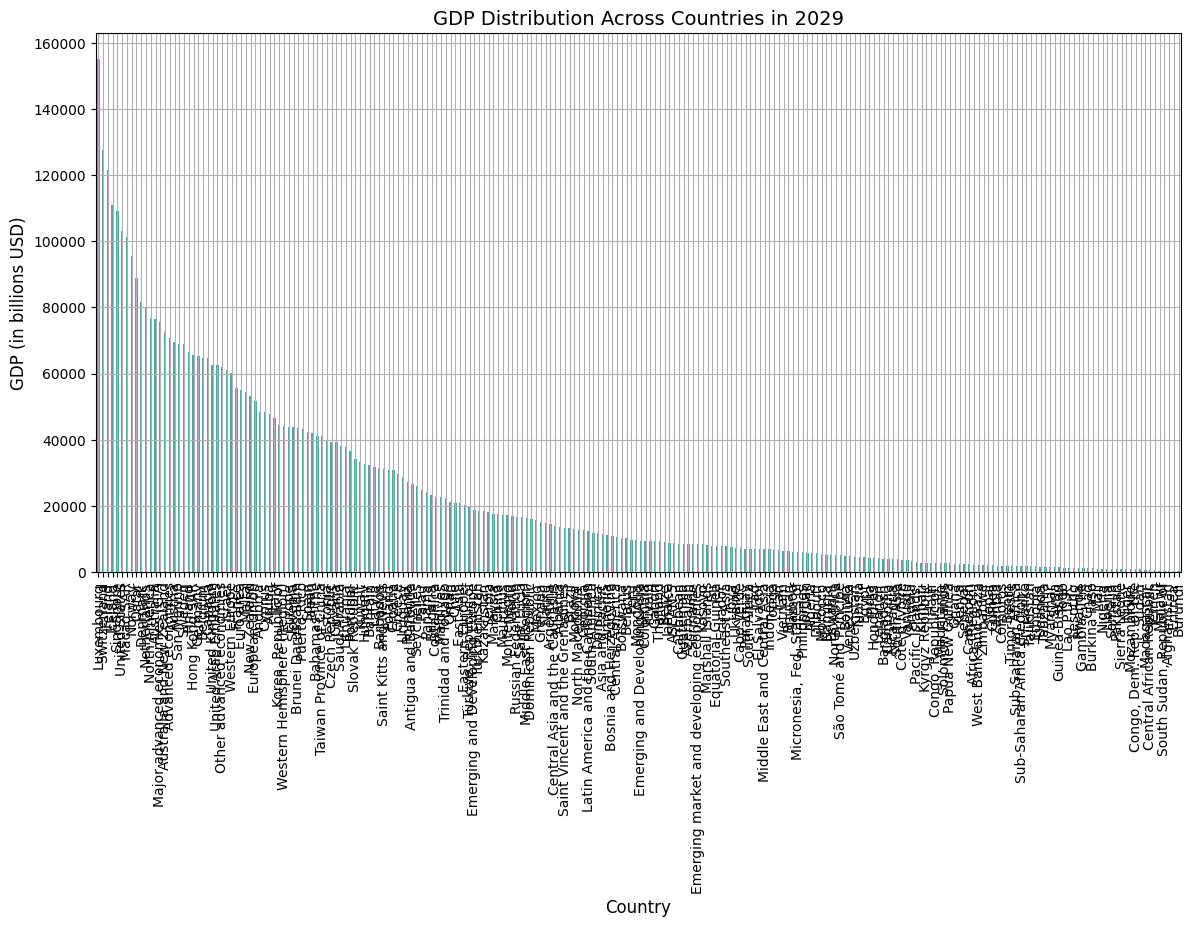

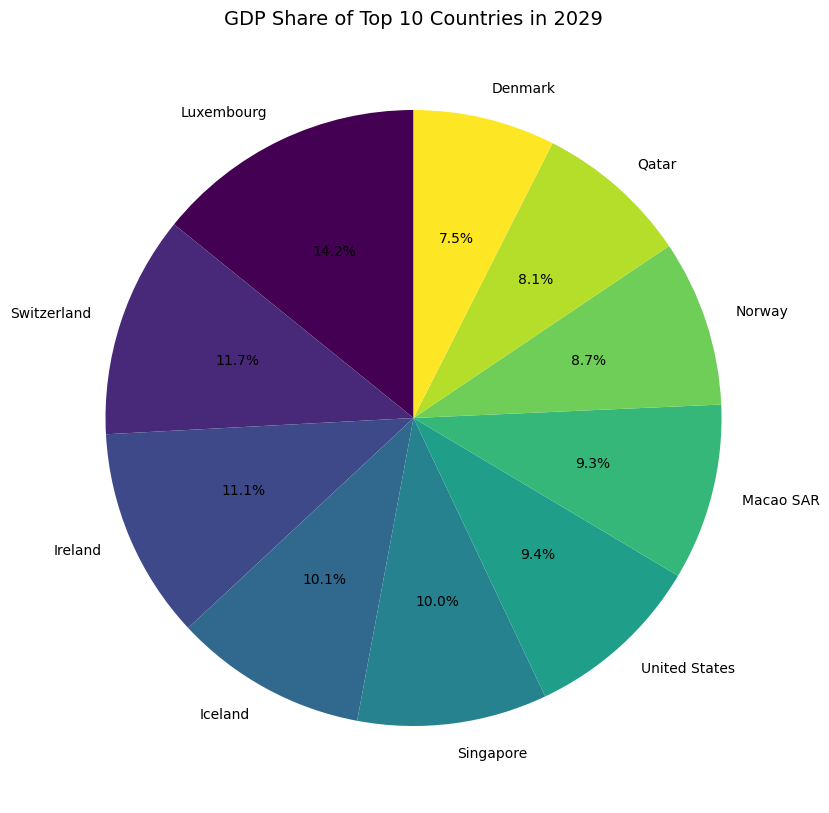

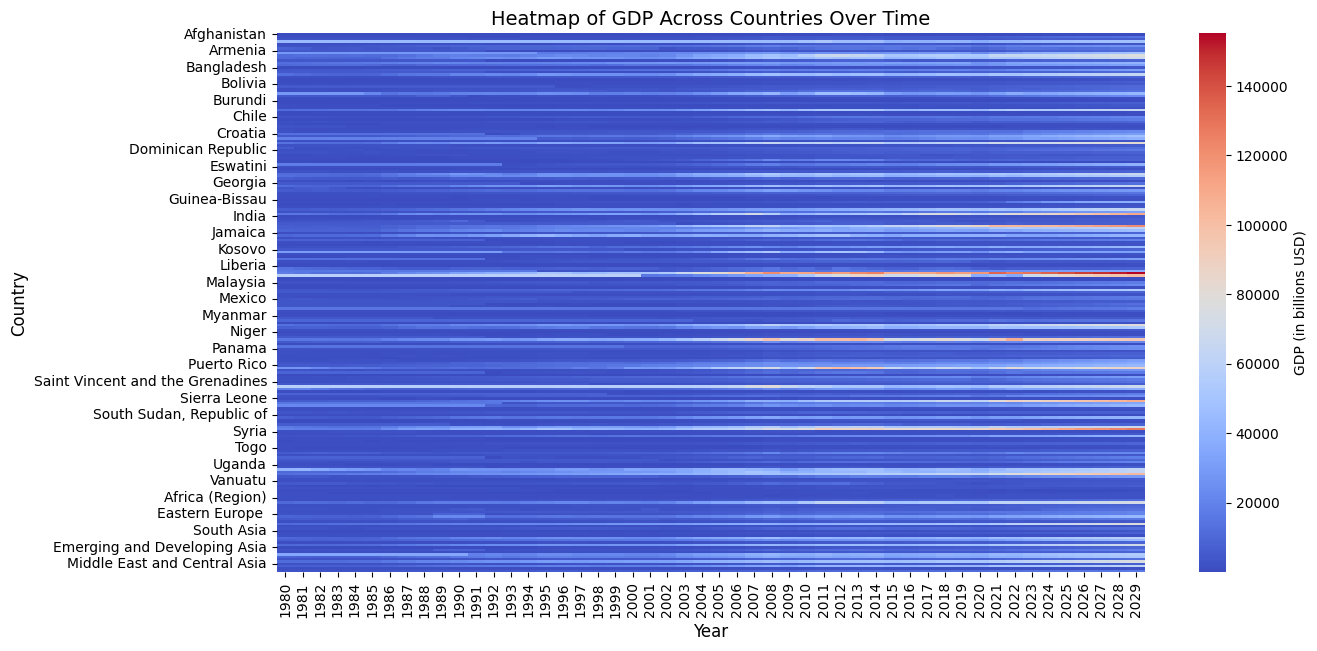

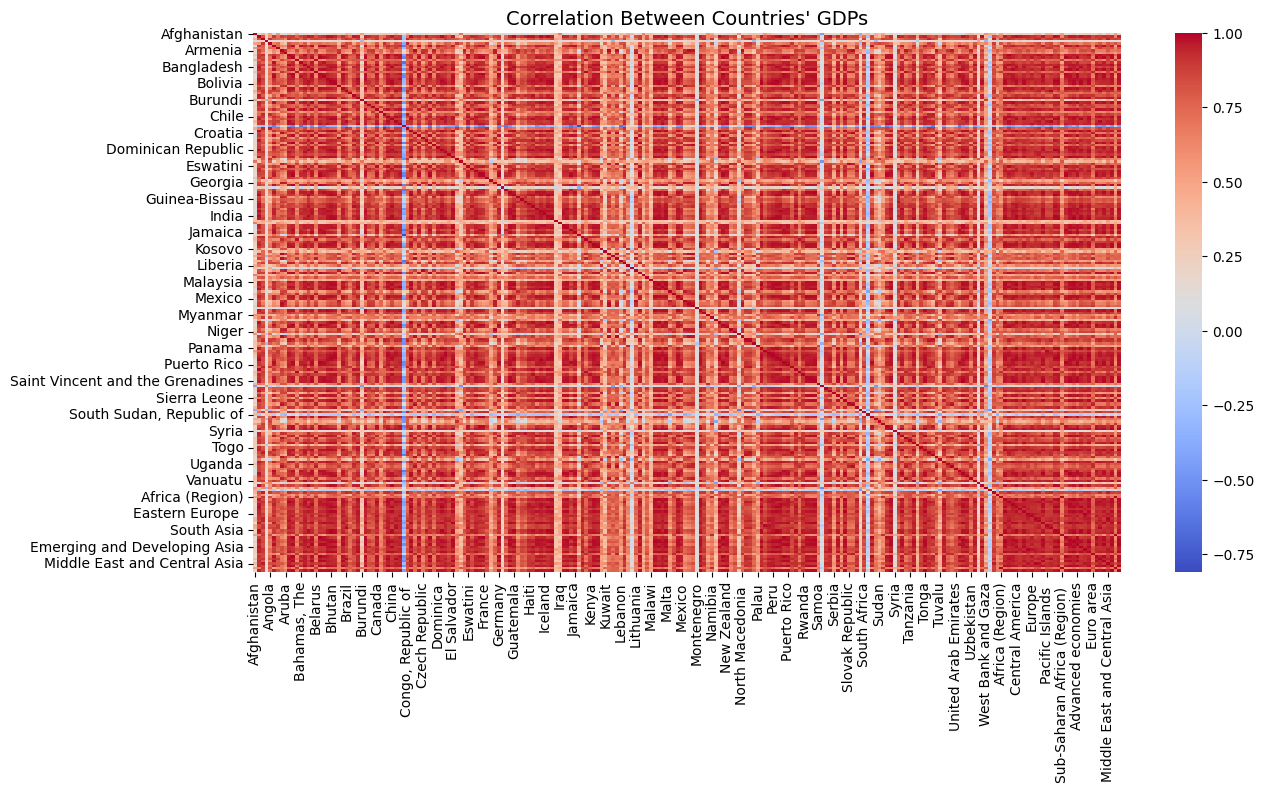

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Ensure 'Year' column exists and is clean
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

# Remove columns with completely missing data
data = data.dropna(axis=1, how='all')  # Drop columns with all NaN values

# Convert all values to numeric, handling missing data
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of the respective columns (countries)
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Confirm the data cleaning process
print("Data cleaned successfully. Sample data:")
print(data.head())

# Visualization 1: Aggregate GDP of all countries over time
world_gdp = data.sum(axis=1)
plt.figure(figsize=(14, 7))
plt.plot(world_gdp.index, world_gdp, label='World GDP', marker='o')
plt.title('World GDP Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Visualization 2: Top 10 countries contributing to global GDP in the most recent year
latest_year = data.index.max()
top_countries = data.loc[latest_year].sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title(f'Top 10 Countries by GDP in {latest_year}', fontsize=14)
plt.xlabel('GDP (in billions USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Visualization 3: Annual percentage growth of world GDP
world_gdp_growth = world_gdp.pct_change() * 100
plt.figure(figsize=(14, 7))
plt.plot(world_gdp_growth.index, world_gdp_growth, label='World GDP Growth Rate', marker='o')
plt.axhline(0, color='red', linestyle='--', label='No Growth')
plt.title('World GDP Growth Rate Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Visualization 4: Distribution of GDP across countries (Bar Chart and Pie Chart)
plt.figure(figsize=(14, 7))
data.loc[latest_year].sort_values(ascending=False).plot(kind='bar', color='teal', alpha=0.7)
plt.title(f'GDP Distribution Across Countries in {latest_year}', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
data.loc[latest_year].sort_values(ascending=False).head(10).plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title(f'GDP Share of Top 10 Countries in {latest_year}', fontsize=14)
plt.ylabel('')
plt.show()

# Visualization 5: Heatmap of GDP over time
plt.figure(figsize=(14, 7))
sns.heatmap(data.transpose(), cmap='coolwarm', cbar_kws={'label': 'GDP (in billions USD)'})
plt.title('Heatmap of GDP Across Countries Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Visualization 6: Correlation matrix of GDPs
correlation_matrix = data.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Correlation Between Countries\' GDPs', fontsize=14)
plt.show()

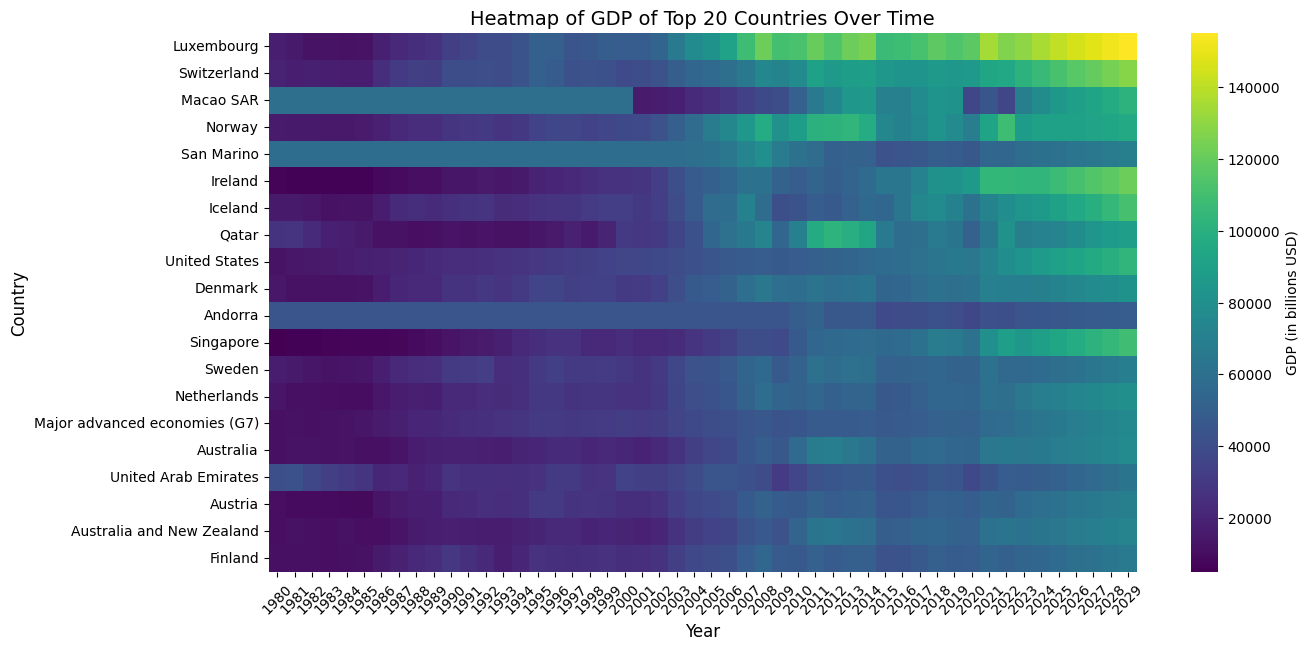

In [54]:
# Visualization: Heatmap of GDP across top 20 countries over time
top_countries = data.mean().sort_values(ascending=False).head(20).index  # Select top 20 countries by average GDP
data_top_countries = data[top_countries]  # Subset data to only top 20 countries

# Visualization: Heatmap of GDP for the top 20 countries across years
plt.figure(figsize=(14, 7))
sns.heatmap(data_top_countries.transpose(), cmap='viridis', cbar_kws={'label': 'GDP (in billions USD)'})
plt.title('Heatmap of GDP of Top 20 Countries Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.yticks(rotation=0)   # Ensure country labels are readable
plt.show()


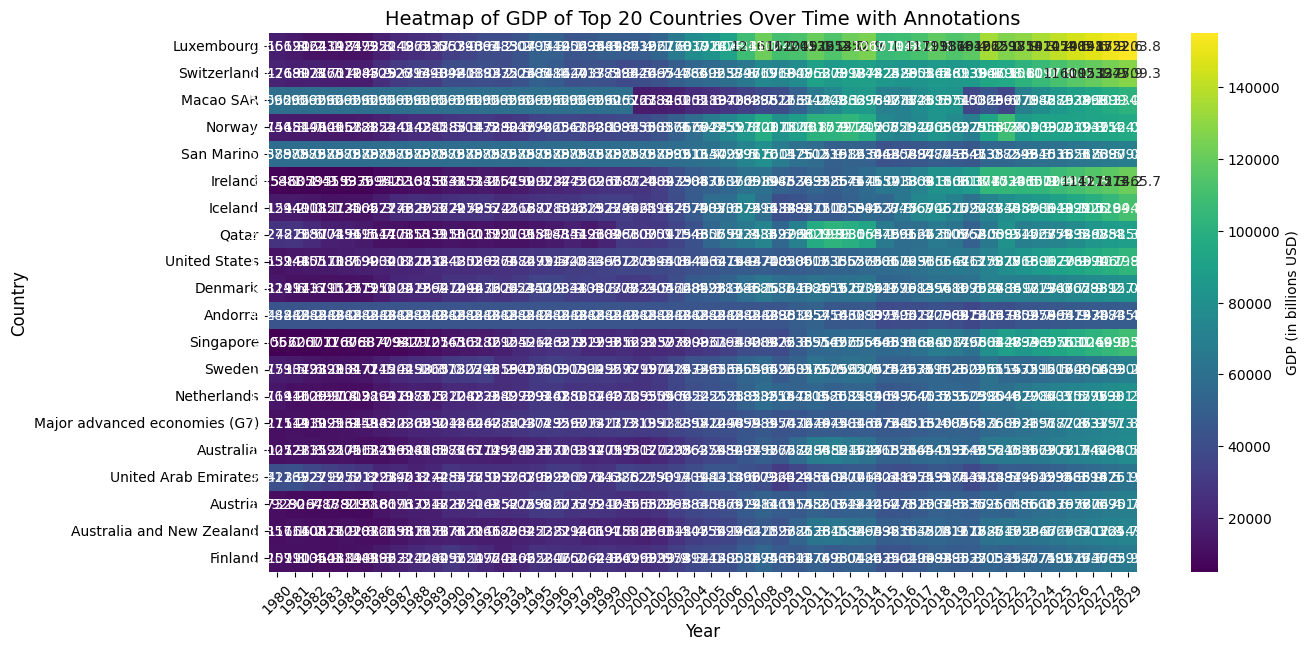

In [55]:
# Visualization with annotations
plt.figure(figsize=(14, 7))
sns.heatmap(data_top_countries.transpose(), cmap='viridis', annot=True, fmt='.1f', cbar_kws={'label': 'GDP (in billions USD)'})
plt.title('Heatmap of GDP of Top 20 Countries Over Time with Annotations', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.yticks(rotation=0)   # Ensure country labels are readable
plt.show()


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

data = data.dropna(axis=1, how='all')  # Remove columns with completely missing data
data = data.apply(pd.to_numeric, errors='coerce')  # Convert values to numeric
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)  # Replace NaN with column means

# Normalize the data (important for ML algorithms like K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.T)  # Transpose to scale countries across years

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Assume 5 clusters for demonstration
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data for visualization
data['Cluster'] = clusters

# Visualization 1: K-Means Clustering - Clustered Countries
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data.index, y=data.iloc[:, :-1].mean(axis=1), hue='Cluster', palette='viridis', data=data)
plt.title('K-Means Clustering of Countries Based on GDP', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average GDP (of all countries in cluster)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_components = pca.fit_transform(scaled_data)

# Visualization 2: PCA - 2D Visualization of Global GDP
plt.figure(figsize=(14, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis')
plt.title('PCA Visualization of Global GDP Data', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Apply DBSCAN for Density-Based Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to the data
data['DBSCAN_Cluster'] = dbscan_clusters

# Visualization 3: DBSCAN Clustering - Clustered Countries
plt.figure(figsize=(14, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue='DBSCAN_Cluster', palette='coolwarm', data=data)
plt.title('DBSCAN Clustering of Countries Based on GDP', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


ValueError: Length of values (228) does not match length of index (50)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

# Remove columns with completely missing data
data = data.dropna(axis=1, how='all')  # Remove columns with completely missing data

# Convert all values to numeric, handling errors and missing values
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of each column (country)
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Normalize the data (important for ML algorithms like K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.T)  # Transpose to scale countries across years

# Apply K-Means clustering (number of clusters based on your requirement, e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 clusters, adjust as needed
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data (countries)
clustered_data = data.copy()  # Make a copy of the data
clustered_data['Cluster'] = clusters  # Assign cluster labels

# Visualization 1: K-Means Clustering - Clustered Countries
plt.figure(figsize=(14, 7))
sns.scatterplot(x=clustered_data.index, y=clustered_data.iloc[:, :-1].mean(axis=1), hue='Cluster', palette='viridis', data=clustered_data)
plt.title('K-Means Clustering of Countries Based on GDP', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average GDP (of all countries in cluster)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_components = pca.fit_transform(scaled_data)

# Visualization 2: PCA - 2D Visualization of Global GDP
plt.figure(figsize=(14, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis')
plt.title('PCA Visualization of Global GDP Data', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Apply DBSCAN for Density-Based Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to the data
clustered_data['DBSCAN_Cluster'] = dbscan_clusters

# Visualization 3: DBSCAN Clustering - Clustered Countries
plt.figure(figsize=(14, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue='DBSCAN_Cluster', palette='coolwarm', data=clustered_data)
plt.title('DBSCAN Clustering of Countries Based on GDP', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

ValueError: Length of values (228) does not match length of index (50)

Data cleaned successfully. Sample data:
      Afghanistan  Albania   Algeria     Andorra    Angola  \
Year                                                         
1980   440.169045  728.359  2462.085  44288.2057  1055.339   
1981   440.169045  817.734  2502.130  44288.2057   961.721   
1982   440.169045  824.542  2446.588  44288.2057   936.935   
1983   440.169045  815.529  2514.256  44288.2057   951.500   
1984   440.169045  788.332  2640.191  44288.2057   982.624   

      Antigua and Barbuda  Argentina      Armenia         Aruba  Australia  \
Year                                                                         
1980             1935.022   8361.209  3691.341289  28082.536286  11007.874   
1981             2199.721   6671.428  3691.341289  28082.536286  12528.838   
1982             2479.206   3257.853  3691.341289  28082.536286  12235.188   
1983             2793.833   3962.735  3691.341289  28082.536286  11592.380   
1984             3259.644   4374.783  3691.341289  28082.

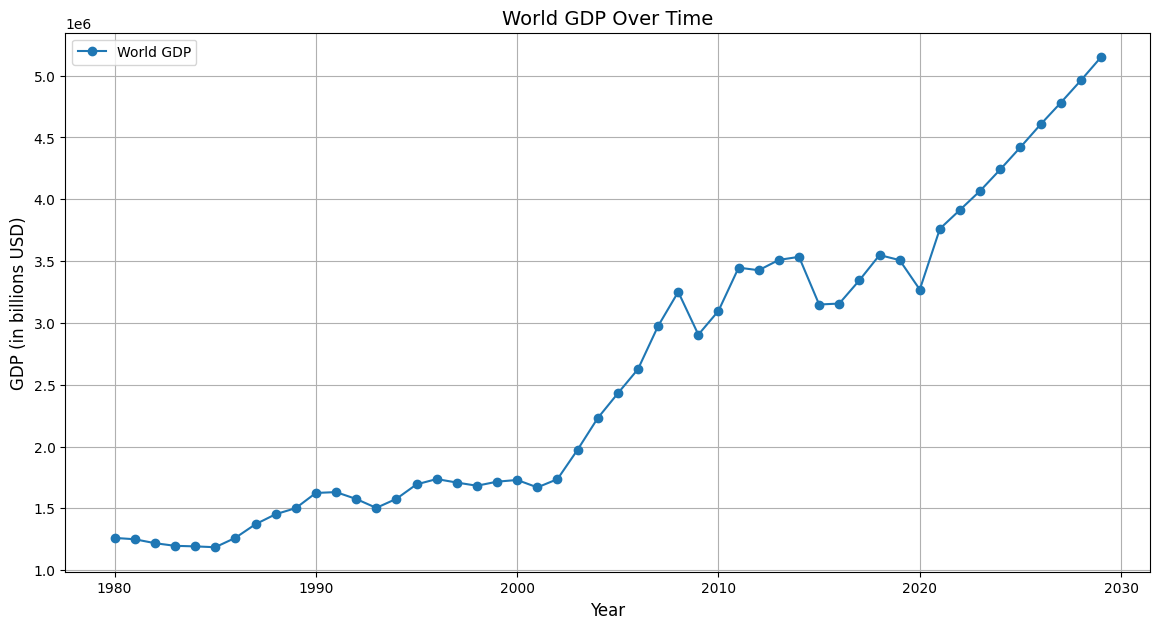

/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/2106178052.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


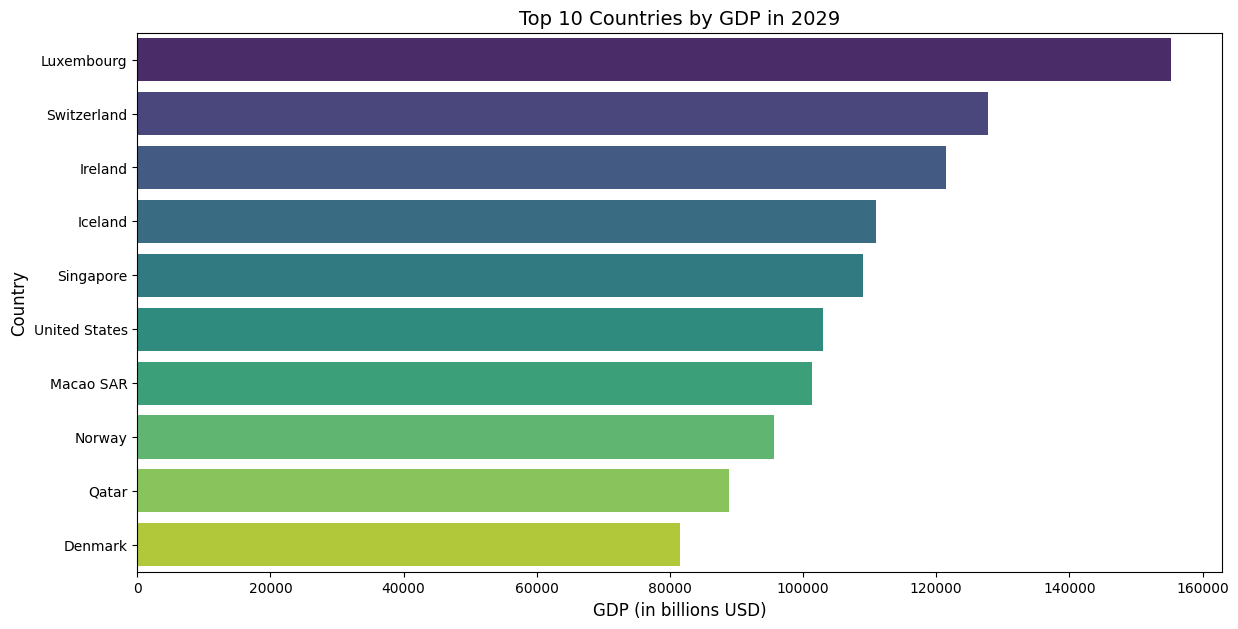

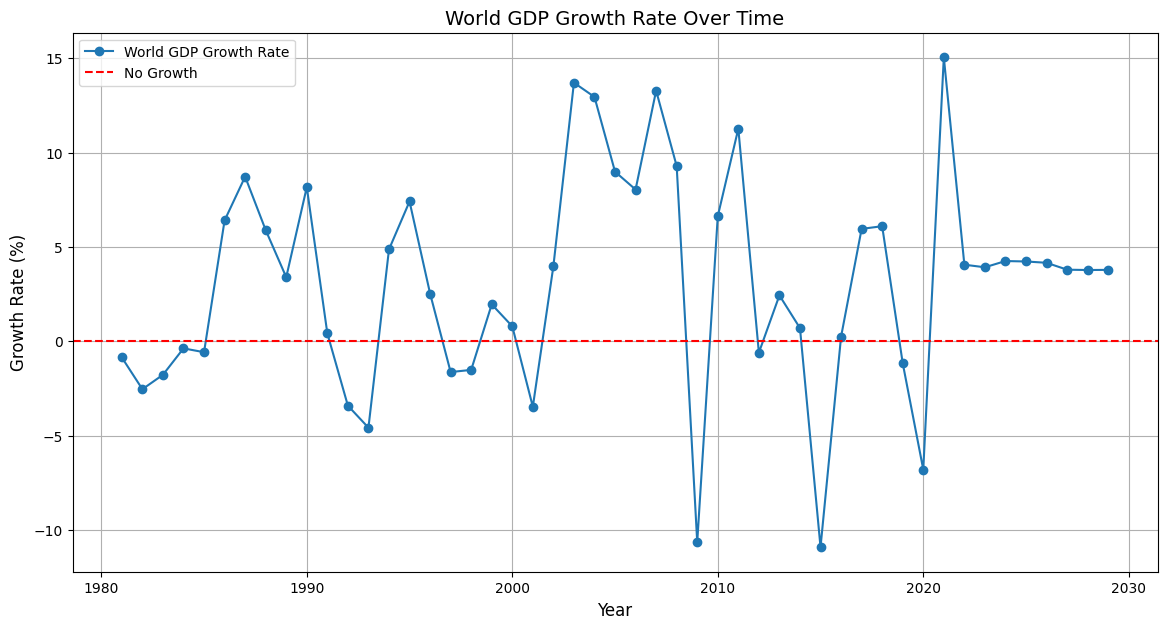

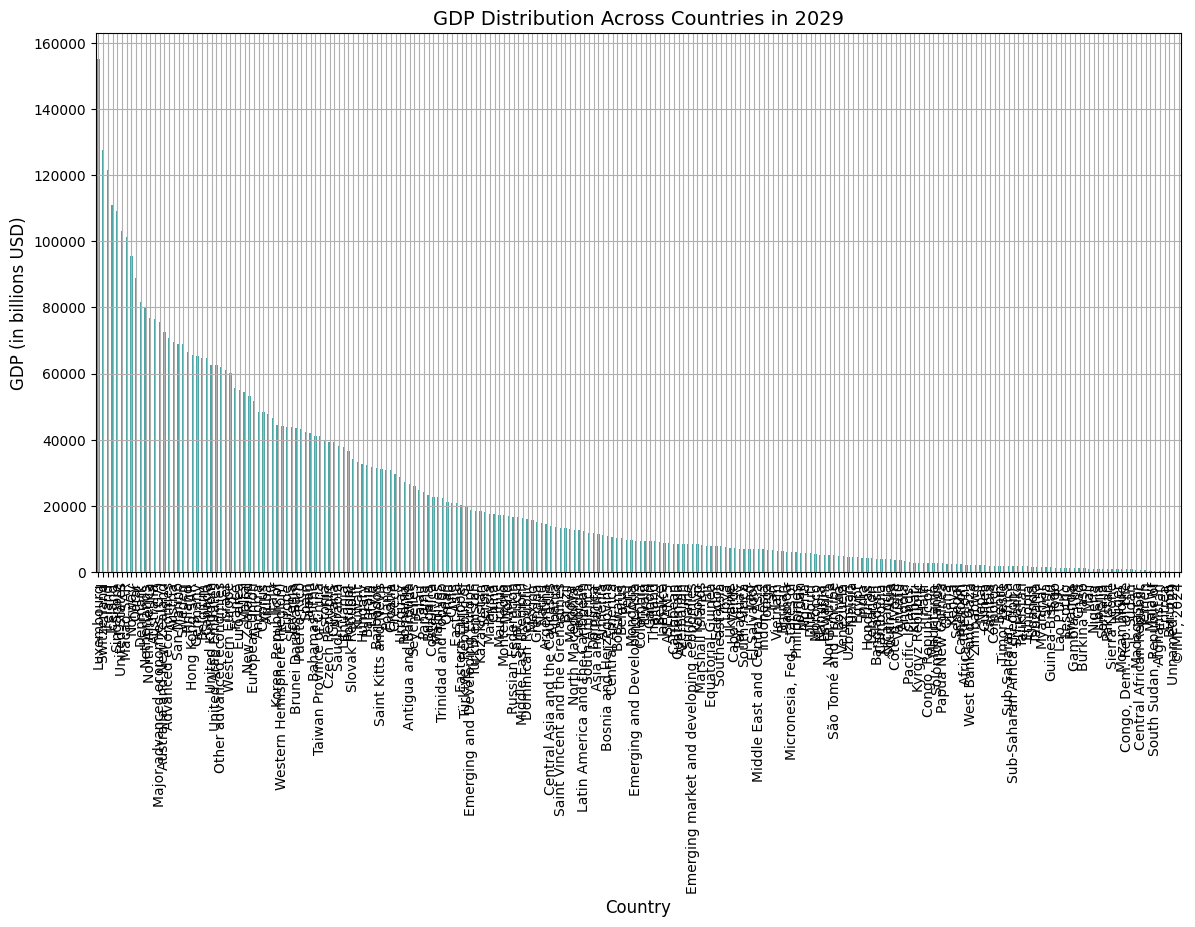

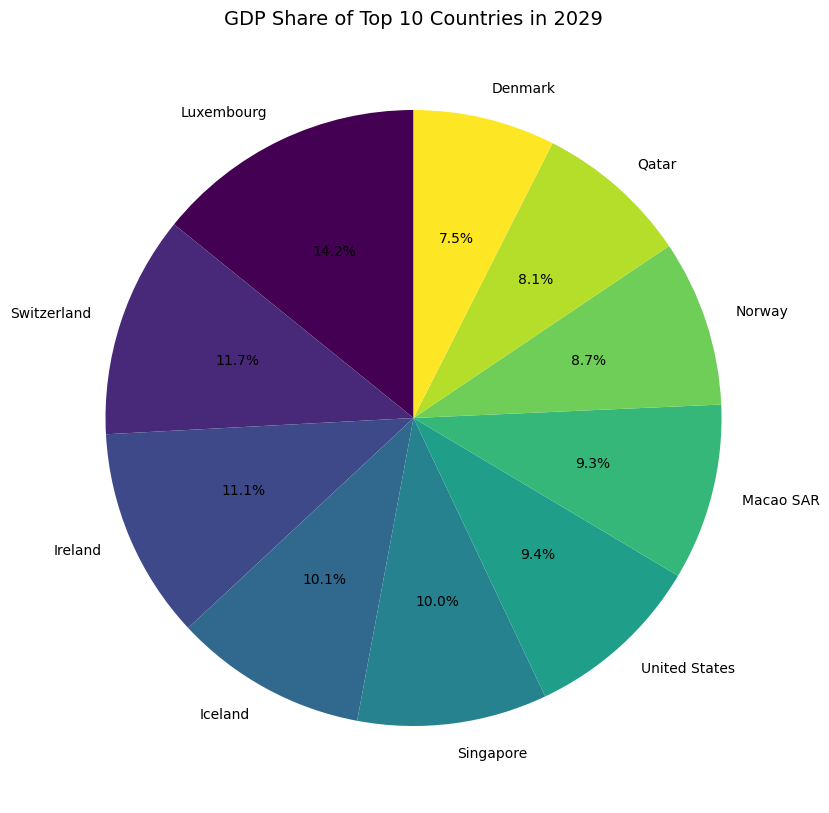

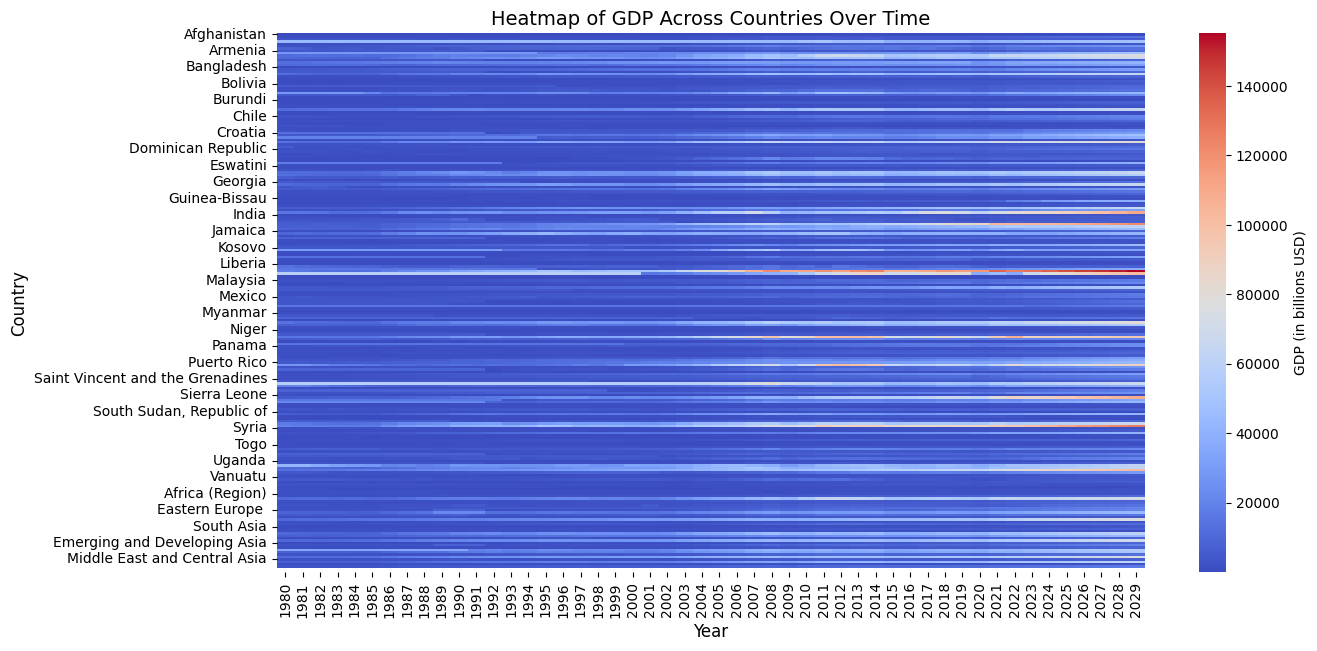

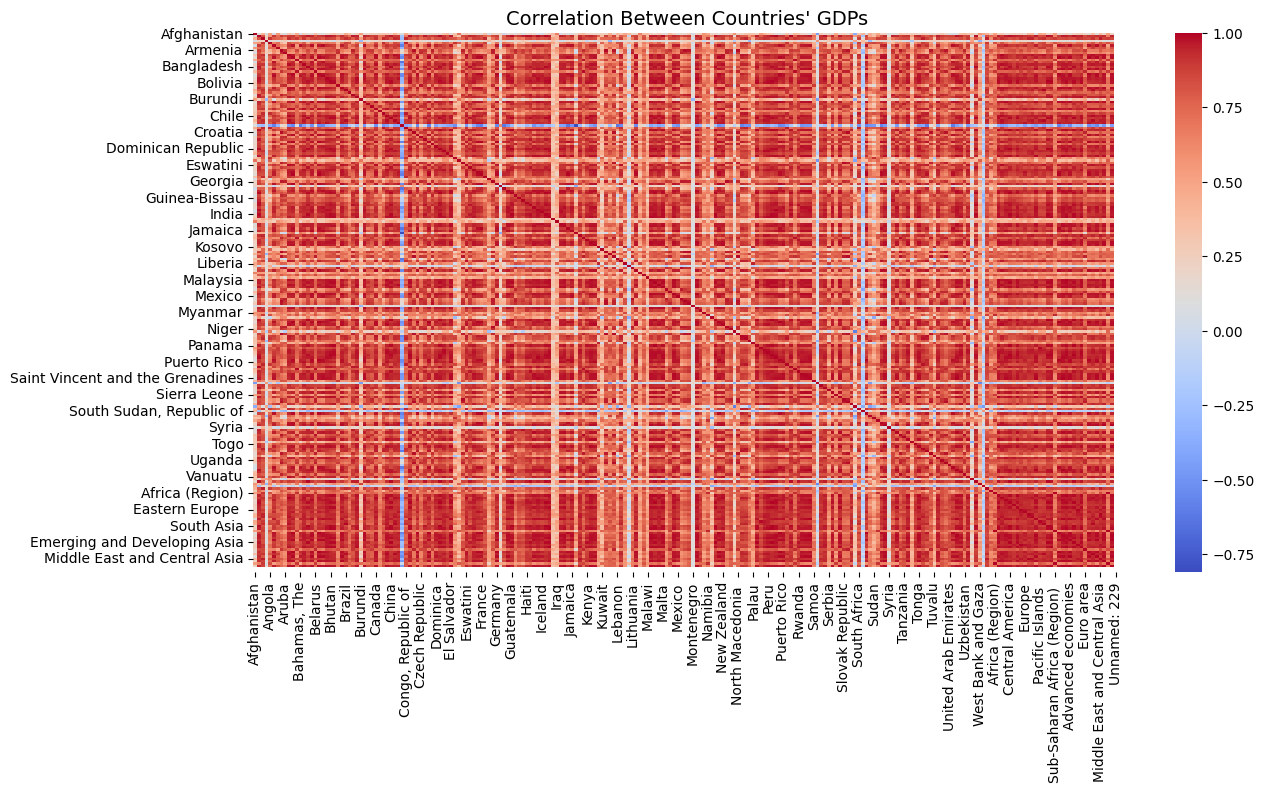

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Ensure 'Year' column exists and is clean
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

# Remove columns with completely missing data (this step is optional as we fill NaNs below)
# data = data.dropna(axis=1, how='all')  # You can comment out this line if you don't want to drop any columns

# Convert all values to numeric, handling missing data
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of the respective columns (countries)
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Confirm the data cleaning process
print("Data cleaned successfully. Sample data:")
print(data.head())

# Visualization 1: Aggregate GDP of all countries over time
world_gdp = data.sum(axis=1)
plt.figure(figsize=(14, 7))
plt.plot(world_gdp.index, world_gdp, label='World GDP', marker='o')
plt.title('World GDP Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Visualization 2: Top 10 countries contributing to global GDP in the most recent year
latest_year = data.index.max()
top_countries = data.loc[latest_year].sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title(f'Top 10 Countries by GDP in {latest_year}', fontsize=14)
plt.xlabel('GDP (in billions USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Visualization 3: Annual percentage growth of world GDP
world_gdp_growth = world_gdp.pct_change() * 100
plt.figure(figsize=(14, 7))
plt.plot(world_gdp_growth.index, world_gdp_growth, label='World GDP Growth Rate', marker='o')
plt.axhline(0, color='red', linestyle='--', label='No Growth')
plt.title('World GDP Growth Rate Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Visualization 4: Distribution of GDP across countries (Bar Chart and Pie Chart)
plt.figure(figsize=(14, 7))
data.loc[latest_year].sort_values(ascending=False).plot(kind='bar', color='teal', alpha=0.7)
plt.title(f'GDP Distribution Across Countries in {latest_year}', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
data.loc[latest_year].sort_values(ascending=False).head(10).plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title(f'GDP Share of Top 10 Countries in {latest_year}', fontsize=14)
plt.ylabel('')
plt.show()

# Visualization 5: Heatmap of GDP over time
plt.figure(figsize=(14, 7))
sns.heatmap(data.transpose(), cmap='coolwarm', cbar_kws={'label': 'GDP (in billions USD)'})
plt.title('Heatmap of GDP Across Countries Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Visualization 6: Correlation matrix of GDPs
correlation_matrix = data.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Correlation Between Countries\' GDPs', fontsize=14)
plt.show()


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Ensure 'Year' column exists and is clean
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

# Convert all values to numeric, handling missing data
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of the respective columns (countries)
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Confirm the data cleaning process
print("Data cleaned successfully. Sample data:")
print(data.head())

# Feature scaling before applying ML algorithms (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.transpose())  # Transpose so that countries are rows

# Clustering with KMeans (let's say we want to cluster into 5 groups)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to the data
data_clustered = data.transpose()  # Revert the transpose to have countries as rows
data_clustered['Cluster'] = kmeans_labels

# Visualization 1: Clusters of countries based on GDP trends
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data_clustered['Cluster'], y=data_clustered.index, hue=data_clustered['Cluster'], palette='viridis')
plt.title('Clusters of Countries Based on GDP Trends', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Dimensionality Reduction using PCA for better visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Visualization 2: PCA plot of GDP data (2D)
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans_labels
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of GDP Trends (2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Visualization 3: PCA plot of GDP data (3D)
pca_3d = PCA(n_components=3)
pca_3d_components = pca_3d.fit_transform(data_scaled)
pca_3d_df = pd.DataFrame(pca_3d_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_3d_df['Cluster'] = kmeans_labels

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_df['PCA1'], pca_3d_df['PCA2'], pca_3d_df['PCA3'], c=pca_3d_df['Cluster'], cmap='viridis')
ax.set_title('PCA of GDP Trends (3D)', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


Data cleaned successfully. Sample data:
      Afghanistan  Albania   Algeria     Andorra    Angola  \
Year                                                         
1980   440.169045  728.359  2462.085  44288.2057  1055.339   
1981   440.169045  817.734  2502.130  44288.2057   961.721   
1982   440.169045  824.542  2446.588  44288.2057   936.935   
1983   440.169045  815.529  2514.256  44288.2057   951.500   
1984   440.169045  788.332  2640.191  44288.2057   982.624   

      Antigua and Barbuda  Argentina      Armenia         Aruba  Australia  \
Year                                                                         
1980             1935.022   8361.209  3691.341289  28082.536286  11007.874   
1981             2199.721   6671.428  3691.341289  28082.536286  12528.838   
1982             2479.206   3257.853  3691.341289  28082.536286  12235.188   
1983             2793.833   3962.735  3691.341289  28082.536286  11592.380   
1984             3259.644   4374.783  3691.341289  28082.

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Ensure 'Year' column exists and is clean
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

# Convert all values to numeric, handling missing data
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of the respective columns (countries)
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Confirm the data cleaning process
print("Data cleaned successfully. Sample data:")
print(data.head())

# Feature scaling before applying ML algorithms (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.transpose())  # Transpose so that countries are rows

# Clustering with KMeans (let's say we want to cluster into 5 groups)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to the data
data_clustered = data.transpose()  # Revert the transpose to have countries as rows
data_clustered['Cluster'] = kmeans_labels

# Visualization 1: Clusters of countries based on GDP trends
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data_clustered['Cluster'], y=data_clustered.index, hue=data_clustered['Cluster'], palette='viridis')
plt.title('Clusters of Countries Based on GDP Trends', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Dimensionality Reduction using PCA for better visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Visualization 2: PCA plot of GDP data (2D)
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans_labels
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of GDP Trends (2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Visualization 3: PCA plot of GDP data (3D)
pca_3d = PCA(n_components=3)
pca_3d_components = pca_3d.fit_transform(data_scaled)
pca_3d_df = pd.DataFrame(pca_3d_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_3d_df['Cluster'] = kmeans_labels

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_df['PCA1'], pca_3d_df['PCA2'], pca_3d_df['PCA3'], c=pca_3d_df['Cluster'], cmap='viridis')
ax.set_title('PCA of GDP Trends (3D)', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


Data cleaned successfully. Sample data:
      Afghanistan  Albania   Algeria     Andorra    Angola  \
Year                                                         
1980   440.169045  728.359  2462.085  44288.2057  1055.339   
1981   440.169045  817.734  2502.130  44288.2057   961.721   
1982   440.169045  824.542  2446.588  44288.2057   936.935   
1983   440.169045  815.529  2514.256  44288.2057   951.500   
1984   440.169045  788.332  2640.191  44288.2057   982.624   

      Antigua and Barbuda  Argentina      Armenia         Aruba  Australia  \
Year                                                                         
1980             1935.022   8361.209  3691.341289  28082.536286  11007.874   
1981             2199.721   6671.428  3691.341289  28082.536286  12528.838   
1982             2479.206   3257.853  3691.341289  28082.536286  12235.188   
1983             2793.833   3962.735  3691.341289  28082.536286  11592.380   
1984             3259.644   4374.783  3691.341289  28082.

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Convert all values to numeric, handling missing data
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of the respective columns (countries)
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Confirm the data cleaning process
print("Data cleaned successfully. Sample data:")
print(data.head())

# Feature scaling before applying ML algorithms (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.transpose())  # Transpose so that countries are rows

# Clustering with KMeans (let's say we want to cluster into 5 groups)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to the data
data_clustered = data.transpose()  # Revert the transpose to have countries as rows
data_clustered['Cluster'] = kmeans_labels

# Visualization 1: Clusters of countries based on GDP trends
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data_clustered['Cluster'], y=data_clustered.index, hue=data_clustered['Cluster'], palette='viridis')
plt.title('Clusters of Countries Based on GDP Trends', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Dimensionality Reduction using PCA for better visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Visualization 2: PCA plot of GDP data (2D)
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans_labels
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of GDP Trends (2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Visualization 3: PCA plot of GDP data (3D)
pca_3d = PCA(n_components=3)
pca_3d_components = pca_3d.fit_transform(data_scaled)
pca_3d_df = pd.DataFrame(pca_3d_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_3d_df['Cluster'] = kmeans_labels

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_df['PCA1'], pca_3d_df['PCA2'], pca_3d_df['PCA3'], c=pca_3d_df['Cluster'], cmap='viridis')
ax.set_title('PCA of GDP Trends (3D)', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


Data cleaned successfully. Sample data:
   Year  Afghanistan  Albania   Algeria     Andorra    Angola  \
0  1980   440.169045  728.359  2462.085  44288.2057  1055.339   
1  1981   440.169045  817.734  2502.130  44288.2057   961.721   
2  1982   440.169045  824.542  2446.588  44288.2057   936.935   
3  1983   440.169045  815.529  2514.256  44288.2057   951.500   
4  1984   440.169045  788.332  2640.191  44288.2057   982.624   

   Antigua and Barbuda  Argentina      Armenia         Aruba  ...  \
0             1935.022   8361.209  3691.341289  28082.536286  ...   
1             2199.721   6671.428  3691.341289  28082.536286  ...   
2             2479.206   3257.853  3691.341289  28082.536286  ...   
3             2793.833   3962.735  3691.341289  28082.536286  ...   
4             3259.644   4374.783  3691.341289  28082.536286  ...   

      Euro area  European Union  Latin America and the Caribbean  \
0  34726.285385        8542.893                         2557.078   
1  34726.285385   

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer  # Importing SimpleImputer

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Ensure 'Year' column exists and is clean
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

# Convert all values to numeric, handling missing data
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of the respective columns (countries)
# Ensuring there are no NaNs after this step
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Check if there are any NaN values remaining
print("Checking for any remaining NaN values:")
print(data.isna().sum())

# If NaNs are still present, we can apply SimpleImputer (this ensures no NaN values for KMeans)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data.transpose())  # Transpose so that countries are rows
data_imputed = pd.DataFrame(data_imputed, columns=data.columns, index=data.index)

# Confirm the data cleaning process
print("Data cleaned and imputed successfully. Sample data:")
print(data_imputed.head())

# Feature scaling before applying ML algorithms (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed.transpose())  # Transpose so that countries are rows

# Clustering with KMeans (let's say we want to cluster into 5 groups)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to the data
data_clustered = data_imputed.transpose()  # Revert the transpose to have countries as rows
data_clustered['Cluster'] = kmeans_labels

# Visualization 1: Clusters of countries based on GDP trends
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data_clustered['Cluster'], y=data_clustered.index, hue=data_clustered['Cluster'], palette='viridis')
plt.title('Clusters of Countries Based on GDP Trends', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Dimensionality Reduction using PCA for better visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Visualization 2: PCA plot of GDP data (2D)
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans_labels
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of GDP Trends (2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Visualization 3: PCA plot of GDP data (3D)
pca_3d = PCA(n_components=3)
pca_3d_components = pca_3d.fit_transform(data_scaled)
pca_3d_df = pd.DataFrame(pca_3d_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_3d_df['Cluster'] = kmeans_labels

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_df['PCA1'], pca_3d_df['PCA2'], pca_3d_df['PCA3'], c=pca_3d_df['Cluster'], cmap='viridis')
ax.set_title('PCA of GDP Trends (3D)', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


Checking for any remaining NaN values:
Afghanistan                  0
Albania                      0
Algeria                      0
Andorra                      0
Angola                       0
                            ..
Other advanced economies     0
Sub-Saharan Africa           0
World                        0
Unnamed: 229                50
©IMF, 2024                  50
Length: 230, dtype: int64


ValueError: Shape of passed values is (230, 50), indices imply (50, 230)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer  # Importing SimpleImputer

# Load the dataset
file_path = 'Final.csv'
data = pd.read_csv(file_path)

# Ensure 'Year' column exists and is clean
if 'Year' in data.columns:
    data = data.dropna(subset=['Year'])  # Remove rows with missing 'Year'
    data['Year'] = data['Year'].astype(int)  # Ensure 'Year' is an integer
    data = data.set_index('Year')
else:
    print("Error: 'Year' column not found in the dataset.")

# Convert all values to numeric, handling missing data
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of the respective columns (countries)
# Ensuring there are no NaNs after this step
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Check if there are any NaN values remaining
print("Checking for any remaining NaN values:")
print(data.isna().sum())

# Feature scaling before applying ML algorithms (important for clustering)
# Transpose the data to ensure countries are rows
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.transpose())  # Transpose so that countries are rows
data_scaled = pd.DataFrame(data_scaled, columns=data.index, index=data.columns)

# Clustering with KMeans (let's say we want to cluster into 5 groups)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to the data
data_clustered = data.transpose()  # Revert the transpose to have countries as rows
data_clustered['Cluster'] = kmeans_labels

# Visualization 1: Clusters of countries based on GDP trends
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data_clustered['Cluster'], y=data_clustered.index, hue=data_clustered['Cluster'], palette='viridis')
plt.title('Clusters of Countries Based on GDP Trends', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Dimensionality Reduction using PCA for better visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Visualization 2: PCA plot of GDP data (2D)
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans_labels
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of GDP Trends (2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Visualization 3: PCA plot of GDP data (3D)
pca_3d = PCA(n_components=3)
pca_3d_components = pca_3d.fit_transform(data_scaled)
pca_3d_df = pd.DataFrame(pca_3d_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_3d_df['Cluster'] = kmeans_labels

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_df['PCA1'], pca_3d_df['PCA2'], pca_3d_df['PCA3'], c=pca_3d_df['Cluster'], cmap='viridis')
ax.set_title('PCA of GDP Trends (3D)', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


Checking for any remaining NaN values:
Afghanistan                  0
Albania                      0
Algeria                      0
Andorra                      0
Angola                       0
                            ..
Other advanced economies     0
Sub-Saharan Africa           0
World                        0
Unnamed: 229                50
©IMF, 2024                  50
Length: 230, dtype: int64


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

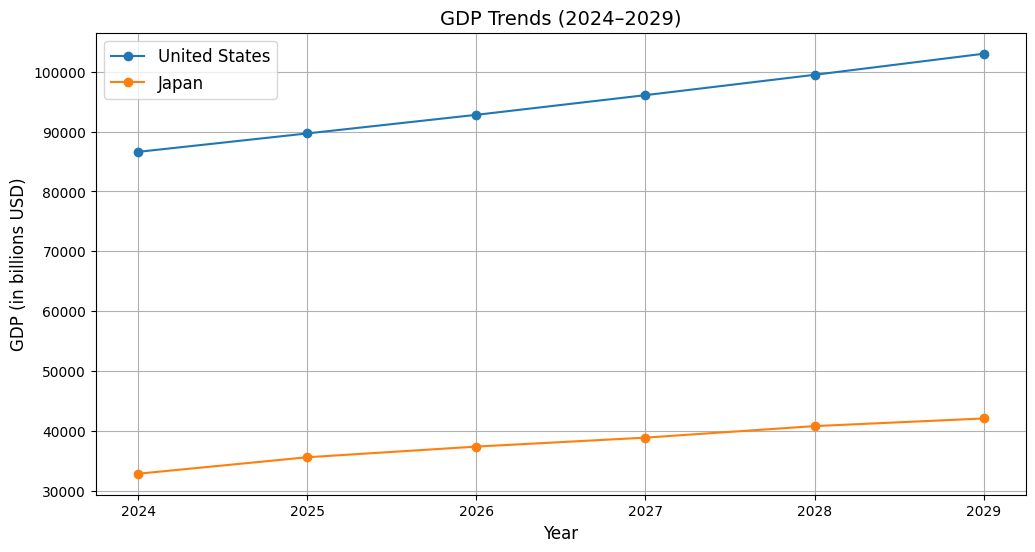

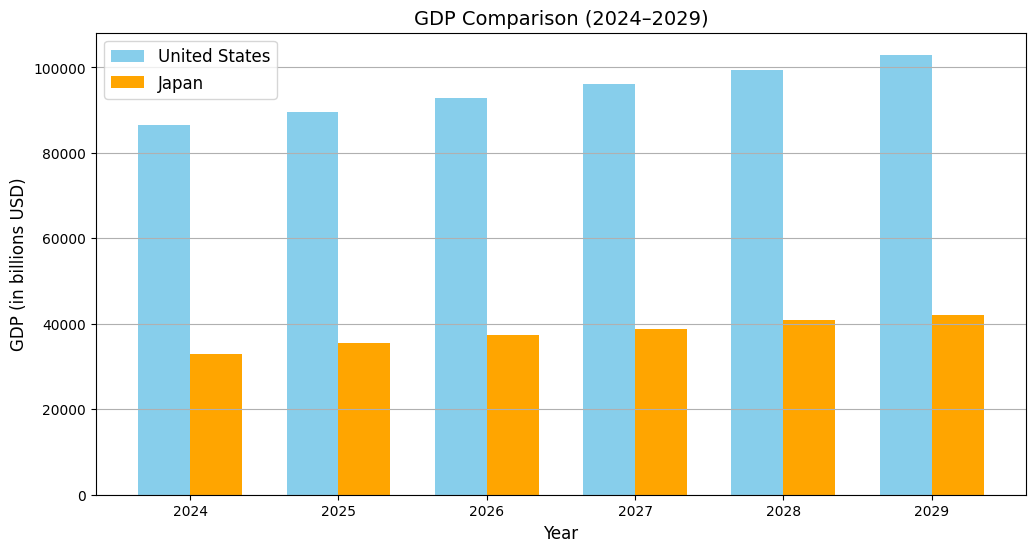

/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/112355182.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['USA_Percent_Change'] = filtered_data['United States'].pct_change() * 100
/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/112355182.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Japan_Percent_Change'] = filtered_data['Japan'].pct_change() * 100


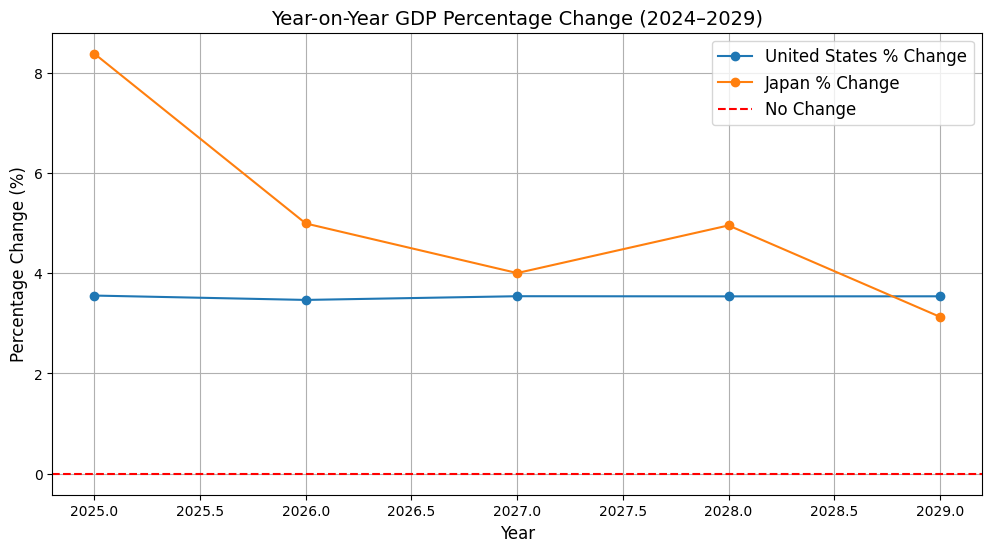

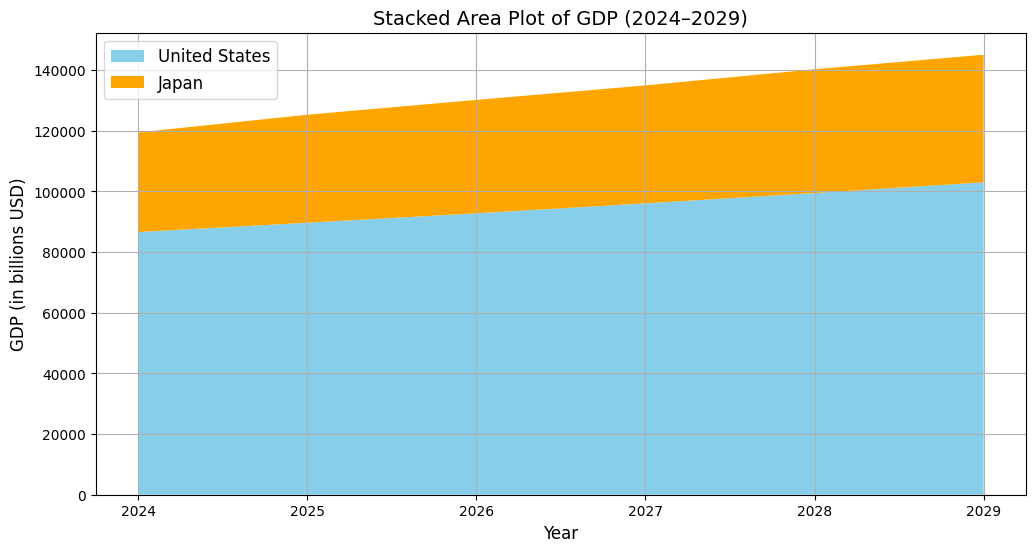

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean data
file_path = 'Final.csv'
data = pd.read_csv(file_path)
data.replace('no data', None, inplace=True)
data = data[['Year', 'United States', 'Japan']].dropna()
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Year'] = data['Year'].astype(int)
data = data.dropna()

# Filter data for 2024–2029
filtered_data = data[(data['Year'] >= 2024) & (data['Year'] <= 2029)]

# Line Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Year'], filtered_data['United States'], label='United States', marker='o')
plt.plot(filtered_data['Year'], filtered_data['Japan'], label='Japan', marker='o')
plt.title('GDP Trends (2024–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Bar Chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(filtered_data['Year']))
plt.bar(indices, filtered_data['United States'], bar_width, label='United States', color='skyblue')
plt.bar(indices + bar_width, filtered_data['Japan'], bar_width, label='Japan', color='orange')
plt.xticks(indices + bar_width / 2, filtered_data['Year'])
plt.title('GDP Comparison (2024–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.show()

# Percentage Change Plot
filtered_data['USA_Percent_Change'] = filtered_data['United States'].pct_change() * 100
filtered_data['Japan_Percent_Change'] = filtered_data['Japan'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Year'], filtered_data['USA_Percent_Change'], label='United States % Change', marker='o')
plt.plot(filtered_data['Year'], filtered_data['Japan_Percent_Change'], label='Japan % Change', marker='o')
plt.axhline(0, color='red', linestyle='--', label='No Change')
plt.title('Year-on-Year GDP Percentage Change (2024–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Stacked Area Plot
plt.figure(figsize=(12, 6))
plt.stackplot(filtered_data['Year'], filtered_data['United States'], filtered_data['Japan'],
              labels=['United States', 'Japan'], colors=['skyblue', 'orange'])
plt.title('Stacked Area Plot of GDP (2024–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


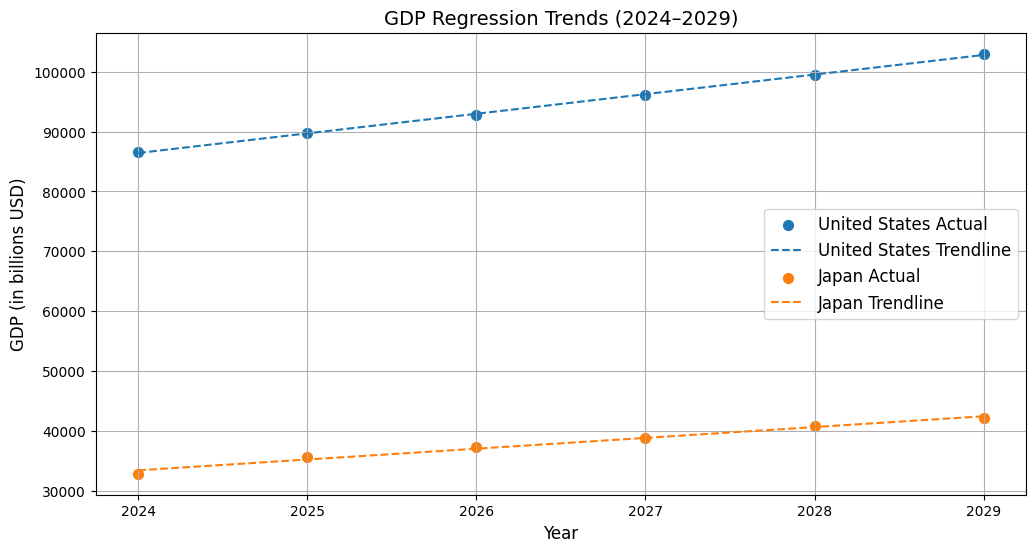

/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/4013054979.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['USA_Percent_Change'] = filtered_data['United States'].pct_change() * 100
/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/4013054979.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Japan_Percent_Change'] = filtered_data['Japan'].pct_change() * 100


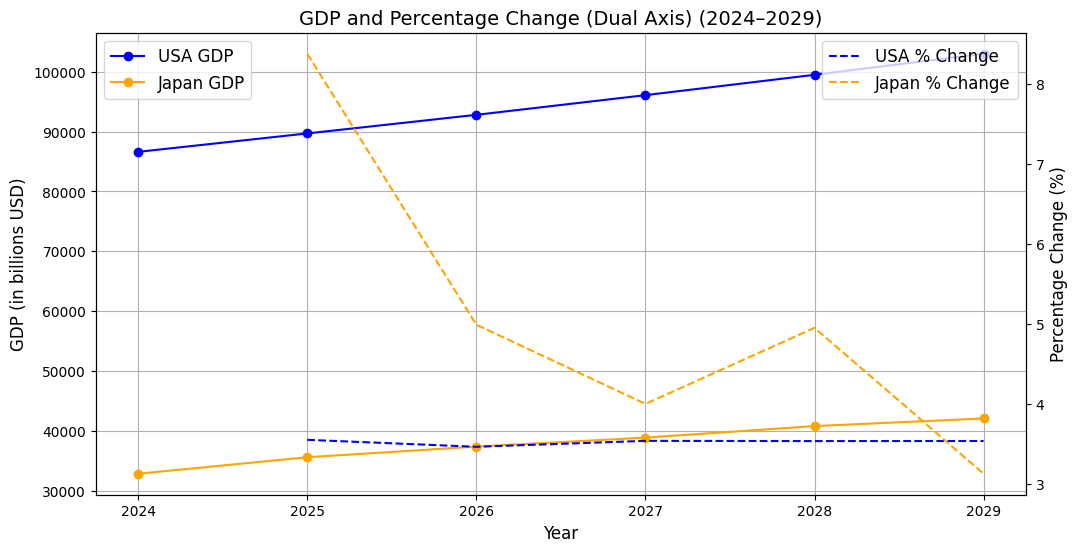

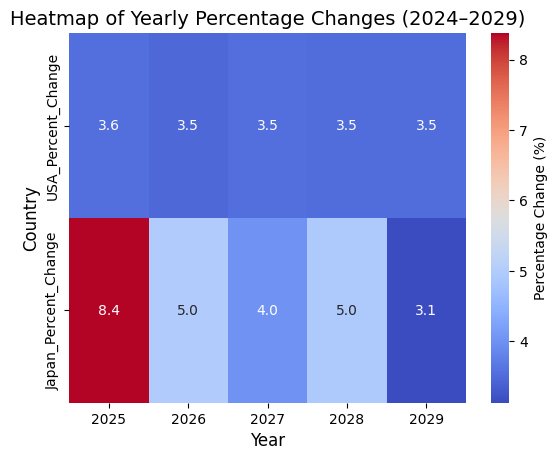

/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/4013054979.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['USA_Proportion'] = filtered_data['United States'] / (filtered_data['United States'] + filtered_data['Japan'])
/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/4013054979.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Japan_Proportion'] = filtered_data['Japan'] / (filtered_data['United States'] + filtered_data['Japan'])


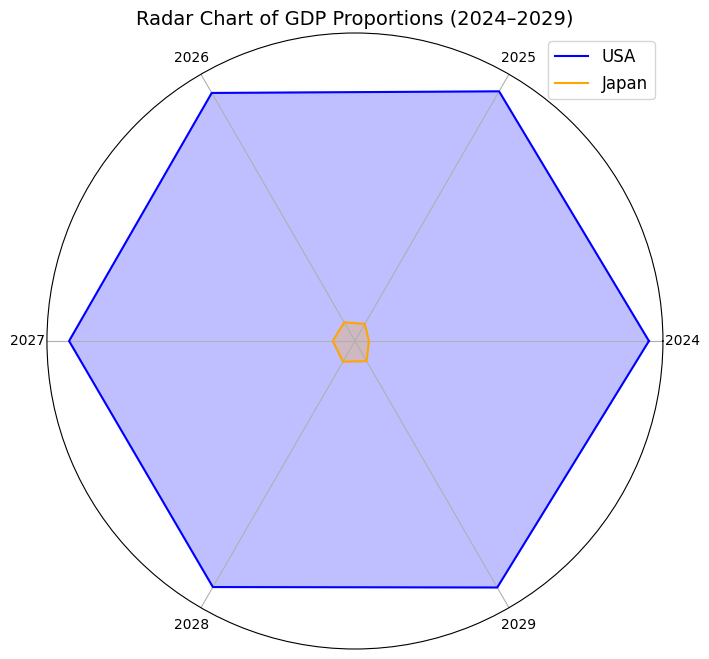

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load and clean data
file_path = 'Final.csv'
data = pd.read_csv(file_path)
data.replace('no data', None, inplace=True)
data = data[['Year', 'United States', 'Japan']].dropna()
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Year'] = data['Year'].astype(int)
data = data.dropna()

# Filter data for 2024–2029
filtered_data = data[(data['Year'] >= 2024) & (data['Year'] <= 2029)]

# 1. Regression Trends with Scatter Plot
plt.figure(figsize=(12, 6))
for country in ['United States', 'Japan']:
    X = filtered_data['Year'].values.reshape(-1, 1)
    y = filtered_data[country].values
    lr = LinearRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)
    plt.scatter(filtered_data['Year'], filtered_data[country], label=f'{country} Actual', s=50)
    plt.plot(filtered_data['Year'], y_pred, label=f'{country} Trendline', linestyle='--')
plt.title('GDP Regression Trends (2024–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 2. Dual-Axis Line Chart (GDP and Percentage Change)
filtered_data['USA_Percent_Change'] = filtered_data['United States'].pct_change() * 100
filtered_data['Japan_Percent_Change'] = filtered_data['Japan'].pct_change() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(filtered_data['Year'], filtered_data['United States'], label='USA GDP', color='blue', marker='o')
ax1.plot(filtered_data['Year'], filtered_data['Japan'], label='Japan GDP', color='orange', marker='o')
ax2.plot(filtered_data['Year'], filtered_data['USA_Percent_Change'], label='USA % Change', color='blue', linestyle='--')
ax2.plot(filtered_data['Year'], filtered_data['Japan_Percent_Change'], label='Japan % Change', color='orange', linestyle='--')

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('GDP (in billions USD)', fontsize=12)
ax2.set_ylabel('Percentage Change (%)', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
ax1.grid(True)
plt.title('GDP and Percentage Change (Dual Axis) (2024–2029)', fontsize=14)
plt.show()

# 3. Heatmap of Yearly Percentage Changes
percentage_change_data = filtered_data[['Year', 'USA_Percent_Change', 'Japan_Percent_Change']].dropna()
percentage_change_data.set_index('Year', inplace=True)
sns.heatmap(percentage_change_data.T, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Percentage Change (%)'})
plt.title('Heatmap of Yearly Percentage Changes (2024–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# 4. Radar Chart for GDP Proportions
from math import pi

filtered_data['USA_Proportion'] = filtered_data['United States'] / (filtered_data['United States'] + filtered_data['Japan'])
filtered_data['Japan_Proportion'] = filtered_data['Japan'] / (filtered_data['United States'] + filtered_data['Japan'])

angles = np.linspace(0, 2 * np.pi, len(filtered_data['Year']), endpoint=False).tolist()
angles += angles[:1]

radar_data = pd.DataFrame({
    'USA': filtered_data['USA_Proportion'].tolist() + [filtered_data['USA_Proportion'].iloc[0]],
    'Japan': filtered_data['Japan_Proportion'].tolist() + [filtered_data['Japan_Proportion'].iloc[0]]
})

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.plot(angles, radar_data['USA'], label='USA', color='blue')
ax.fill(angles, radar_data['USA'], color='blue', alpha=0.25)
ax.plot(angles, radar_data['Japan'], label='Japan', color='orange')
ax.fill(angles, radar_data['Japan'], color='orange', alpha=0.25)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(filtered_data['Year'])
plt.title('Radar Chart of GDP Proportions (2024–2029)', fontsize=14)
plt.legend(fontsize=12)
plt.show()


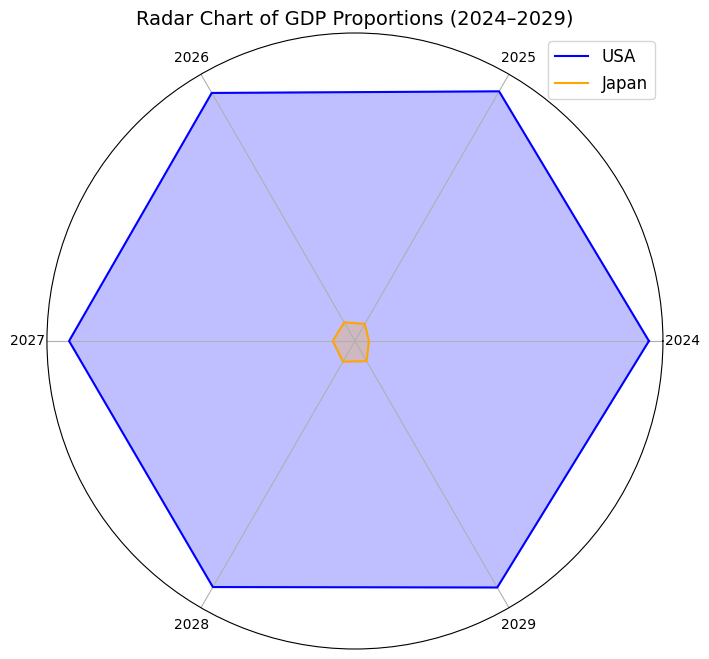

In [68]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.plot(angles, radar_data['USA'], label='USA', color='blue')
ax.fill(angles, radar_data['USA'], color='blue', alpha=0.25)
ax.plot(angles, radar_data['Japan'], label='Japan', color='orange')
ax.fill(angles, radar_data['Japan'], color='orange', alpha=0.25)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(filtered_data['Year'])
plt.title('Radar Chart of GDP Proportions (2024–2029)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

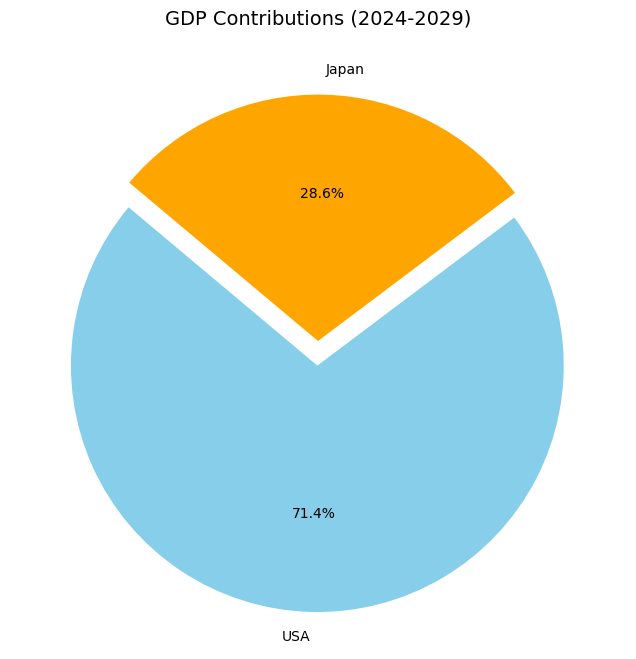

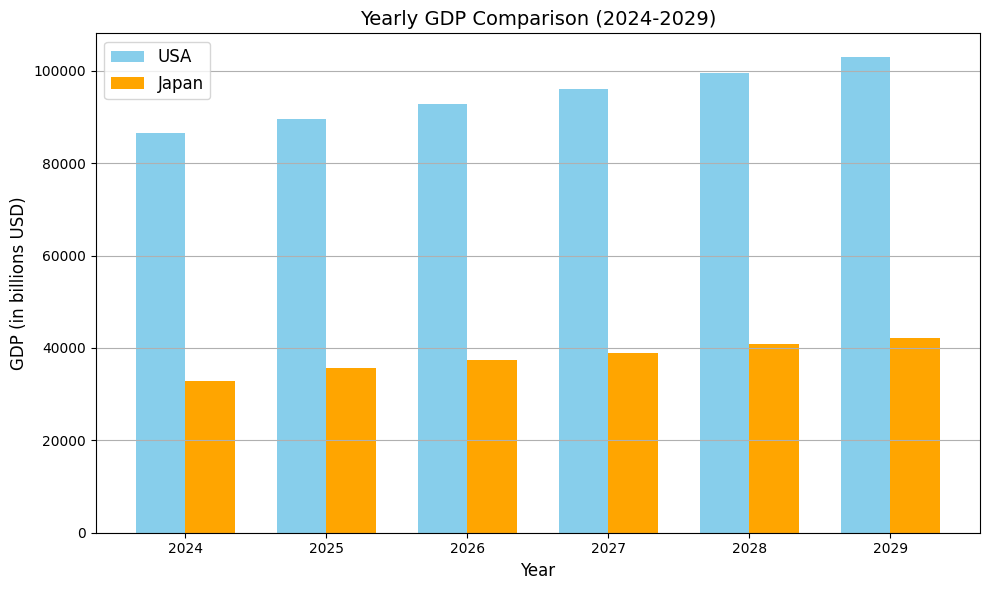

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Final.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)
data.replace('no data', None, inplace=True)
data = data[['Year', 'United States', 'Japan']].dropna()
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Year'] = data['Year'].astype(int)
data = data.dropna()

# Filter for the years 2024 to 2029
data_filtered = data[(data['Year'] >= 2024) & (data['Year'] <= 2029)]

# Pie Chart for GDP contributions in the period 2024-2029
total_gdp_usa = data_filtered['United States'].sum()
total_gdp_japan = data_filtered['Japan'].sum()
gdp_values = [total_gdp_usa, total_gdp_japan]
labels = ['USA', 'Japan']
colors = ['skyblue', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(gdp_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title('GDP Contributions (2024-2029)', fontsize=14)
plt.show()

# Bar Chart for yearly GDP (2024-2029)
plt.figure(figsize=(10, 6))
bar_width = 0.35
years = data_filtered['Year']
index = range(len(years))

plt.bar(index, data_filtered['United States'], bar_width, label='USA', color='skyblue')
plt.bar([i + bar_width for i in index], data_filtered['Japan'], bar_width, label='Japan', color='orange')

plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.title('Yearly GDP Comparison (2024-2029)', fontsize=14)
plt.xticks([i + bar_width/2 for i in index], years)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


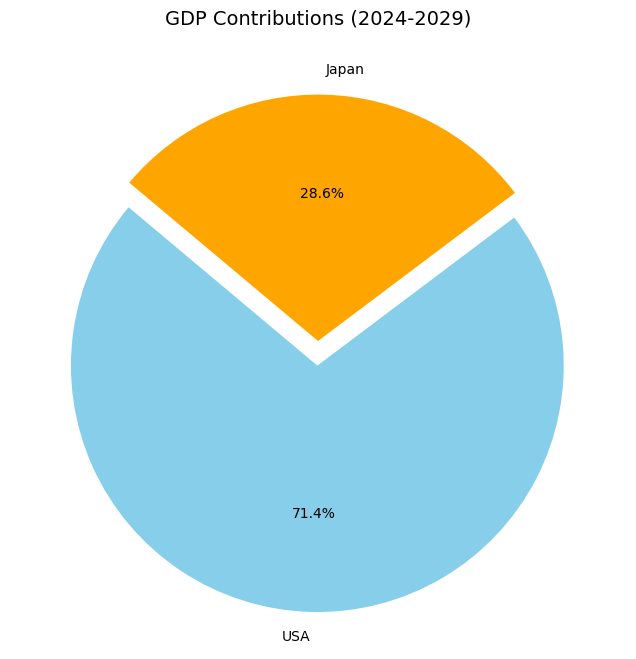

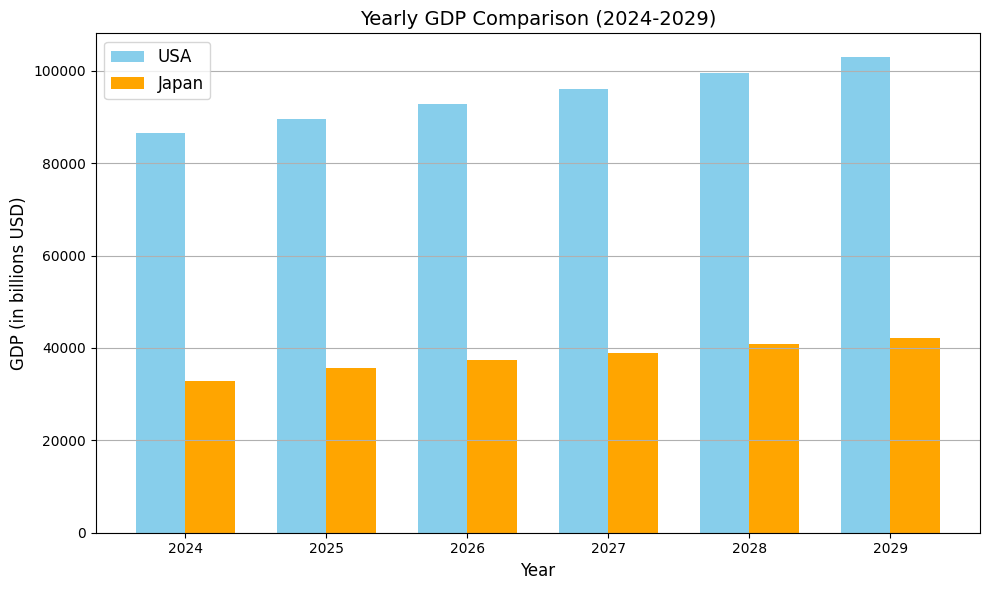

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Final.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)
data.replace('no data', None, inplace=True)
data = data[['Year', 'United States', 'Japan']].dropna()
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Year'] = data['Year'].astype(int)
data = data.dropna()

# Filter for the years 2024 to 2029
data_filtered = data[(data['Year'] >= 2024) & (data['Year'] <= 2029)]

# Pie Chart for GDP contributions in the period 2024-2029
total_gdp_usa = data_filtered['United States'].sum()
total_gdp_japan = data_filtered['Japan'].sum()
gdp_values = [total_gdp_usa, total_gdp_japan]
labels = ['USA', 'Japan']
colors = ['skyblue', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(gdp_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title('GDP Contributions (2024-2029)', fontsize=14)
plt.show()

# Bar Chart for yearly GDP (2024-2029)
plt.figure(figsize=(10, 6))
bar_width = 0.35
years = data_filtered['Year']
index = range(len(years))

plt.bar(index, data_filtered['United States'], bar_width, label='USA', color='skyblue')
plt.bar([i + bar_width for i in index], data_filtered['Japan'], bar_width, label='Japan', color='orange')

plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.title('Yearly GDP Comparison (2024-2029)', fontsize=14)
plt.xticks([i + bar_width/2 for i in index], years)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

# Load and clean data
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Filter data for USA and Japan
countries = ['United States', 'Japan']
data = data[data['Country Name'].isin(countries)]

# Transpose and clean data
data = data.set_index(['Country Name', 'Indicator Name']).T
data = data.reset_index().rename(columns={'index': 'Year'})
data = data.dropna()
data['Year'] = data['Year'].astype(int)

# Separate data for USA and Japan
usa_data = data.loc[:, ['Year'] + [col for col in data.columns if 'United States' in col]]
japan_data = data.loc[:, ['Year'] + [col for col in data.columns if 'Japan' in col]]

# Helper function to fit and predict using ML models
def predict_with_models(country_data, country_name):
    predictions = {}
    future_years = np.arange(2024, 2030).reshape(-1, 1)

    for col in country_data.columns[1:]:
        y = country_data[col]
        X = country_data[['Year']]
        
        # Linear Regression
        lr = LinearRegression()
        lr.fit(X, y)
        predictions[f'{col}_Linear'] = lr.predict(future_years)
        
        # Polynomial Regression
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)
        lr_poly = LinearRegression()
        lr_poly.fit(X_poly, y)
        future_years_poly = poly.transform(future_years)
        predictions[f'{col}_Polynomial'] = lr_poly.predict(future_years_poly)
        
        # ARIMA
        arima_model = ARIMA(y, order=(1, 1, 0))
        arima_fit = arima_model.fit()
        predictions[f'{col}_ARIMA'] = arima_fit.forecast(steps=len(future_years)).values
        
        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X, y)
        predictions[f'{col}_RandomForest'] = rf.predict(future_years)
    
    return pd.DataFrame(predictions, index=future_years.flatten()).reset_index().rename(columns={'index': 'Year'})

# Predict for USA and Japan
usa_predictions = predict_with_models(usa_data, 'USA')
japan_predictions = predict_with_models(japan_data, 'Japan')

# Save predictions to CSV
usa_predictions.to_csv('usa_predictions.csv', index=False)
japan_predictions.to_csv('japan_predictions.csv', index=False)

# Print results
print("USA Predictions:")
print(usa_predictions)
print("\nJapan Predictions:")
print(japan_predictions)


KeyError: 'Country Name'

In [74]:
import pandas as pd

# Load the dataset
file_path = 'world_bank_development_indicators.csv'  # Path to your dataset
data = pd.read_csv(file_path)

# Filter rows for USA and Japan
filtered_data = data[data['country'].isin(['United States', 'Japan'])]

# Save filtered data to a new CSV file (optional)
filtered_data.to_csv('usa_japan_filtered.csv', index=False)

# Display the first few rows
print(filtered_data.head())


     country        date  agricultural_land%  forest_land%  land_area  \
7773   Japan  1960-01-01                 NaN           NaN        NaN   
7774   Japan  1961-01-01           19.389146           NaN   366700.0   
7775   Japan  1962-01-01           19.416417           NaN   366700.0   
7776   Japan  1963-01-01           19.143714           NaN   366700.0   
7777   Japan  1964-01-01           19.170984           NaN   366700.0   

      avg_precipitation  trade_in_services%  control_of_corruption_estimate  \
7773                NaN                 NaN                             NaN   
7774             1668.0                 NaN                             NaN   
7775             1668.0                 NaN                             NaN   
7776             1668.0                 NaN                             NaN   
7777             1668.0                 NaN                             NaN   

      control_of_corruption_std  access_to_electricity%  ...  \
7773                  

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'usa_japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract columns relevant to GDP and clean data
data = data[['country', 'date', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
             'GDP_current_US', 'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]

# Filter for USA and Japan
data = data[data['country'].isin(['United States', 'Japan'])]
data['date'] = pd.to_datetime(data['date'], format='%Y')

# Replace 'no data' with NaN and drop rows with missing values
data.replace('no data', np.nan, inplace=True)
data.dropna(inplace=True)

# Feature engineering: Extract year and other needed transformations
data['year'] = data['date'].dt.year

# Split the data into training (1980-2024) and test (2025-2029)
train_data = data[data['year'] <= 2024]
test_data = data[data['year'] > 2024]

# Separate features and targets
X_train = train_data[['year', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
                      'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]
y_train_usa = train_data[train_data['country'] == 'United States']['GDP_current_US']
y_train_japan = train_data[train_data['country'] == 'Japan']['GDP_current_US']

X_test = test_data[['year', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
                    'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression
lr.fit(X_train, y_train_usa)
pred_lr_usa = lr.predict(X_test)

lr.fit(X_train, y_train_japan)
pred_lr_japan = lr.predict(X_test)

# Fit Polynomial Regression
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
pred_poly_usa = lr_poly.predict(X_test_poly)

lr_poly.fit(X_train_poly, y_train_japan)
pred_poly_japan = lr_poly.predict(X_test_poly)

# Fit Random Forest Regression
rf.fit(X_train, y_train_usa)
pred_rf_usa = rf.predict(X_test)

rf.fit(X_train, y_train_japan)
pred_rf_japan = rf.predict(X_test)

# ARIMA for time series forecasting (example for USA)
arima_usa = ARIMA(y_train_usa, order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=len(test_data[test_data['country'] == 'United States']))

# ARIMA for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(test_data[test_data['country'] == 'Japan']))

# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Year': test_data['year'].unique(),
    'USA_LR': pred_lr_usa,
    'Japan_LR': pred_lr_japan,
    'USA_Poly': pred_poly_usa,
    'Japan_Poly': pred_poly_japan,
    'USA_RF': pred_rf_usa,
    'Japan_RF': pred_rf_japan,
    'USA_ARIMA': pred_arima_usa,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for comparison
plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['USA_LR'], label='USA Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_Poly'], label='USA Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_RF'], label='USA Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_ARIMA'], label='USA ARIMA', linestyle='--')
plt.title('USA GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for the next 5 years
print("Predictions for USA and Japan GDP from 2025 to 2029:")
print(predictions)



ValueError: unconverted data remains when parsing with format "%Y": "-01-01", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'usa_japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract columns relevant to GDP and clean data
data = data[['country', 'date', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
             'GDP_current_US', 'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]

# Filter for USA and Japan
data = data[data['country'].isin(['United States', 'Japan'])]

# Attempt to parse dates with a robust method
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # 'coerce' will set invalid dates as NaT

# Drop rows with invalid date values
data = data.dropna(subset=['date'])

# Feature engineering: Extract year and other needed transformations
data['year'] = data['date'].dt.year

# Split the data into training (1980-2024) and test (2025-2029)
train_data = data[data['year'] <= 2024]
test_data = data[data['year'] > 2024]

# Separate features and targets
X_train = train_data[['year', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
                      'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]
y_train_usa = train_data[train_data['country'] == 'United States']['GDP_current_US']
y_train_japan = train_data[train_data['country'] == 'Japan']['GDP_current_US']

X_test = test_data[['year', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
                    'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression
lr.fit(X_train, y_train_usa)
pred_lr_usa = lr.predict(X_test)

lr.fit(X_train, y_train_japan)
pred_lr_japan = lr.predict(X_test)

# Fit Polynomial Regression
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
pred_poly_usa = lr_poly.predict(X_test_poly)

lr_poly.fit(X_train_poly, y_train_japan)
pred_poly_japan = lr_poly.predict(X_test_poly)

# Fit Random Forest Regression
rf.fit(X_train, y_train_usa)
pred_rf_usa = rf.predict(X_test)

rf.fit(X_train, y_train_japan)
pred_rf_japan = rf.predict(X_test)

# ARIMA for time series forecasting (example for USA)
arima_usa = ARIMA(y_train_usa, order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=len(test_data[test_data['country'] == 'United States']))

# ARIMA for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(test_data[test_data['country'] == 'Japan']))

# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Year': test_data['year'].unique(),
    'USA_LR': pred_lr_usa,
    'Japan_LR': pred_lr_japan,
    'USA_Poly': pred_poly_usa,
    'Japan_Poly': pred_poly_japan,
    'USA_RF': pred_rf_usa,
    'Japan_RF': pred_rf_japan,
    'USA_ARIMA': pred_arima_usa,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for comparison
plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['USA_LR'], label='USA Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_Poly'], label='USA Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_RF'], label='USA Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_ARIMA'], label='USA ARIMA', linestyle='--')
plt.title('USA GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for the next 5 years
print("Predictions for USA and Japan GDP from 2025 to 2029:")
print(predictions)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'usa_japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract columns relevant to GDP and clean data
data = data[['country', 'date', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
             'GDP_current_US', 'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]

# Filter for USA and Japan
data = data[data['country'].isin(['United States', 'Japan'])]

# Attempt to parse dates with a robust method
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # 'coerce' will set invalid dates as NaT

# Drop rows with invalid date values
data = data.dropna(subset=['date'])

# Feature engineering: Extract year and other needed transformations
data['year'] = data['date'].dt.year

# Handle missing values using SimpleImputer (replace NaN with column median)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data[['tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
                                                       'GDP_current_US', 'central_goverment_debt%', 'expense%', 
                                                       'research_and_development_expenditure%']]))
data_imputed.columns = ['tax_revenue%', 'inflation_annual%', 'trade_in_services%', 'GDP_current_US', 
                        'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']
data_imputed['country'] = data['country']
data_imputed['date'] = data['date']
data_imputed['year'] = data['year']

# Split the data into training (1980-2024) and test (2025-2029)
train_data = data_imputed[data_imputed['year'] <= 2024]
test_data = data_imputed[data_imputed['year'] > 2024]

# Separate features and targets
X_train = train_data[['year', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
                      'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]
y_train_usa = train_data[train_data['country'] == 'United States']['GDP_current_US']
y_train_japan = train_data[train_data['country'] == 'Japan']['GDP_current_US']

X_test = test_data[['year', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
                    'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression
lr.fit(X_train, y_train_usa)
pred_lr_usa = lr.predict(X_test)

lr.fit(X_train, y_train_japan)
pred_lr_japan = lr.predict(X_test)

# Fit Polynomial Regression
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
pred_poly_usa = lr_poly.predict(X_test_poly)

lr_poly.fit(X_train_poly, y_train_japan)
pred_poly_japan = lr_poly.predict(X_test_poly)

# Fit Random Forest Regression
rf.fit(X_train, y_train_usa)
pred_rf_usa = rf.predict(X_test)

rf.fit(X_train, y_train_japan)
pred_rf_japan = rf.predict(X_test)

# ARIMA for time series forecasting (example for USA)
arima_usa = ARIMA(y_train_usa, order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=len(test_data[test_data['country'] == 'United States']))

# ARIMA for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(test_data[test_data['country'] == 'Japan']))

# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Year': test_data['year'].unique(),
    'USA_LR': pred_lr_usa,
    'Japan_LR': pred_lr_japan,
    'USA_Poly': pred_poly_usa,
    'Japan_Poly': pred_poly_japan,
    'USA_RF': pred_rf_usa,
    'Japan_RF': pred_rf_japan,
    'USA_ARIMA': pred_arima_usa,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for comparison
plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['USA_LR'], label='USA Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_Poly'], label='USA Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_RF'], label='USA Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_ARIMA'], label='USA ARIMA', linestyle='--')
plt.title('USA GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for the next 5 years
print("Predictions for USA and Japan GDP from 2025 to 2029:")
print(predictions)


ValueError: Found input variables with inconsistent numbers of samples: [128, 64]

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'usa_japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract columns relevant to GDP and clean data
data = data[['country', 'date', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
             'GDP_current_US', 'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]

# Filter for USA and Japan
data = data[data['country'].isin(['United States', 'Japan'])]

# Attempt to parse dates with a robust method
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # 'coerce' will set invalid dates as NaT

# Drop rows with invalid date values
data = data.dropna(subset=['date'])

# Feature engineering: Extract year and other needed transformations
data['year'] = data['date'].dt.year

# Handle missing values using SimpleImputer (replace NaN with column median)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data[['tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
                                                       'GDP_current_US', 'central_goverment_debt%', 'expense%', 
                                                       'research_and_development_expenditure%']]))
data_imputed.columns = ['tax_revenue%', 'inflation_annual%', 'trade_in_services%', 'GDP_current_US', 
                        'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']
data_imputed['country'] = data['country']
data_imputed['date'] = data['date']
data_imputed['year'] = data['year']

# Split the data into training (1980-2024) and test (2025-2029)
train_data = data_imputed[data_imputed['year'] <= 2024]
test_data = data_imputed[data_imputed['year'] > 2024]

# Separate features and targets
X_train = train_data[['year', 'tax_revenue%', 'inflation_annual%', 'trade_in_services%', 
                      'central_goverment_debt%', 'expense%', 'research_and_development_expenditure%']]

# For USA
y_train_usa = train_data[train_data['country'] == 'United States']['GDP_current_US']

# For Japan
y_train_japan = train_data[train_data['country'] == 'Japan']['GDP_current_US']

# Check the shapes of X_train and y_train for both countries
print("Shape of X_train for USA:", X_train[X_train['country'] == 'United States'].shape)
print("Shape of y_train_usa:", y_train_usa.shape)

print("Shape of X_train for Japan:", X_train[X_train['country'] == 'Japan'].shape)
print("Shape of y_train_japan:", y_train_japan.shape)

# Ensure that X_train and y_train have the same length for both countries
assert len(X_train[X_train['country'] == 'United States']) == len(y_train_usa), "Mismatch between X_train and y_train_usa lengths"
assert len(X_train[X_train['country'] == 'Japan']) == len(y_train_japan), "Mismatch between X_train and y_train_japan lengths"

# Ensure there are no NaN values in the data
assert X_train.isnull().sum().sum() == 0, "X_train contains NaN values"
assert y_train_usa.isnull().sum() == 0, "y_train_usa contains NaN values"
assert y_train_japan.isnull().sum() == 0, "y_train_japan contains NaN values"

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression
lr.fit(X_train, y_train_usa)
pred_lr_usa = lr.predict(X_test)

lr.fit(X_train, y_train_japan)
pred_lr_japan = lr.predict(X_test)

# Fit Polynomial Regression
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
pred_poly_usa = lr_poly.predict(X_test_poly)

lr_poly.fit(X_train_poly, y_train_japan)
pred_poly_japan = lr_poly.predict(X_test_poly)

# Fit Random Forest Regression
rf.fit(X_train, y_train_usa)
pred_rf_usa = rf.predict(X_test)

rf.fit(X_train, y_train_japan)
pred_rf_japan = rf.predict(X_test)

# ARIMA for time series forecasting (example for USA)
arima_usa = ARIMA(y_train_usa, order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=len(test_data[test_data['country'] == 'United States']))

# ARIMA for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(test_data[test_data['country'] == 'Japan']))

# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Year': test_data['year'].unique(),
    'USA_LR': pred_lr_usa,
    'Japan_LR': pred_lr_japan,
    'USA_Poly': pred_poly_usa,
    'Japan_Poly': pred_poly_japan,
    'USA_RF': pred_rf_usa,
    'Japan_RF': pred_rf_japan,
    'USA_ARIMA': pred_arima_usa,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for comparison
plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['USA_LR'], label='USA Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_Poly'], label='USA Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_RF'], label='USA Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_ARIMA'], label='USA ARIMA', linestyle='--')
plt.title('USA GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (2025–2029)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for the next 5 years
print("Predictions for USA and Japan GDP from 2025 to 2029:")
print(predictions)


KeyError: 'country'

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'usa_japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract only the relevant columns for trade_in_services and clean data
data = data[['country', 'date', 'trade_in_services%', 'GDP_current_US']]

# Filter for USA and Japan
data = data[data['country'].isin(['United States', 'Japan'])]
data['date'] = pd.to_datetime(data['date'], format='%Y')

# Replace 'no data' with NaN and drop rows with missing values
data.replace('no data', np.nan, inplace=True)
data.dropna(inplace=True)

# Feature engineering: Extract year
data['year'] = data['date'].dt.year

# Split the data into training (1980-2024) and test (2025-2029)
train_data = data[data['year'] <= 2024]
test_data = data[data['year'] > 2024]

# Separate features and targets
X_train = train_data[['year', 'trade_in_services%']]
y_train_usa = train_data[train_data['country'] == 'United States']['GDP_current_US']
y_train_japan = train_data[train_data['country'] == 'Japan']['GDP_current_US']

X_test = test_data[['year', 'trade_in_services%']]

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression
lr.fit(X_train, y_train_usa)
pred_lr_usa = lr.predict(X_test)

lr.fit(X_train, y_train_japan)
pred_lr_japan = lr.predict(X_test)

# Fit Polynomial Regression
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
pred_poly_usa = lr_poly.predict(X_test_poly)

lr_poly.fit(X_train_poly, y_train_japan)
pred_poly_japan = lr_poly.predict(X_test_poly)

# Fit Random Forest Regression
rf.fit(X_train, y_train_usa)
pred_rf_usa = rf.predict(X_test)

rf.fit(X_train, y_train_japan)
pred_rf_japan = rf.predict(X_test)

# ARIMA for time series forecasting (example for USA)
arima_usa = ARIMA(y_train_usa, order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=len(test_data[test_data['country'] == 'United States']))

# ARIMA for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(test_data[test_data['country'] == 'Japan']))

# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Year': test_data['year'].unique(),
    'USA_LR': pred_lr_usa,
    'Japan_LR': pred_lr_japan,
    'USA_Poly': pred_poly_usa,
    'Japan_Poly': pred_poly_japan,
    'USA_RF': pred_rf_usa,
    'Japan_RF': pred_rf_japan,
    'USA_ARIMA': pred_arima_usa,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for comparison
plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['USA_LR'], label='USA Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_Poly'], label='USA Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_RF'], label='USA Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_ARIMA'], label='USA ARIMA', linestyle='--')
plt.title('USA GDP Predictions (2025–2029) for Trade in Services', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (2025–2029) for Trade in Services', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for the next 5 years
print("Predictions for USA and Japan GDP from 2025 to 2029 for Trade in Services:")
print(predictions)


ValueError: unconverted data remains when parsing with format "%Y": "-01-01", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'usa_japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract only the relevant columns for trade_in_services and clean data
data = data[['country', 'date', 'trade_in_services%', 'GDP_current_US']]

# Filter for USA and Japan
data = data[data['country'].isin(['United States', 'Japan'])]

# Convert 'date' column to datetime, automatically infer the date format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Replace 'no data' with NaN and drop rows with missing values
data.replace('no data', np.nan, inplace=True)
data.dropna(inplace=True)

# Feature engineering: Extract year
data['year'] = data['date'].dt.year

# Split the data into training (1980-2024) and test (2025-2029)
train_data = data[data['year'] <= 2024]
test_data = data[data['year'] > 2024]

# Separate features and targets
X_train = train_data[['year', 'trade_in_services%']]
y_train_usa = train_data[train_data['country'] == 'United States']['GDP_current_US']
y_train_japan = train_data[train_data['country'] == 'Japan']['GDP_current_US']

X_test = test_data[['year', 'trade_in_services%']]

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression
lr.fit(X_train, y_train_usa)
pred_lr_usa = lr.predict(X_test)

lr.fit(X_train, y_train_japan)
pred_lr_japan = lr.predict(X_test)

# Fit Polynomial Regression
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
pred_poly_usa = lr_poly.predict(X_test_poly)

lr_poly.fit(X_train_poly, y_train_japan)
pred_poly_japan = lr_poly.predict(X_test_poly)

# Fit Random Forest Regression
rf.fit(X_train, y_train_usa)
pred_rf_usa = rf.predict(X_test)

rf.fit(X_train, y_train_japan)
pred_rf_japan = rf.predict(X_test)

# ARIMA for time series forecasting (example for USA)
arima_usa = ARIMA(y_train_usa, order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=len(test_data[test_data['country'] == 'United States']))

# ARIMA for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(test_data[test_data['country'] == 'Japan']))

# Combine predictions into a DataFrame
predictions = pd.DataFrame({
    'Year': test_data['year'].unique(),
    'USA_LR': pred_lr_usa,
    'Japan_LR': pred_lr_japan,
    'USA_Poly': pred_poly_usa,
    'Japan_Poly': pred_poly_japan,
    'USA_RF': pred_rf_usa,
    'Japan_RF': pred_rf_japan,
    'USA_ARIMA': pred_arima_usa,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for comparison
plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['USA_LR'], label='USA Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_Poly'], label='USA Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_RF'], label='USA Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_ARIMA'], label='USA ARIMA', linestyle='--')
plt.title('USA GDP Predictions (2025–2029) for Trade in Services', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (2025–2029) for Trade in Services', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for the next 5 years
print("Predictions for USA and Japan GDP from 2025 to 2029 for Trade in Services:")
print(predictions)


ValueError: Found input variables with inconsistent numbers of samples: [78, 52]

In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'usa_japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract only the relevant columns for trade_in_services and clean data
data = data[['country', 'date', 'trade_in_services%', 'GDP_current_US']]

# Filter for USA and Japan
data = data[data['country'].isin(['United States', 'Japan'])]

# Convert 'date' column to datetime, automatically infer the date format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Replace 'no data' with NaN and drop rows with missing values
data.replace('no data', np.nan, inplace=True)
data.dropna(inplace=True)

# Feature engineering: Extract year
data['year'] = data['date'].dt.year

# Training data (all available data as there is no test data)
train_data = data

# Separate features and targets
X_train = train_data[['year', 'trade_in_services%']]
y_train_usa = train_data[train_data['country'] == 'United States']['GDP_current_US']
y_train_japan = train_data[train_data['country'] == 'Japan']['GDP_current_US']

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression
lr.fit(X_train, y_train_usa)
pred_lr_usa = lr.predict(X_train)

lr.fit(X_train, y_train_japan)
pred_lr_japan = lr.predict(X_train)

# Fit Polynomial Regression
X_train_poly = poly.fit_transform(X_train)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_usa)
pred_poly_usa = lr_poly.predict(X_train_poly)

lr_poly.fit(X_train_poly, y_train_japan)
pred_poly_japan = lr_poly.predict(X_train_poly)

# Fit Random Forest Regression
rf.fit(X_train, y_train_usa)
pred_rf_usa = rf.predict(X_train)

rf.fit(X_train, y_train_japan)
pred_rf_japan = rf.predict(X_train)

# ARIMA for time series forecasting (example for USA)
arima_usa = ARIMA(y_train_usa, order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=5)

# ARIMA for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=5)

# Combine predictions into a DataFrame for the next 5 years (forecasting)
forecast_years = np.array([2025, 2026, 2027, 2028, 2029])

predictions = pd.DataFrame({
    'Year': forecast_years,
    'USA_LR': pred_lr_usa[-5:],  # Last 5 predictions for USA
    'Japan_LR': pred_lr_japan[-5:],  # Last 5 predictions for Japan
    'USA_Poly': pred_poly_usa[-5:],  # Last 5 predictions for USA
    'Japan_Poly': pred_poly_japan[-5:],  # Last 5 predictions for Japan
    'USA_RF': pred_rf_usa[-5:],  # Last 5 predictions for USA
    'Japan_RF': pred_rf_japan[-5:],  # Last 5 predictions for Japan
    'USA_ARIMA': pred_arima_usa,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for comparison
plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['USA_LR'], label='USA Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_Poly'], label='USA Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_RF'], label='USA Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['USA_ARIMA'], label='USA ARIMA', linestyle='--')
plt.title('USA GDP Predictions (2025–2029) for Trade in Services', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(predictions['Year'], predictions['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions['Year'], predictions['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (2025–2029) for Trade in Services', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for the next 5 years
print("Predictions for USA and Japan GDP from 2025 to 2029 for Trade in Services:")
print(predictions)


ValueError: Found input variables with inconsistent numbers of samples: [78, 52]

In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'usa_japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract only the relevant columns for trade_in_services and clean data
data = data[['country', 'date', 'trade_in_services%', 'GDP_current_US']]

# Filter for USA and Japan separately
data_usa = data[data['country'] == 'United States']
data_japan = data[data['country'] == 'Japan']

# Convert 'date' column to datetime, automatically infer the date format
data_usa['date'] = pd.to_datetime(data_usa['date'], errors='coerce')
data_japan['date'] = pd.to_datetime(data_japan['date'], errors='coerce')

# Replace 'no data' with NaN and drop rows with missing values
data_usa.replace('no data', np.nan, inplace=True)
data_japan.replace('no data', np.nan, inplace=True)
data_usa.dropna(inplace=True)
data_japan.dropna(inplace=True)

# Feature engineering: Extract year for both datasets
data_usa['year'] = data_usa['date'].dt.year
data_japan['year'] = data_japan['date'].dt.year

# Separate features and targets for USA
X_train_usa = data_usa[['year', 'trade_in_services%']]
y_train_usa = data_usa['GDP_current_US']

# Separate features and targets for Japan
X_train_japan = data_japan[['year', 'trade_in_services%']]
y_train_japan = data_japan['GDP_current_US']

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression for USA
lr.fit(X_train_usa, y_train_usa)
pred_lr_usa = lr.predict(X_train_usa)

# Fit Linear Regression for Japan
lr.fit(X_train_japan, y_train_japan)
pred_lr_japan = lr.predict(X_train_japan)

# Fit Polynomial Regression for USA
X_train_poly_usa = poly.fit_transform(X_train_usa)
lr_poly_usa = LinearRegression()
lr_poly_usa.fit(X_train_poly_usa, y_train_usa)
pred_poly_usa = lr_poly_usa.predict(X_train_poly_usa)

# Fit Polynomial Regression for Japan
X_train_poly_japan = poly.fit_transform(X_train_japan)
lr_poly_japan = LinearRegression()
lr_poly_japan.fit(X_train_poly_japan, y_train_japan)
pred_poly_japan = lr_poly_japan.predict(X_train_poly_japan)

# Fit Random Forest Regression for USA
rf.fit(X_train_usa, y_train_usa)
pred_rf_usa = rf.predict(X_train_usa)

# Fit Random Forest Regression for Japan
rf.fit(X_train_japan, y_train_japan)
pred_rf_japan = rf.predict(X_train_japan)

# ARIMA for time series forecasting for USA
arima_usa = ARIMA(y_train_usa, order=(1, 1, 0))
arima_usa_fit = arima_usa.fit()
pred_arima_usa = arima_usa_fit.forecast(steps=len(data_usa))

# ARIMA for time series forecasting for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(data_japan))

# Combine predictions into a DataFrame for USA
predictions_usa = pd.DataFrame({
    'Year': data_usa['year'],
    'USA_LR': pred_lr_usa,
    'USA_Poly': pred_poly_usa,
    'USA_RF': pred_rf_usa,
    'USA_ARIMA': pred_arima_usa
})

# Combine predictions into a DataFrame for Japan
predictions_japan = pd.DataFrame({
    'Year': data_japan['year'],
    'Japan_LR': pred_lr_japan,
    'Japan_Poly': pred_poly_japan,
    'Japan_RF': pred_rf_japan,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for USA
plt.figure(figsize=(14, 7))
plt.plot(predictions_usa['Year'], predictions_usa['USA_LR'], label='USA Linear Regression', linestyle='--')
plt.plot(predictions_usa['Year'], predictions_usa['USA_Poly'], label='USA Polynomial Regression', linestyle='--')
plt.plot(predictions_usa['Year'], predictions_usa['USA_RF'], label='USA Random Forest', linestyle='--')
plt.plot(predictions_usa['Year'], predictions_usa['USA_ARIMA'], label='USA ARIMA', linestyle='--')
plt.title('USA GDP Predictions (Training Data)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot predictions for Japan
plt.figure(figsize=(14, 7))
plt.plot(predictions_japan['Year'], predictions_japan['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions_japan['Year'], predictions_japan['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions_japan['Year'], predictions_japan['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions_japan['Year'], predictions_japan['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (Training Data)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for USA and Japan GDP
print("Predictions for USA GDP:")
print(predictions_usa)

print("Predictions for Japan GDP:")
print(predictions_japan)


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/3655098878.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa['date'] = pd.to_datetime(data_usa['date'], errors='coerce')
/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/3655098878.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_japan['date'] = pd.to_datetime(data_japan['date'], errors='coerce')
/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/3655098878.py:25: SettingWithCopyWarning: 
A va

ValueError: array length 52 does not match index length 78

In [92]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract only the relevant columns and clean data
data = data[['country', 'date', 'trade_in_services%', 'GDP_current_US']]

# Filter for Japan
data_japan = data[data['country'] == 'Japan']

# Convert 'date' column to datetime format
data_japan['date'] = pd.to_datetime(data_japan['date'], errors='coerce')

# Replace 'no data' with NaN and drop rows with missing values
data_japan.replace('no data', np.nan, inplace=True)
data_japan.dropna(inplace=True)

# Feature engineering: Extract year for the time series
data_japan['year'] = data_japan['date'].dt.year

# Separate features (X) and target (y)
X_train_japan = data_japan[['year', 'trade_in_services%']]
y_train_japan = data_japan['GDP_current_US']

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression for Japan
lr.fit(X_train_japan, y_train_japan)
pred_lr_japan = lr.predict(X_train_japan)

# Fit Polynomial Regression for Japan
X_train_poly_japan = poly.fit_transform(X_train_japan)
lr_poly_japan = LinearRegression()
lr_poly_japan.fit(X_train_poly_japan, y_train_japan)
pred_poly_japan = lr_poly_japan.predict(X_train_poly_japan)

# Fit Random Forest Regression for Japan
rf.fit(X_train_japan, y_train_japan)
pred_rf_japan = rf.predict(X_train_japan)

# ARIMA for time series forecasting for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()
pred_arima_japan = arima_japan_fit.forecast(steps=len(data_japan))

# Combine predictions into a DataFrame for Japan
predictions_japan = pd.DataFrame({
    'Year': data_japan['year'],
    'Japan_LR': pred_lr_japan,
    'Japan_Poly': pred_poly_japan,
    'Japan_RF': pred_rf_japan,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for Japan
plt.figure(figsize=(14, 7))
plt.plot(predictions_japan['Year'], predictions_japan['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions_japan['Year'], predictions_japan['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions_japan['Year'], predictions_japan['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions_japan['Year'], predictions_japan['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (Training Data)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for Japan GDP
print("Predictions for Japan GDP:")
print(predictions_japan)


ValueError: array length 26 does not match index length 52

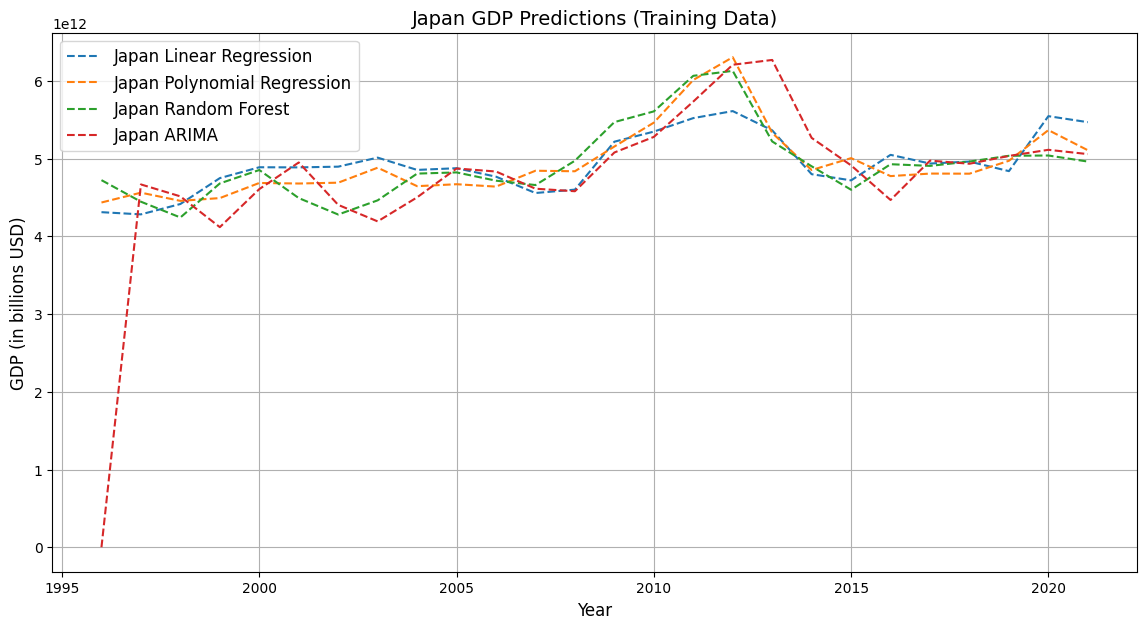

Predictions for Japan GDP:
    Year      Japan_LR    Japan_Poly      Japan_RF   Japan_ARIMA
0   1996  4.311433e+12  4.435954e+12  4.723512e+12  0.000000e+00
1   1997  4.283141e+12  4.562639e+12  4.446093e+12  4.668471e+12
2   1998  4.416547e+12  4.456838e+12  4.243335e+12  4.514762e+12
3   1999  4.749654e+12  4.492765e+12  4.681346e+12  4.118768e+12
4   2000  4.889483e+12  4.687311e+12  4.854006e+12  4.608146e+12
5   2001  4.887803e+12  4.680177e+12  4.493040e+12  4.951149e+12
6   2002  4.897067e+12  4.690922e+12  4.281072e+12  4.405449e+12
7   2003  5.013438e+12  4.883778e+12  4.463679e+12  4.192780e+12
8   2004  4.855242e+12  4.646174e+12  4.807891e+12  4.502127e+12
9   2005  4.877157e+12  4.671218e+12  4.823158e+12  4.873774e+12
10  2006  4.768197e+12  4.640357e+12  4.716881e+12  4.834659e+12
11  2007  4.558085e+12  4.844701e+12  4.660407e+12  4.613562e+12
12  2008  4.601515e+12  4.837881e+12  4.973736e+12  4.580885e+12
13  2009  5.218404e+12  5.156331e+12  5.470667e+12  5.079396e+1

In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract only the relevant columns and clean data
data = data[['country', 'date', 'trade_in_services%', 'GDP_current_US']]

# Filter for Japan
data_japan = data[data['country'] == 'Japan']

# Convert 'date' column to datetime format
data_japan['date'] = pd.to_datetime(data_japan['date'], errors='coerce')

# Replace 'no data' with NaN and drop rows with missing values
data_japan.replace('no data', np.nan, inplace=True)
data_japan.dropna(inplace=True)

# Feature engineering: Extract year for the time series
data_japan['year'] = data_japan['date'].dt.year

# Separate features (X) and target (y)
X_train_japan = data_japan[['year', 'trade_in_services%']]
y_train_japan = data_japan['GDP_current_US']

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression for Japan
lr.fit(X_train_japan, y_train_japan)
pred_lr_japan = lr.predict(X_train_japan)

# Fit Polynomial Regression for Japan
X_train_poly_japan = poly.fit_transform(X_train_japan)
lr_poly_japan = LinearRegression()
lr_poly_japan.fit(X_train_poly_japan, y_train_japan)
pred_poly_japan = lr_poly_japan.predict(X_train_poly_japan)

# Fit Random Forest Regression for Japan
rf.fit(X_train_japan, y_train_japan)
pred_rf_japan = rf.predict(X_train_japan)

# ARIMA for time series forecasting for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()

# Forecast using the ARIMA model - matching the length of the dataset
pred_arima_japan = arima_japan_fit.fittedvalues

# Combine predictions into a DataFrame for Japan
predictions_japan = pd.DataFrame({
    'Year': data_japan['year'],
    'Japan_LR': pred_lr_japan,
    'Japan_Poly': pred_poly_japan,
    'Japan_RF': pred_rf_japan,
    'Japan_ARIMA': pred_arima_japan
})

# Plot predictions for Japan
plt.figure(figsize=(14, 7))
plt.plot(predictions_japan['Year'], predictions_japan['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(predictions_japan['Year'], predictions_japan['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(predictions_japan['Year'], predictions_japan['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(predictions_japan['Year'], predictions_japan['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (Training Data)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print out the predictions for Japan GDP
print("Predictions for Japan GDP:")
print(predictions_japan)


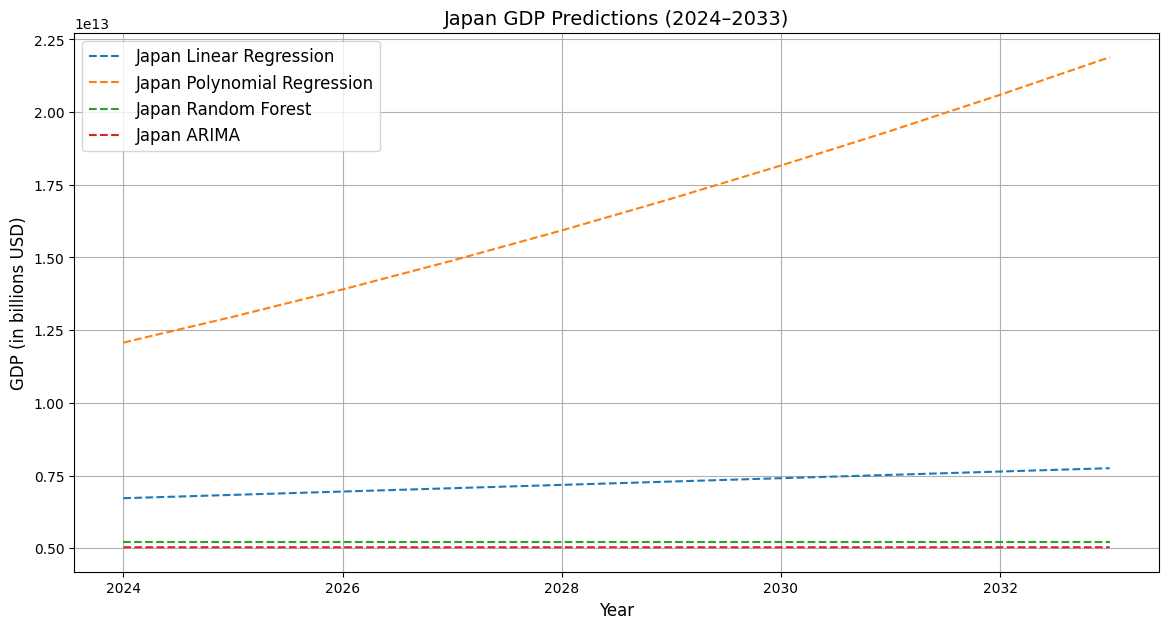

Predictions for the next 10 years have been saved to 'japan_gdp_predictions_2024_2033.csv'.


In [94]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'japan_filtered.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preprocessing: Extract only the relevant columns and clean data
data = data[['country', 'date', 'trade_in_services%', 'GDP_current_US']]

# Filter for Japan
data_japan = data[data['country'] == 'Japan']

# Convert 'date' column to datetime format
data_japan['date'] = pd.to_datetime(data_japan['date'], errors='coerce')

# Replace 'no data' with NaN and drop rows with missing values
data_japan.replace('no data', np.nan, inplace=True)
data_japan.dropna(inplace=True)

# Feature engineering: Extract year for the time series
data_japan['year'] = data_japan['date'].dt.year

# Separate features (X) and target (y)
X_train_japan = data_japan[['year', 'trade_in_services%']]
y_train_japan = data_japan['GDP_current_US']

# Initialize models
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Linear Regression for Japan
lr.fit(X_train_japan, y_train_japan)

# Fit Polynomial Regression for Japan
X_train_poly_japan = poly.fit_transform(X_train_japan)
lr_poly_japan = LinearRegression()
lr_poly_japan.fit(X_train_poly_japan, y_train_japan)

# Fit Random Forest Regression for Japan
rf.fit(X_train_japan, y_train_japan)

# ARIMA for time series forecasting for Japan
arima_japan = ARIMA(y_train_japan, order=(1, 1, 0))
arima_japan_fit = arima_japan.fit()

# Predict for the next 10 years
years_to_predict = np.arange(2024, 2034)

# Prepare the feature set for the next 10 years
future_X = pd.DataFrame({'year': years_to_predict, 'trade_in_services%': [data_japan['trade_in_services%'].mean()] * 10})

# Polynomial feature transformation for prediction
future_X_poly = poly.transform(future_X)

# Linear Regression predictions
pred_lr_japan_future = lr.predict(future_X)

# Polynomial Regression predictions
pred_poly_japan_future = lr_poly_japan.predict(future_X_poly)

# Random Forest predictions
pred_rf_japan_future = rf.predict(future_X)

# ARIMA predictions
future_arima_pred = arima_japan_fit.forecast(steps=10)

# Create DataFrame with predictions
future_predictions = pd.DataFrame({
    'Year': years_to_predict,
    'Japan_LR': pred_lr_japan_future,
    'Japan_Poly': pred_poly_japan_future,
    'Japan_RF': pred_rf_japan_future,
    'Japan_ARIMA': future_arima_pred
})

# Save predictions to CSV
future_predictions.to_csv('japan_gdp_predictions_2024_2033.csv', index=False)

# Plot predictions for Japan
plt.figure(figsize=(14, 7))
plt.plot(future_predictions['Year'], future_predictions['Japan_LR'], label='Japan Linear Regression', linestyle='--')
plt.plot(future_predictions['Year'], future_predictions['Japan_Poly'], label='Japan Polynomial Regression', linestyle='--')
plt.plot(future_predictions['Year'], future_predictions['Japan_RF'], label='Japan Random Forest', linestyle='--')
plt.plot(future_predictions['Year'], future_predictions['Japan_ARIMA'], label='Japan ARIMA', linestyle='--')
plt.title('Japan GDP Predictions (2024–2033)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Provide the download link
print("Predictions for the next 10 years have been saved to 'japan_gdp_predictions_2024_2033.csv'.")


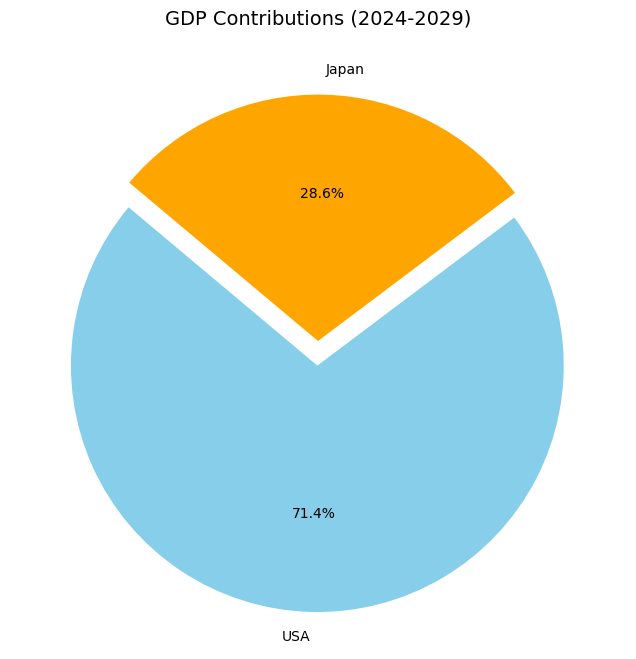

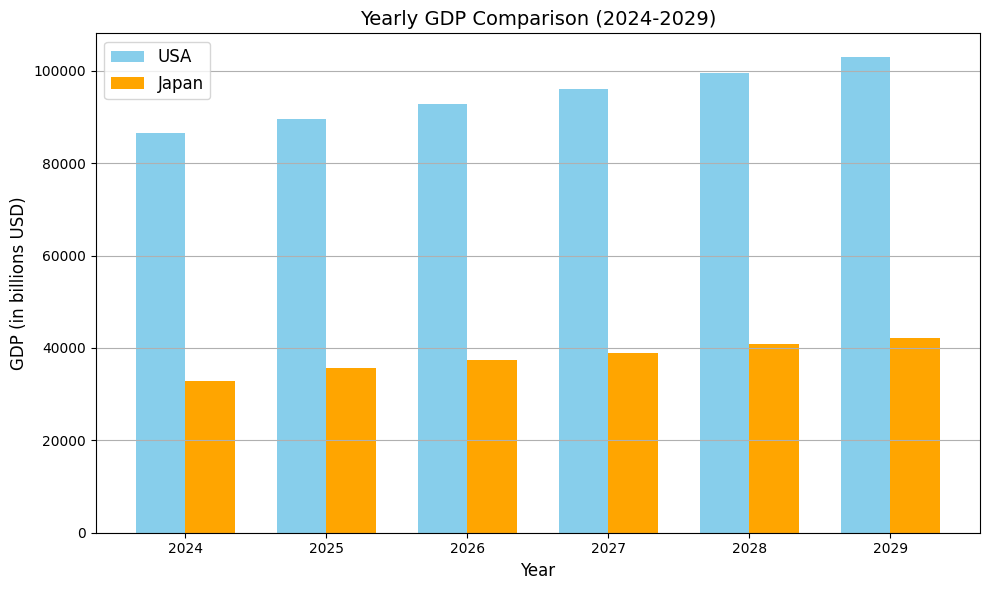

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Final.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)
data.replace('no data', None, inplace=True)
data = data[['Year', 'United States', 'Japan']].dropna()
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Year'] = data['Year'].astype(int)
data = data.dropna()

# Filter for the years 2024 to 2029
data_filtered = data[(data['Year'] >= 2024) & (data['Year'] <= 2029)]

# Pie Chart for GDP contributions in the period 2024-2029
total_gdp_usa = data_filtered['United States'].sum()
total_gdp_japan = data_filtered['Japan'].sum()
gdp_values = [total_gdp_usa, total_gdp_japan]
labels = ['USA', 'Japan']
colors = ['skyblue', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(gdp_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title('GDP Contributions (2024-2029)', fontsize=14)
plt.show()

# Bar Chart for yearly GDP (2024-2029)
plt.figure(figsize=(10, 6))
bar_width = 0.35
years = data_filtered['Year']
index = range(len(years))

plt.bar(index, data_filtered['United States'], bar_width, label='USA', color='skyblue')
plt.bar([i + bar_width for i in index], data_filtered['Japan'], bar_width, label='Japan', color='orange')

plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions USD)', fontsize=12)
plt.title('Yearly GDP Comparison (2024-2029)', fontsize=14)
plt.xticks([i + bar_width/2 for i in index], years)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


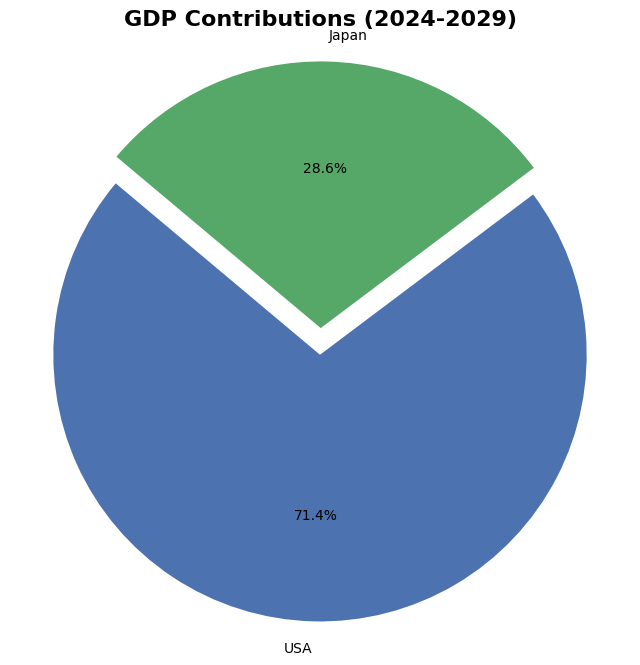

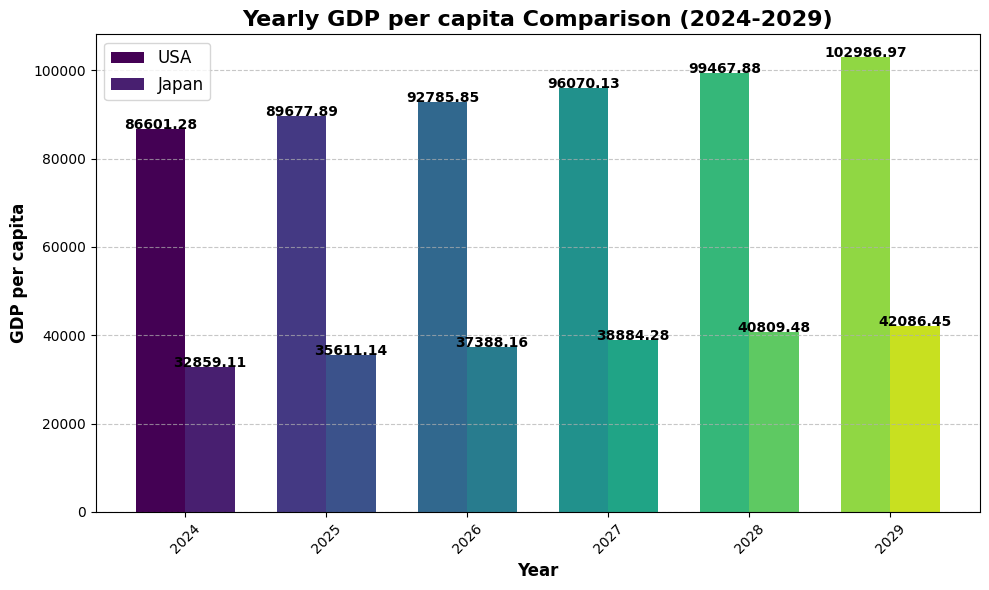

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Final.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)
data.replace('no data', None, inplace=True)
data = data[['Year', 'United States', 'Japan']].dropna()
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Year'] = data['Year'].astype(int)
data = data.dropna()

# Filter for the years 2024 to 2029
data_filtered = data[(data['Year'] >= 2024) & (data['Year'] <= 2029)]

# Pie Chart for GDP contributions in the period 2024-2029
total_gdp_usa = data_filtered['United States'].sum()
total_gdp_japan = data_filtered['Japan'].sum()
gdp_values = [total_gdp_usa, total_gdp_japan]
labels = ['USA', 'Japan']
colors = ['#4C72B0', '#55A868']  # Custom colors for the pie chart

plt.figure(figsize=(8, 8))
plt.pie(gdp_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title('GDP Contributions (2024-2029)', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bar Chart for yearly GDP (2024-2029)
plt.figure(figsize=(10, 6))
bar_width = 0.35
years = data_filtered['Year']
index = range(len(years))

# Use gradient colors for bars
cmap = plt.get_cmap('viridis')
usa_colors = [cmap(i / len(years)) for i in range(len(years))]
japan_colors = [cmap((i + 0.5) / len(years)) for i in range(len(years))]

# Plot bars for the USA and Japan with customized colors
bars_usa = plt.bar(index, data_filtered['United States'], bar_width, label='USA', color=usa_colors)
bars_japan = plt.bar([i + bar_width for i in index], data_filtered['Japan'], bar_width, label='Japan', color=japan_colors)

# Customize the chart
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('GDP per capita', fontsize=12, fontweight='bold')
plt.title('Yearly GDP per capita Comparison (2024-2029)', fontsize=16, fontweight='bold')
plt.xticks([i + bar_width/2 for i in index], years, rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for each bar
for bar in bars_usa:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', fontsize=10, fontweight='bold', color='black')

for bar in bars_japan:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


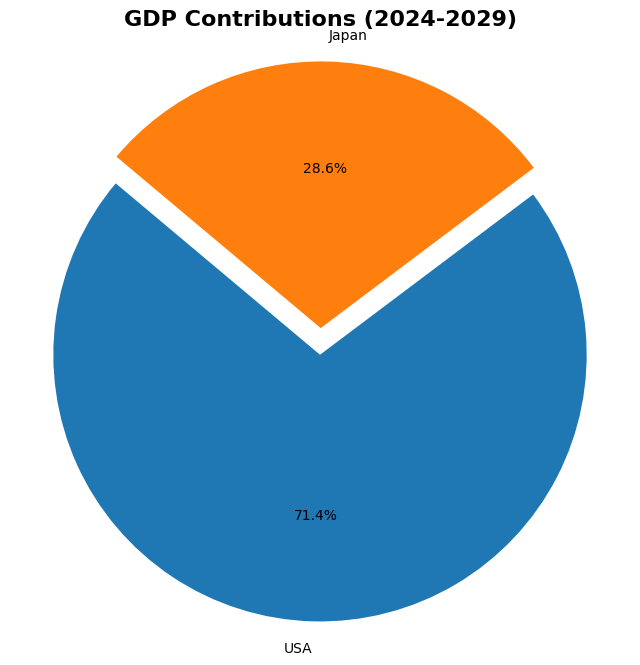

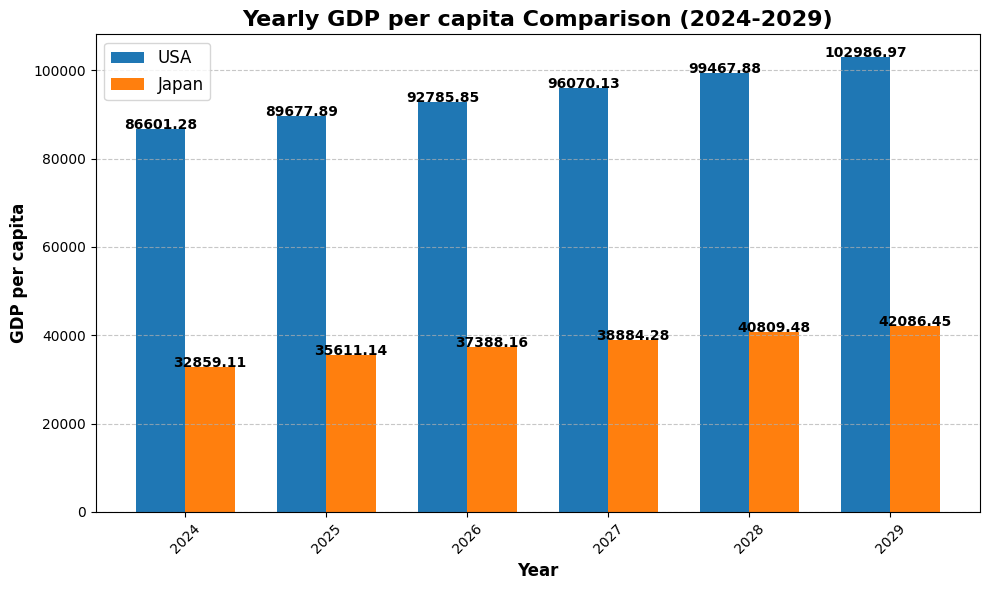

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'Final.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)
data.replace('no data', None, inplace=True)
data = data[['Year', 'United States', 'Japan']].dropna()
data['United States'] = pd.to_numeric(data['United States'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Year'] = data['Year'].astype(int)
data = data.dropna()

# Filter for the years 2024 to 2029
data_filtered = data[(data['Year'] >= 2024) & (data['Year'] <= 2029)]

# Pie Chart for GDP contributions in the period 2024-2029
total_gdp_usa = data_filtered['United States'].sum()
total_gdp_japan = data_filtered['Japan'].sum()
gdp_values = [total_gdp_usa, total_gdp_japan]
labels = ['USA', 'Japan']
colors = ['#1f77b4', '#ff7f0e']  # Blue for USA, Orange for Japan

plt.figure(figsize=(8, 8))
plt.pie(gdp_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title('GDP Contributions (2024-2029)', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bar Chart for yearly GDP (2024-2029)
plt.figure(figsize=(10, 6))
bar_width = 0.35
years = data_filtered['Year']
index = range(len(years))

# Plot bars for the USA and Japan with solid colors
plt.bar(index, data_filtered['United States'], bar_width, label='USA', color='#1f77b4')  # Blue
plt.bar([i + bar_width for i in index], data_filtered['Japan'], bar_width, label='Japan', color='#ff7f0e')  # Orange

# Customize the chart
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('GDP per capita', fontsize=12, fontweight='bold')
plt.title('Yearly GDP per capita Comparison (2024-2029)', fontsize=16, fontweight='bold')
plt.xticks([i + bar_width/2 for i in index], years, rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for each bar
for bar in plt.gca().patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


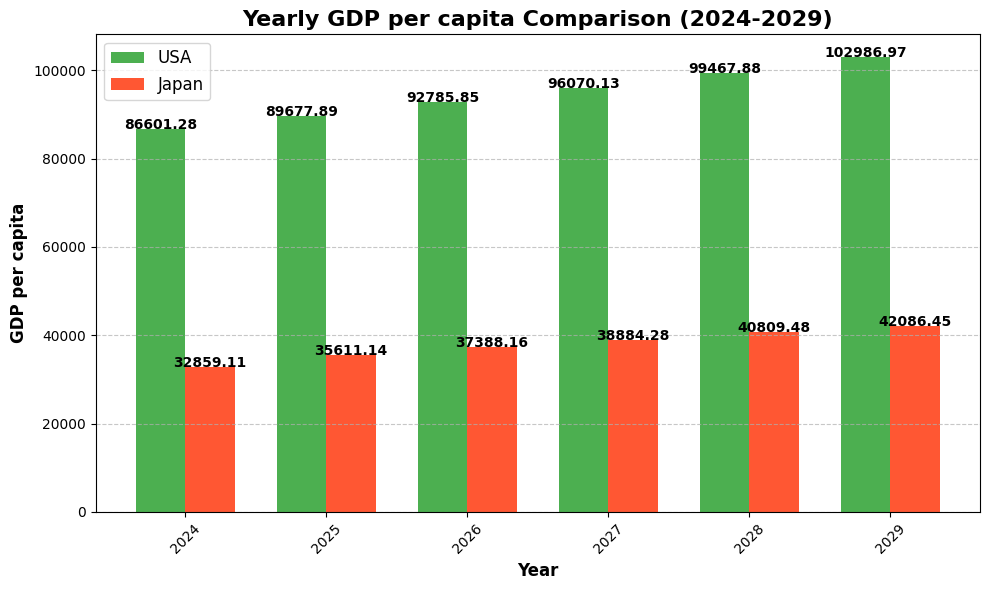

In [115]:
# Bar Chart for yearly GDP (2024-2029)
plt.figure(figsize=(10, 6))
bar_width = 0.35
years = data_filtered['Year']
index = range(len(years))

# Plot bars for the USA and Japan with new colors
plt.bar(index, data_filtered['United States'], bar_width, label='USA', color='#4CAF50')  # Green for USA
plt.bar([i + bar_width for i in index], data_filtered['Japan'], bar_width, label='Japan', color='#FF5733')  # Red-Orange for Japan

# Customize the chart
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('GDP per capita', fontsize=12, fontweight='bold')
plt.title('Yearly GDP per capita Comparison (2024-2029)', fontsize=16, fontweight='bold')
plt.xticks([i + bar_width/2 for i in index], years, rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for each bar
for bar in plt.gca().patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


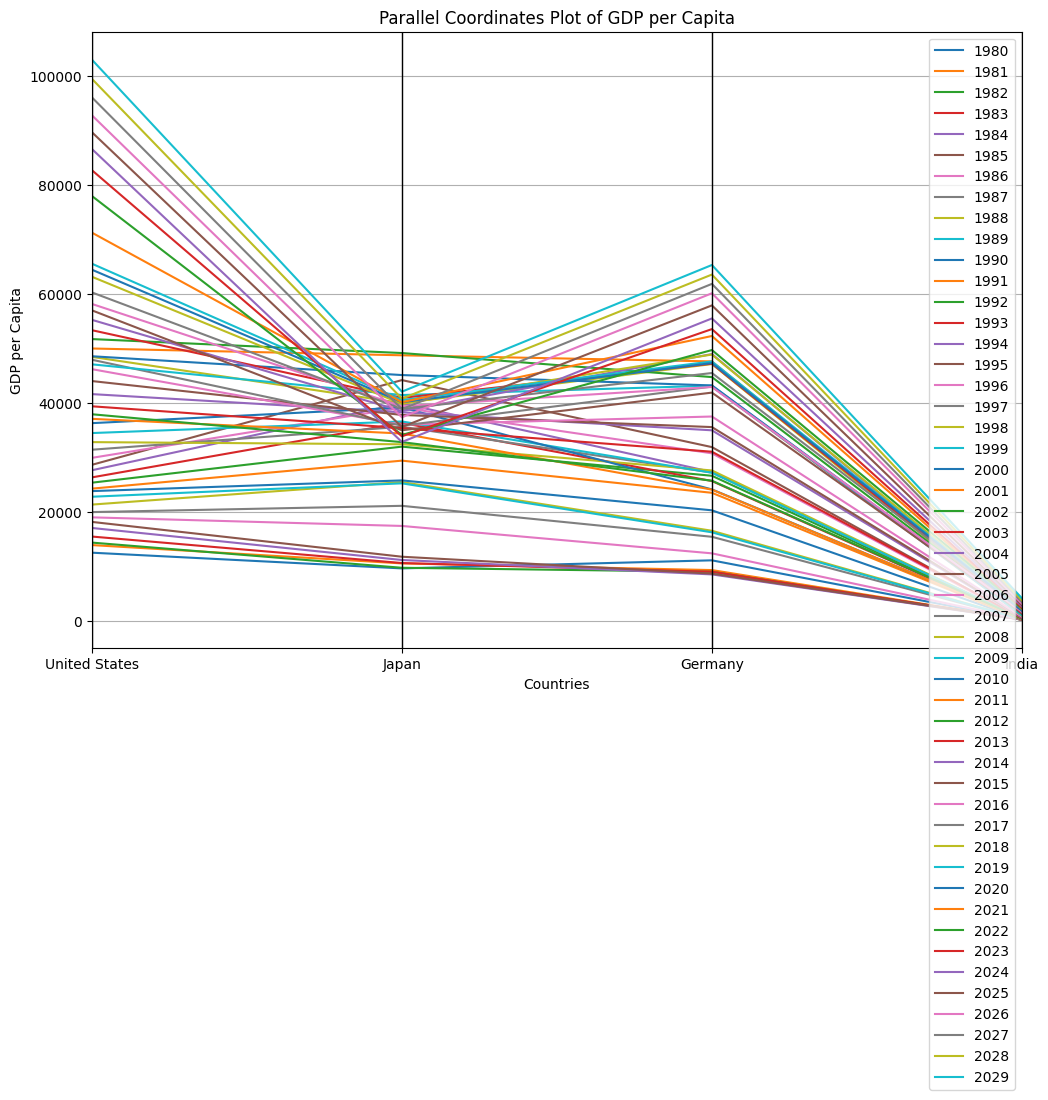

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
data = pd.read_csv("Final.csv")

# Clean the dataset (example for GDP per capita of selected countries)
data.replace("no data", pd.NA, inplace=True)
data = data.dropna(axis=1, thresh=0.6 * len(data))
data = data.dropna(axis=0, thresh=0.6 * data.shape[1])

# Convert numeric columns
for column in data.columns[1:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Subset of countries (example: USA, Japan, Germany, India)
countries = ['Year', 'United States', 'Japan', 'Germany', 'India']
data_subset = data[countries].dropna()

# Parallel Coordinates Plot
plt.figure(figsize=(12, 8))
parallel_coordinates(data_subset, class_column='Year', cols=['United States', 'Japan', 'Germany', 'India'], color=plt.cm.tab10.colors)
plt.title("Parallel Coordinates Plot of GDP per Capita")
plt.ylabel("GDP per Capita")
plt.xlabel("Countries")
plt.grid(True)
plt.show()


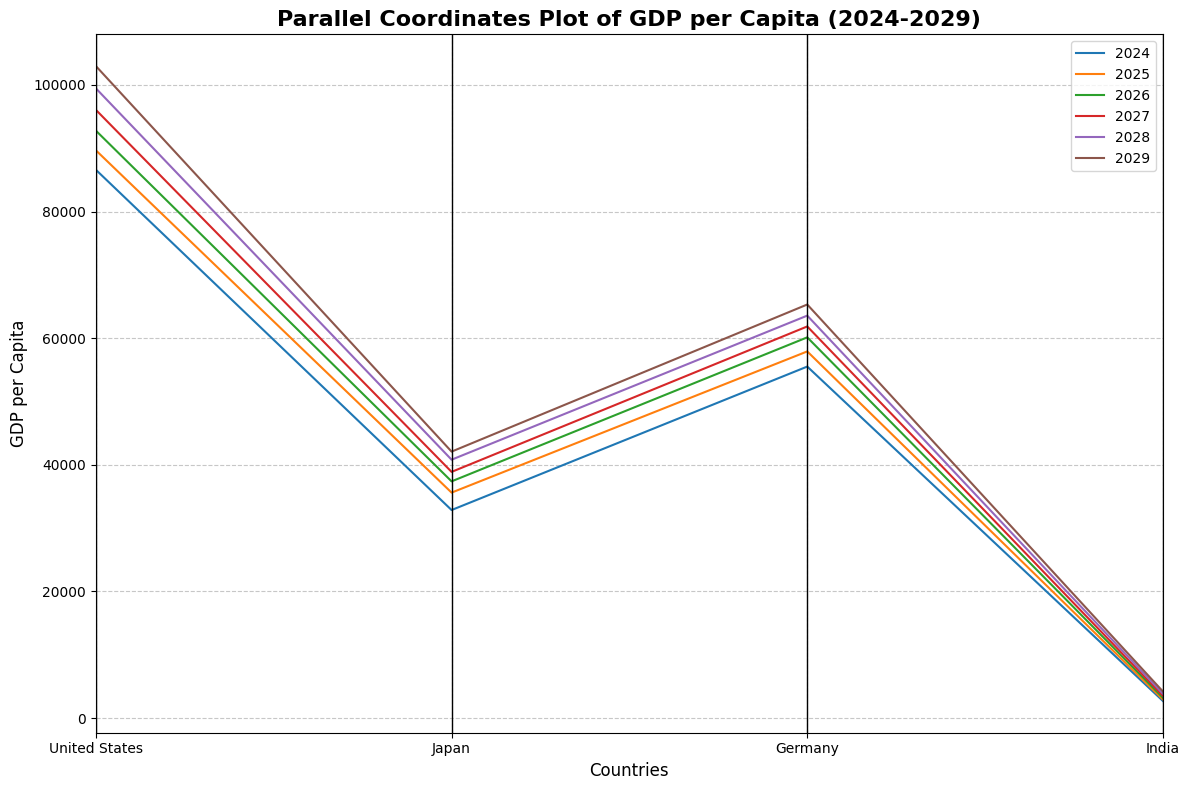

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
data = pd.read_csv("Final.csv")

# Clean the dataset (example for GDP per capita of selected countries)
data.replace("no data", pd.NA, inplace=True)
data = data.dropna(axis=1, thresh=0.6 * len(data))
data = data.dropna(axis=0, thresh=0.6 * data.shape[1])

# Convert numeric columns
for column in data.columns[1:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Subset of countries (example: USA, Japan, Germany, India)
countries = ['Year', 'United States', 'Japan', 'Germany', 'India']
data_subset = data[countries].dropna()

# Filter for the years 2024 to 2029
data_subset = data_subset[(data_subset['Year'] >= 2024) & (data_subset['Year'] <= 2029)]

# Parallel Coordinates Plot
plt.figure(figsize=(12, 8))
parallel_coordinates(data_subset, class_column='Year', cols=['United States', 'Japan', 'Germany', 'India'], color=plt.cm.tab10.colors)
plt.title("Parallel Coordinates Plot of GDP per Capita (2024-2029)", fontsize=16, fontweight='bold')
plt.ylabel("GDP per Capita", fontsize=12)
plt.xlabel("Countries", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


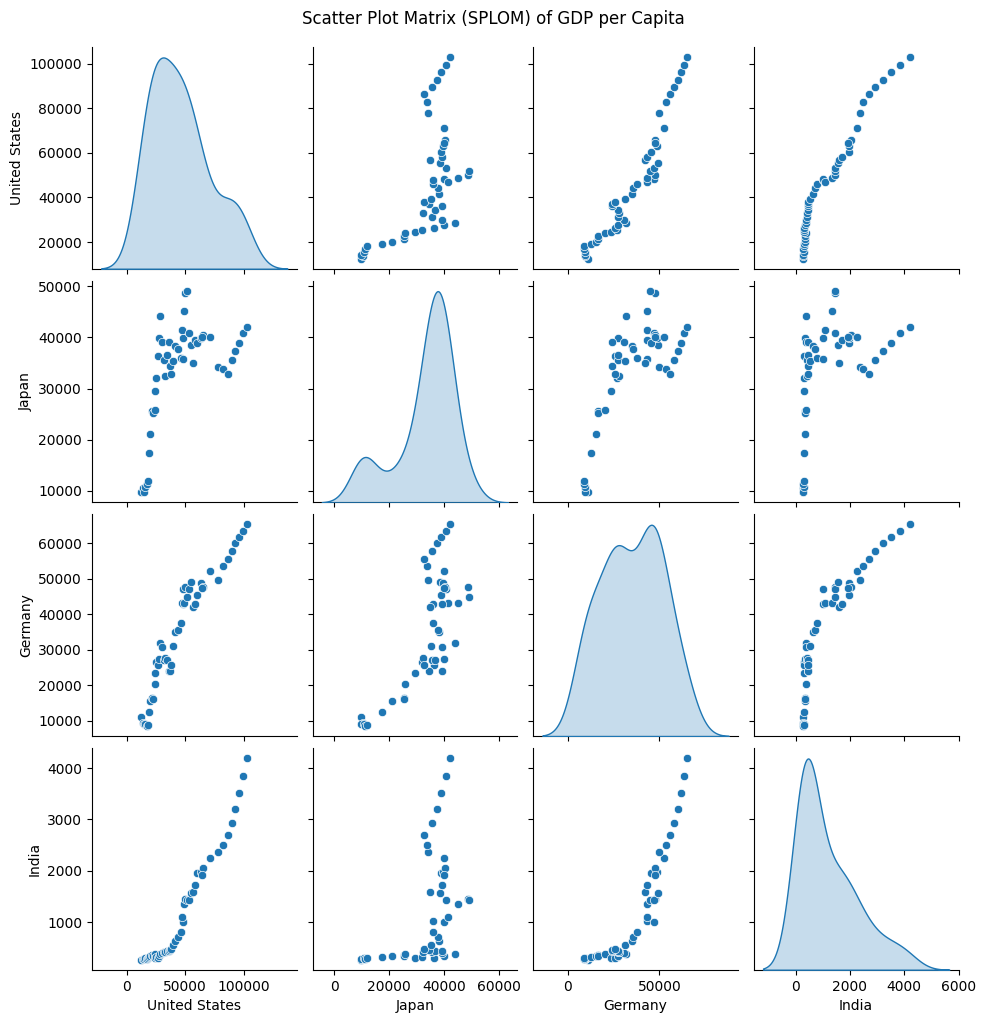

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Final.csv")

# Clean the dataset (remove "no data" and handle missing values)
data.replace("no data", pd.NA, inplace=True)
data = data.dropna(axis=1, thresh=0.6 * len(data))  # Drop columns with too many missing values
data = data.dropna(axis=0, thresh=0.6 * data.shape[1])  # Drop rows with too many missing values

# Convert numeric columns
for column in data.columns[1:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Subset of countries (example: USA, Japan, Germany, India)
countries = ['United States', 'Japan', 'Germany', 'India']
data_subset = data[countries].dropna()

# Scatter Plot Matrix (SPLOM)
sns.pairplot(data_subset, diag_kind='kde', height=2.5)
plt.suptitle("Scatter Plot Matrix (SPLOM) of GDP per Capita", y=1.02)
plt.show()


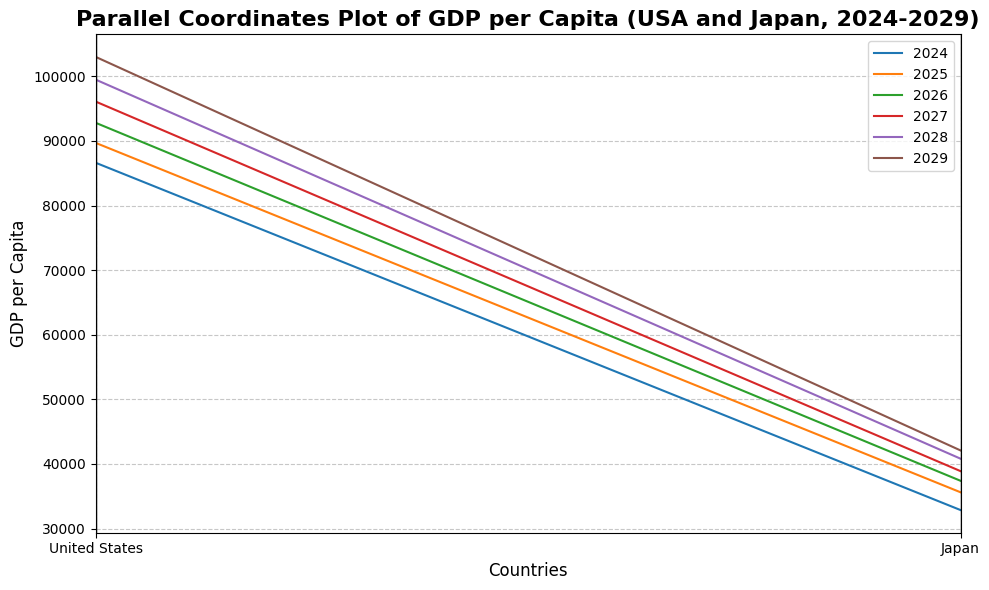

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
data = pd.read_csv("Final.csv")

# Clean the dataset (handle missing values)
data.replace("no data", pd.NA, inplace=True)
data = data.dropna(axis=1, thresh=0.6 * len(data))  # Drop columns with too many missing values
data = data.dropna(axis=0, thresh=0.6 * data.shape[1])  # Drop rows with too many missing values

# Convert numeric columns
for column in data.columns[1:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Subset of countries (USA and Japan only)
countries = ['Year', 'United States', 'Japan']
data_subset = data[countries].dropna()

# Filter for the years 2024 to 2029
data_subset = data_subset[(data_subset['Year'] >= 2024) & (data_subset['Year'] <= 2029)]

# Parallel Coordinates Plot for Japan and USA
plt.figure(figsize=(10, 6))
parallel_coordinates(data_subset, class_column='Year', cols=['United States', 'Japan'], color=plt.cm.tab10.colors)
plt.title("Parallel Coordinates Plot of GDP per Capita (USA and Japan, 2024-2029)", fontsize=16, fontweight='bold')
plt.ylabel("GDP per Capita", fontsize=12)
plt.xlabel("Countries", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_78748/4230694609.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


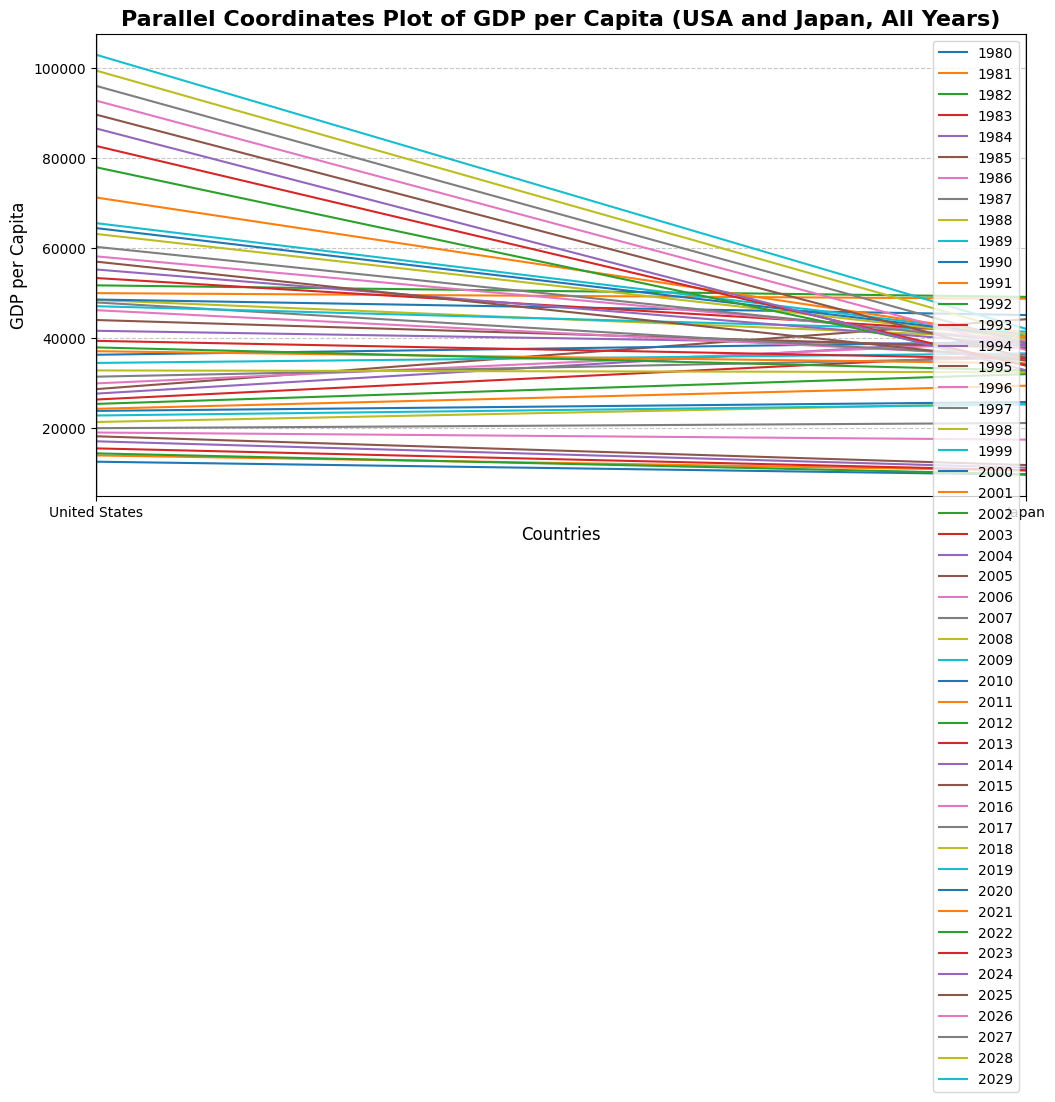

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
data = pd.read_csv("Final.csv")

# Clean the dataset (handle missing values)
data.replace("no data", pd.NA, inplace=True)
data = data.dropna(axis=1, thresh=0.6 * len(data))  # Drop columns with too many missing values
data = data.dropna(axis=0, thresh=0.6 * data.shape[1])  # Drop rows with too many missing values

# Convert numeric columns
for column in data.columns[1:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Subset of countries (USA and Japan only)
countries = ['Year', 'United States', 'Japan']
data_subset = data[countries].dropna()

# Parallel Coordinates Plot for all available years
plt.figure(figsize=(12, 6))
parallel_coordinates(data_subset, class_column='Year', cols=['United States', 'Japan'], color=plt.cm.tab10.colors)
plt.title("Parallel Coordinates Plot of GDP per Capita (USA and Japan, All Years)", fontsize=16, fontweight='bold')
plt.ylabel("GDP per Capita", fontsize=12)
plt.xlabel("Countries", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


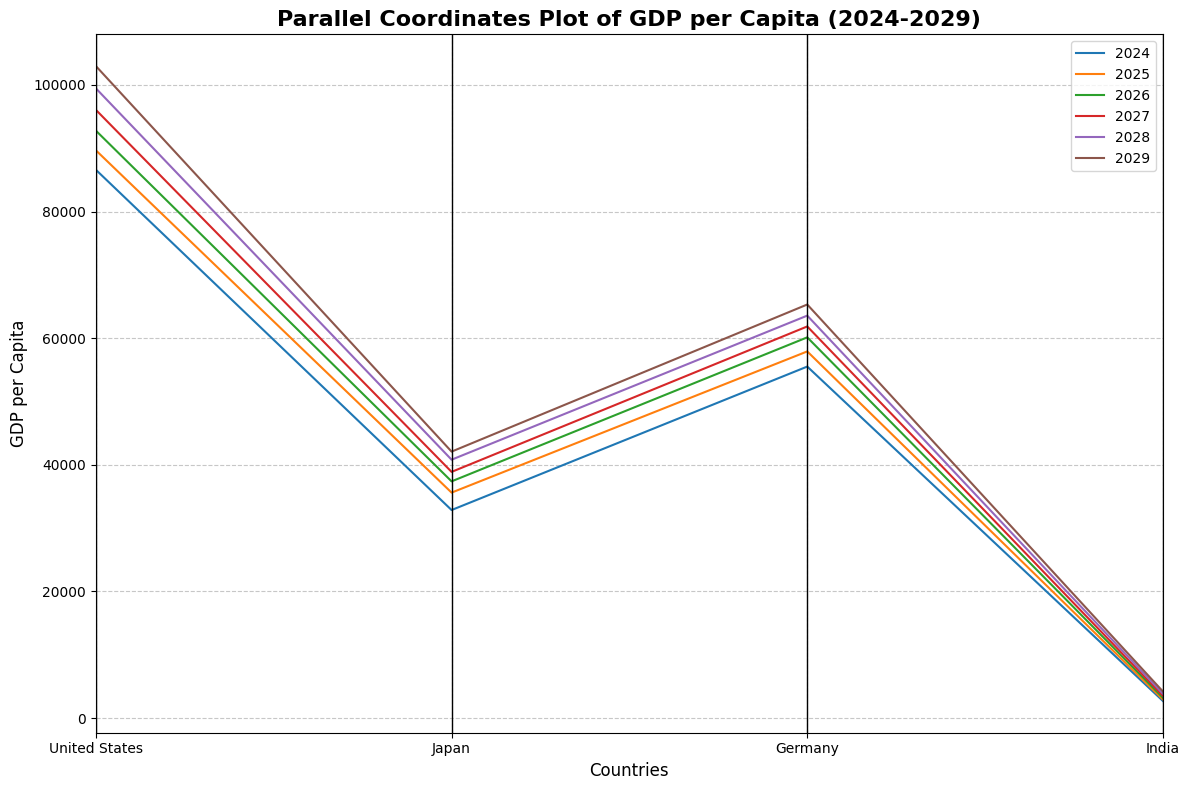

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
data = pd.read_csv("Final.csv")

# Clean the dataset (example for GDP per capita of selected countries)
data.replace("no data", pd.NA, inplace=True)
data = data.dropna(axis=1, thresh=0.6 * len(data))
data = data.dropna(axis=0, thresh=0.6 * data.shape[1])

# Convert numeric columns
for column in data.columns[1:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Subset of countries (example: USA, Japan, Germany, India)
countries = ['Year', 'United States', 'Japan', 'Germany', 'India']
data_subset = data[countries].dropna()

# Filter for the years 2024 to 2029
data_subset = data_subset[(data_subset['Year'] >= 2024) & (data_subset['Year'] <= 2029)]

# Parallel Coordinates Plot
plt.figure(figsize=(12, 8))
parallel_coordinates(data_subset, class_column='Year', cols=['United States', 'Japan', 'Germany', 'India'], color=plt.cm.tab10.colors)
plt.title("Parallel Coordinates Plot of GDP per Capita (2024-2029)", fontsize=16, fontweight='bold')
plt.ylabel("GDP per Capita", fontsize=12)
plt.xlabel("Countries", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


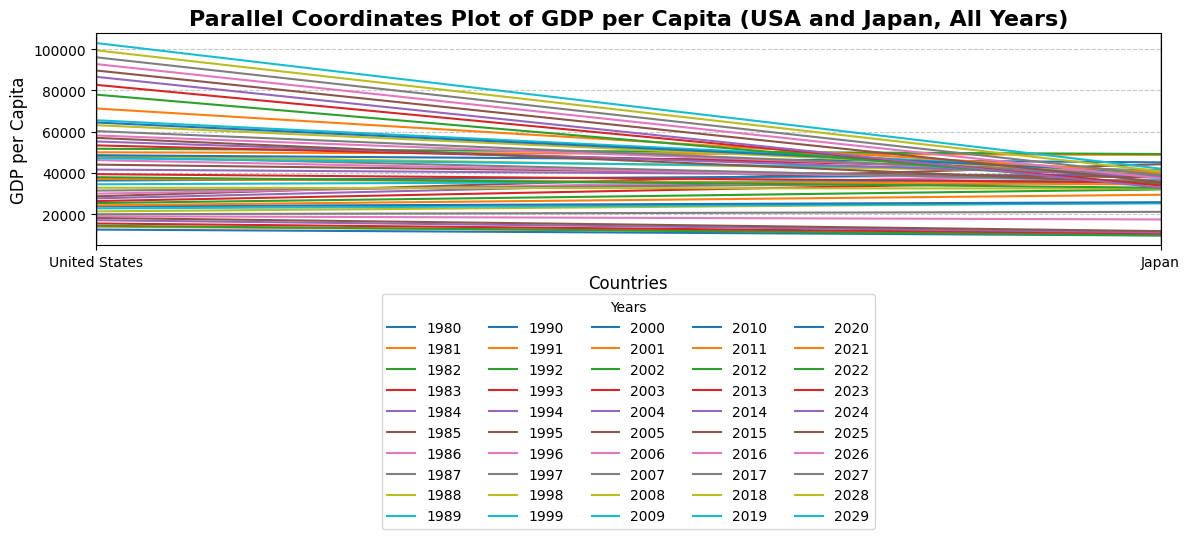

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
data = pd.read_csv("Final.csv")

# Clean the dataset (handle missing values)
data.replace("no data", pd.NA, inplace=True)
data = data.dropna(axis=1, thresh=0.6 * len(data))  # Drop columns with too many missing values
data = data.dropna(axis=0, thresh=0.6 * data.shape[1])  # Drop rows with too many missing values

# Convert numeric columns
for column in data.columns[1:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Subset of countries (USA and Japan only)
countries = ['Year', 'United States', 'Japan', ]
data_subset = data[countries].dropna()

# Parallel Coordinates Plot for all available years
plt.figure(figsize=(12, 6))
parallel_coordinates(data_subset, class_column='Year', cols=['United States', 'Japan'], color=plt.cm.tab10.colors)

plt.title("Parallel Coordinates Plot of GDP per Capita (USA and Japan, All Years)", fontsize=16, fontweight='bold')
plt.ylabel("GDP per Capita", fontsize=12)
plt.xlabel("Countries", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend below the plot
plt.legend(
    title="Years",
    bbox_to_anchor=(0.5, -0.2),  # Center the legend below the plot
    loc='upper center',
    ncol=5,  # Number of columns in the legend
    fontsize=10
)

plt.tight_layout()
plt.show()


/Users/ayusharyakashyap/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/ayusharyakashyap/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/ayusharyakashyap/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/ayusharyakashyap/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


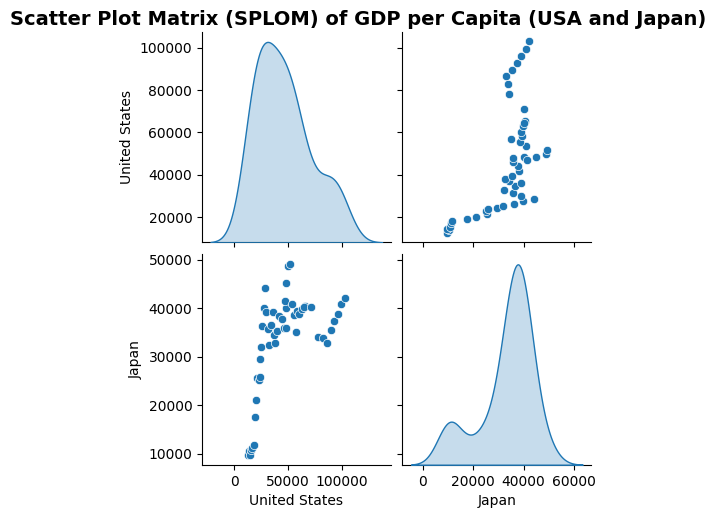

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Final.csv")

# Clean the dataset (remove "no data" and handle missing values)
data.replace("no data", pd.NA, inplace=True)
data = data.dropna(axis=1, thresh=0.6 * len(data))  # Drop columns with too many missing values
data = data.dropna(axis=0, thresh=0.6 * data.shape[1])  # Drop rows with too many missing values

# Convert numeric columns
for column in data.columns[1:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Subset of countries (USA and Japan)
countries = ['United States', 'Japan']
data_subset = data[countries].dropna()


# Scatter Plot Matrix (SPLOM) for USA and Japan
sns.pairplot(data_subset, diag_kind='kde', height=2.5, palette='coolwarm')
plt.suptitle("Scatter Plot Matrix (SPLOM) of GDP per Capita (USA and Japan)", y=1.02, fontsize=14, fontweight='bold')
plt.show()


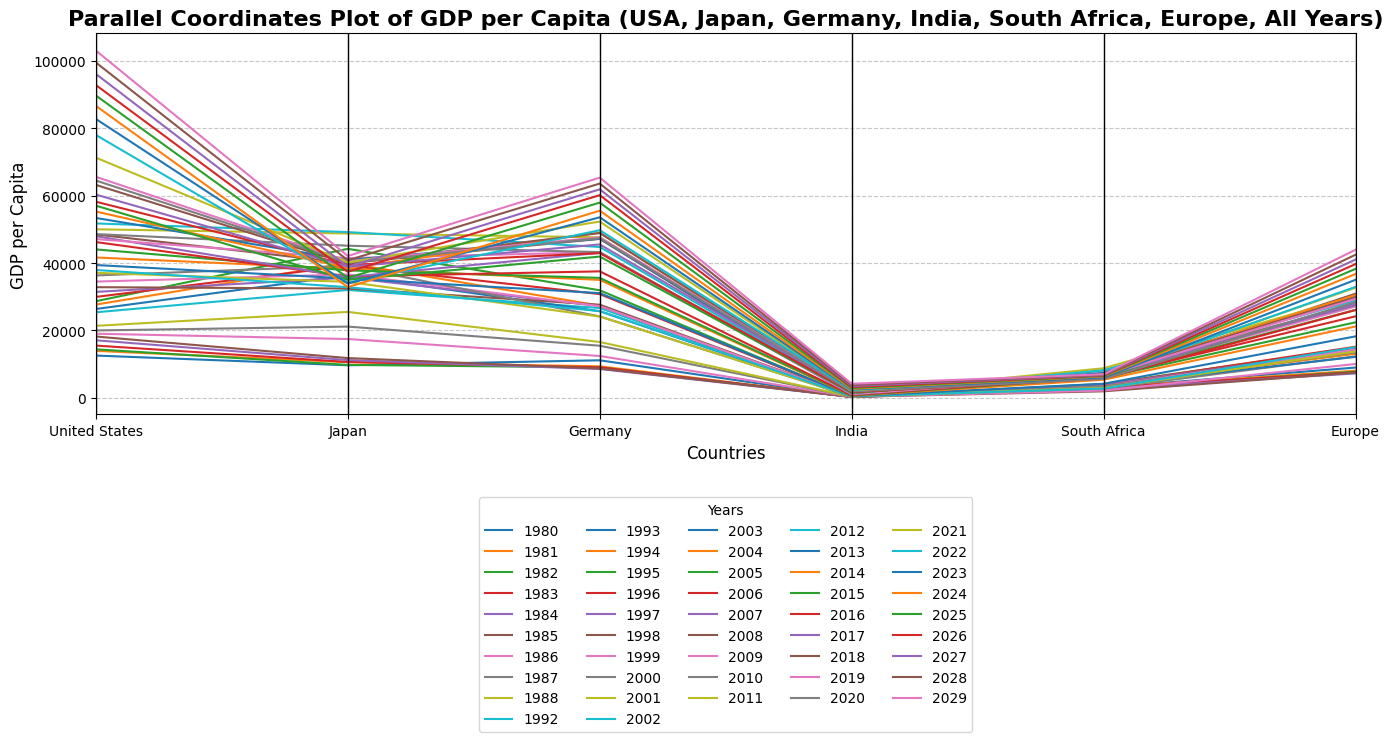

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
data = pd.read_csv("Final.csv")

# Clean the dataset (handle missing values)
data.replace("no data", pd.NA, inplace=True)
data = data.dropna(axis=1, thresh=0.6 * len(data))  # Drop columns with too many missing values
data = data.dropna(axis=0, thresh=0.6 * data.shape[1])  # Drop rows with too many missing values

# Convert numeric columns
for column in data.columns[1:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Subset of countries (USA, Japan, Germany, India, South Africa, Europe)
countries = ['Year', 'United States', 'Japan', 'Germany', 'India', 'South Africa', 'Europe']
data_subset = data[countries].dropna()

# Parallel Coordinates Plot for all available years
plt.figure(figsize=(14, 8))
parallel_coordinates(data_subset, class_column='Year', cols=['United States', 'Japan', 'Germany', 'India', 'South Africa', 'Europe'], color=plt.cm.tab10.colors)

plt.title("Parallel Coordinates Plot of GDP per Capita (USA, Japan, Germany, India, South Africa, Europe, All Years)", fontsize=16, fontweight='bold')
plt.ylabel("GDP per Capita", fontsize=12)
plt.xlabel("Countries", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend below the plot
plt.legend(
    title="Years",
    bbox_to_anchor=(0.5, -0.2),  # Center the legend below the plot
    loc='upper center',
    ncol=5,  # Number of columns in the legend
    fontsize=10
)

plt.tight_layout()
plt.show()
